<a href="https://colab.research.google.com/github/Liza-IITP/Linear-Logistic/blob/main/LINEAR_LOGISTIC_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction before training: [0. 0. 0. 0. 0.]
Epoch 0: w=0.4399999976158142, loss=44.0


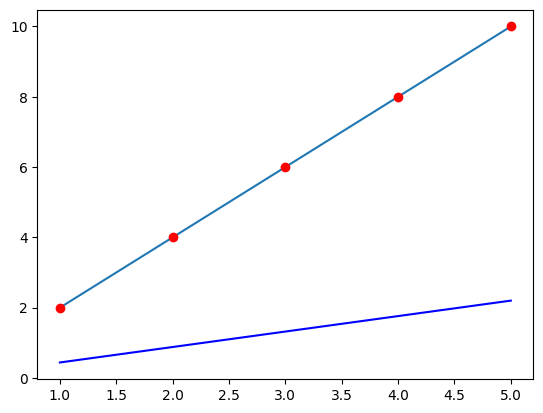

Epoch 1: w=0.7832000255584717, loss=26.76959800720215


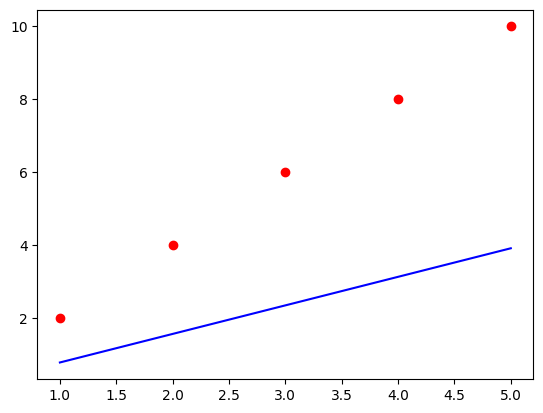

Epoch 2: w=1.0508959293365479, loss=16.286624908447266


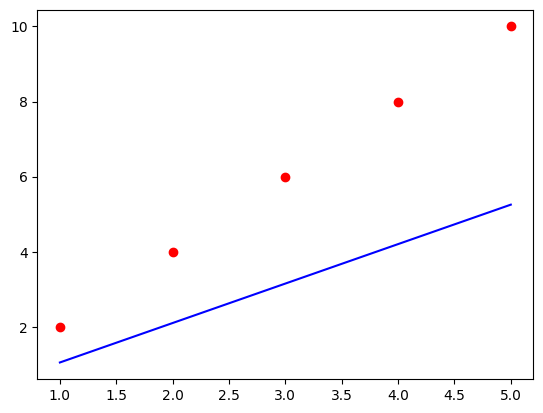

Epoch 3: w=1.2596988677978516, loss=9.908784866333008


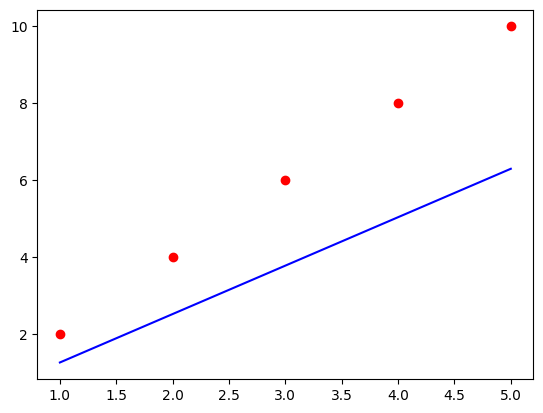

Epoch 4: w=1.4225651025772095, loss=6.02850341796875


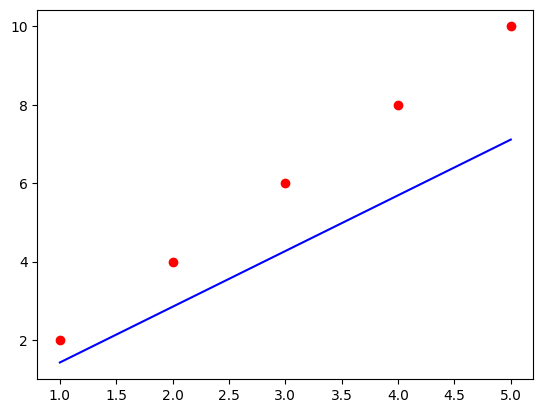

Epoch 5: w=1.5496008396148682, loss=3.6677417755126953


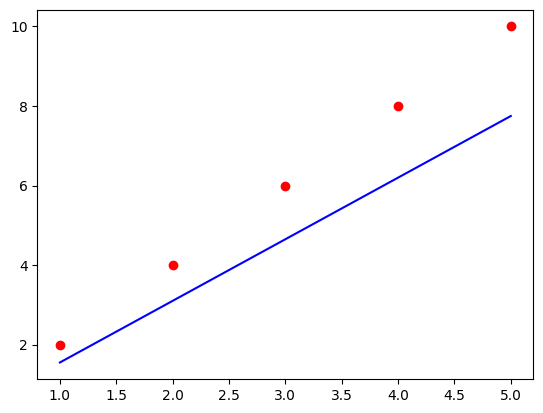

Epoch 6: w=1.6486886739730835, loss=2.2314534187316895


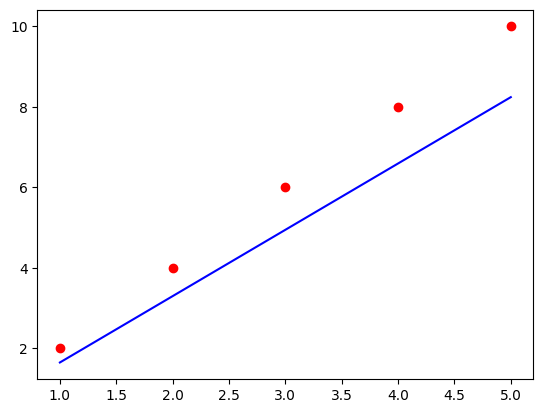

Epoch 7: w=1.7259771823883057, loss=1.3576161861419678


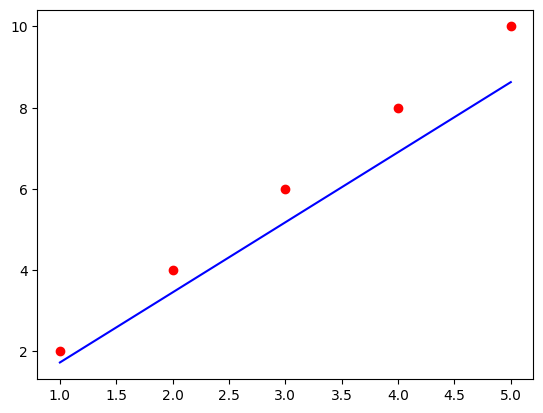

Epoch 8: w=1.7862621545791626, loss=0.8259735107421875


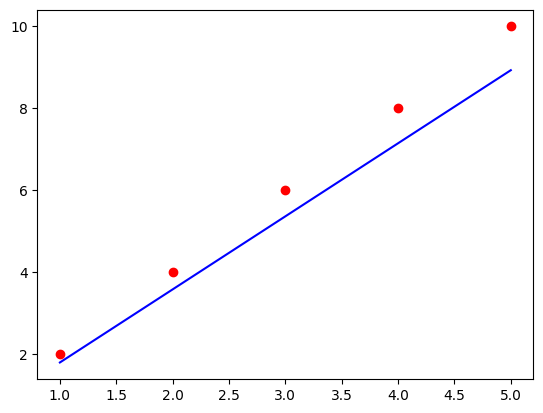

Epoch 9: w=1.8332844972610474, loss=0.5025225877761841


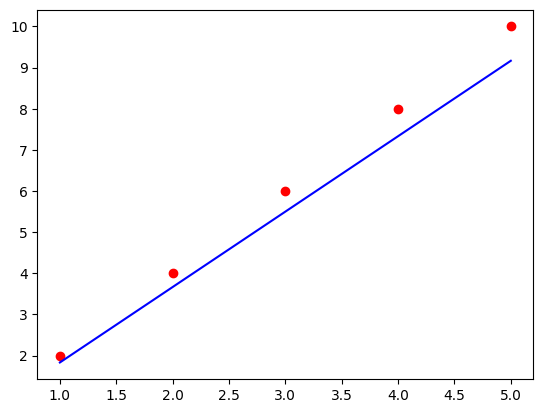

Epoch 10: w=1.8699618577957153, loss=0.3057344853878021


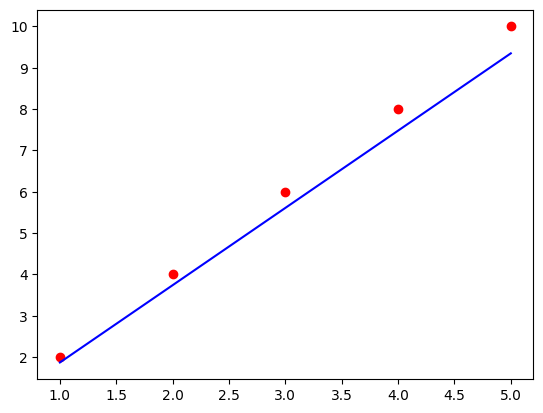

Epoch 11: w=1.8985702991485596, loss=0.1860089898109436


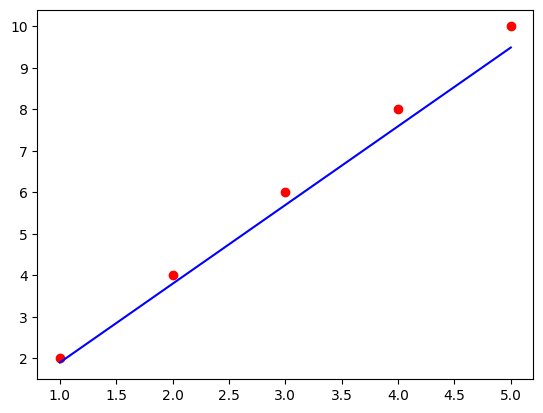

Epoch 12: w=1.9208848476409912, loss=0.11316784471273422


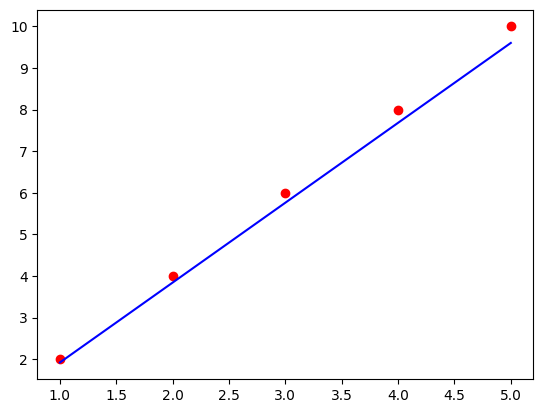

Epoch 13: w=1.9382901191711426, loss=0.06885126978158951


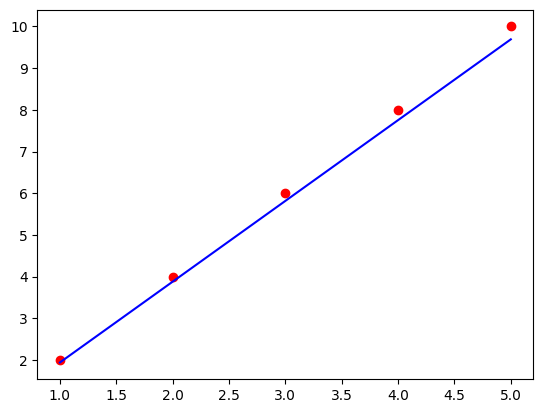

Epoch 14: w=1.9518662691116333, loss=0.041889261454343796


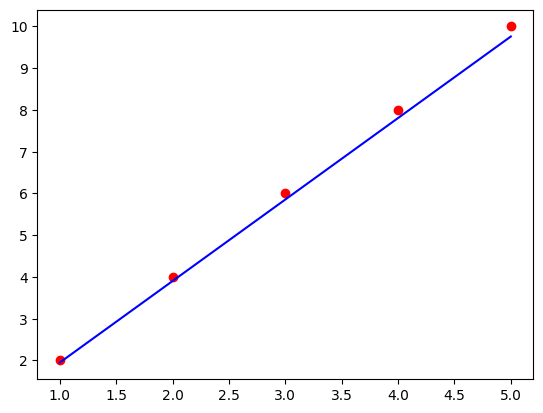

Epoch 15: w=1.9624556303024292, loss=0.02548537589609623


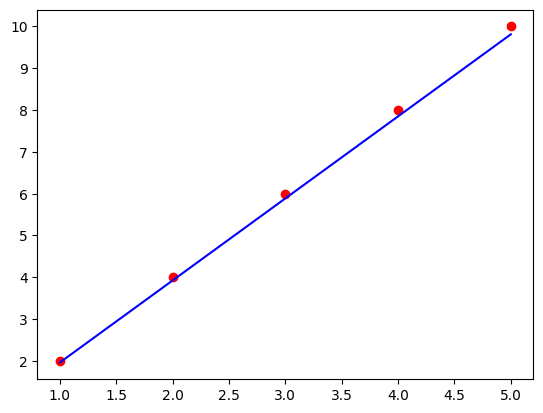

Epoch 16: w=1.9707154035568237, loss=0.015505408868193626


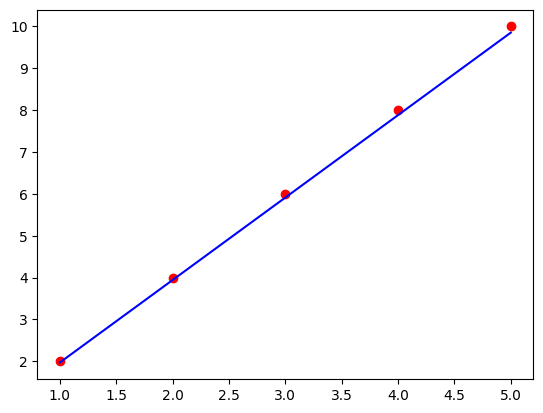

Epoch 17: w=1.9771580696105957, loss=0.009433488361537457


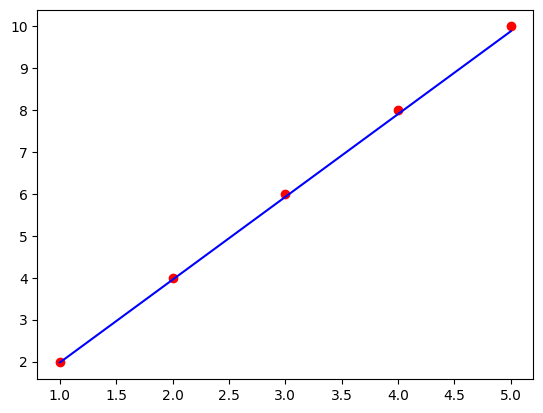

Epoch 18: w=1.9821833372116089, loss=0.005739313550293446


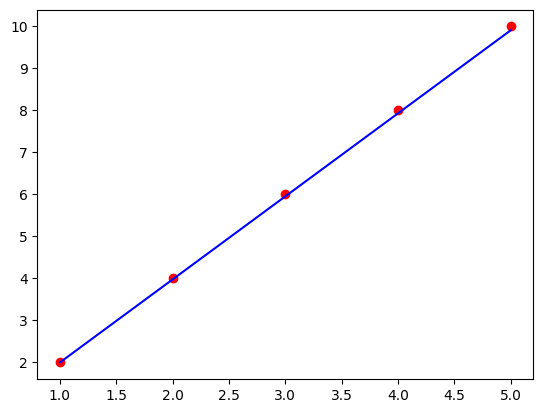

Epoch 19: w=1.9861030578613281, loss=0.0034917835146188736


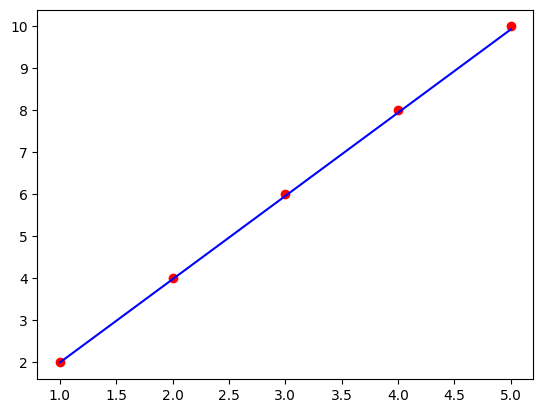

Prediction after training f(5) = [1.986103 3.972206 5.958309 7.944412 9.930515]


In [1]:

# Linear Regression - JUST NUMPY
# FLOW : FD(MANUAL DEFINED W*X)-> LOSS(MANUAL DEFINED MSE) -> GRADIENT TO GET WEIGHTS AFTER UPDATION(MANUAL WEIGHT EXPRESSION AFTER DIFFERENTIATION)  -> LOOP TO UPDATE WEIGHTS(BASED ON LR AND GRADIENT )

''' PREDICTION - GRADIENT COMPUTATION - LOSS - PARAMETERS UPDATE - ALL MANUAL'''
import matplotlib.pyplot as plt
import numpy as np
X = np.array([1,2,3,4,5],dtype = np.float32)
Y = np.array([2,4,6,8,10],dtype = np.float32)

w = 0.0

def fd(x)  :
    return w*x

def loss(y,y_hat) :
    return ((y-y_hat)**2).mean()

def gradient(x,y,y_hat) :
    return -2 * np.dot(x, (y - y_hat)) / len(y)

print(f'Prediction before training: {fd(X)}')
plt.plot(X,Y)
# TRAIN
lr = 0.01
iterations = 20

for epoch in range(iterations) :
    y_pred = fd(X)
    l = loss(Y,y_pred)
    dw = gradient(X,Y,y_pred)
    w-= lr*dw
    if epoch%1 == 0 :
        print(f'Epoch {epoch}: w={w}, loss={l}')
        plt.plot(X, Y, 'ro')
        plt.plot(X, fd(X), 'b-')
        plt.pause(0.1)
        plt.show()

print(f'Prediction after training f(5) = {fd(X)}')

Prediction before training: tensor([0., 0., 0., 0., 0.], grad_fn=<MulBackward0>)


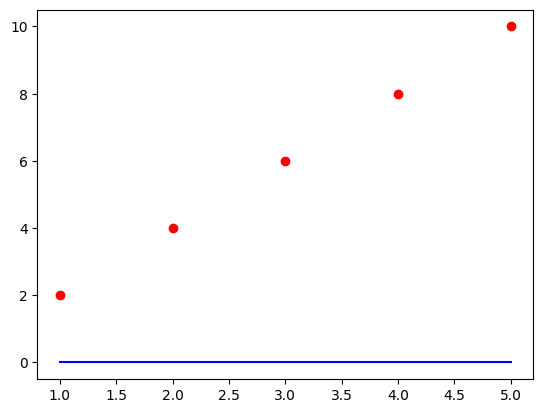

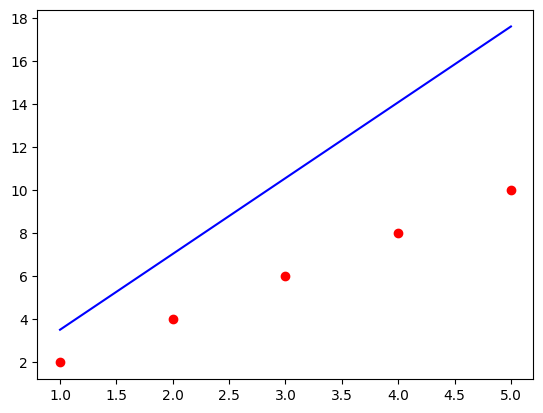

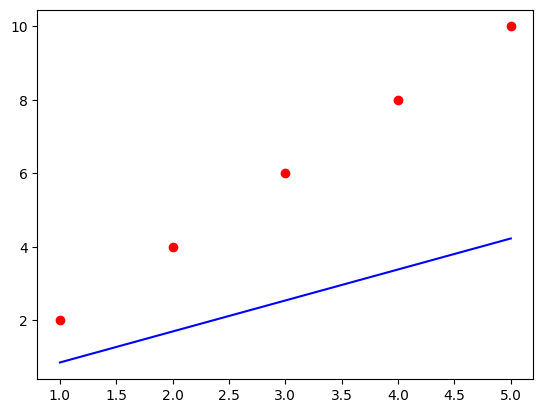

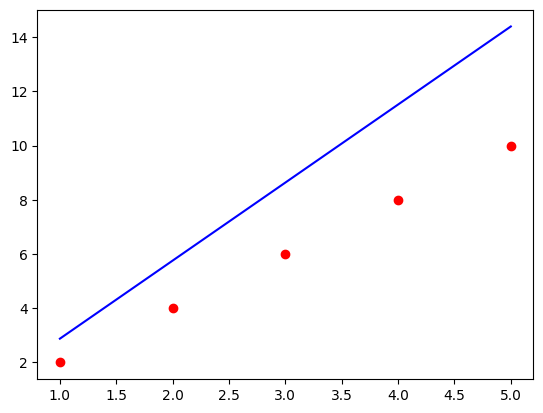

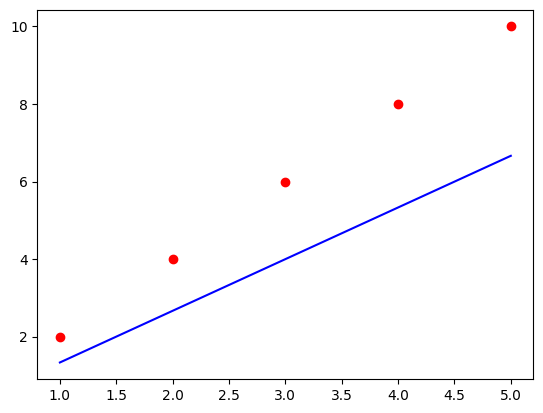

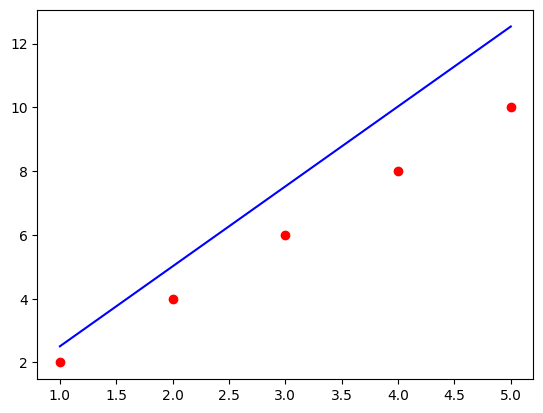

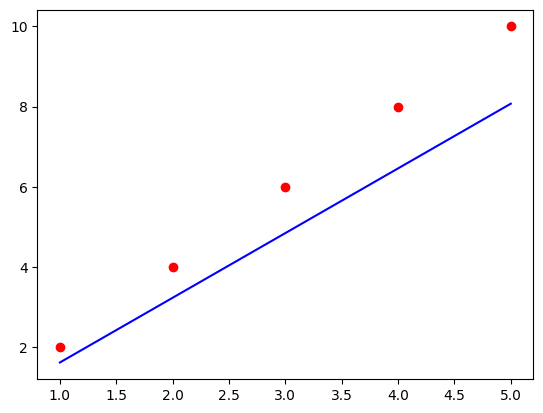

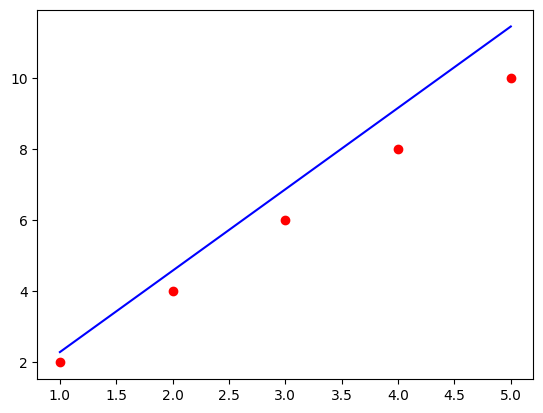

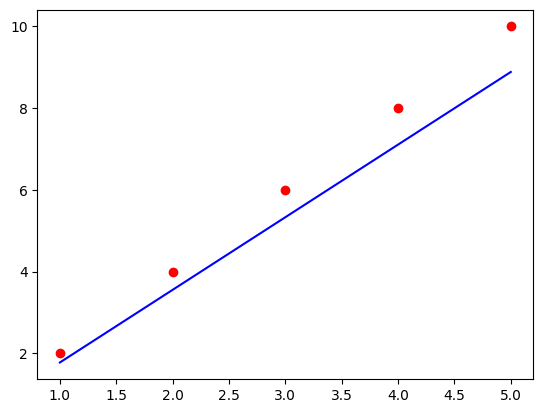

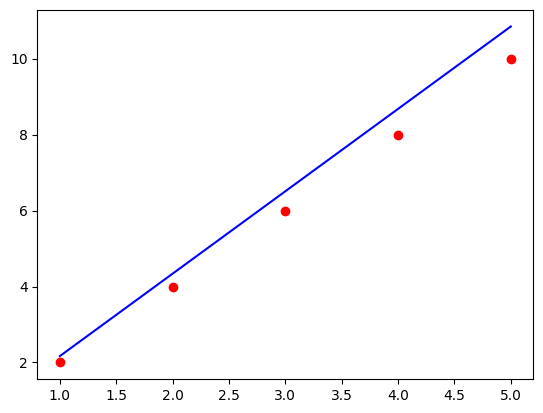

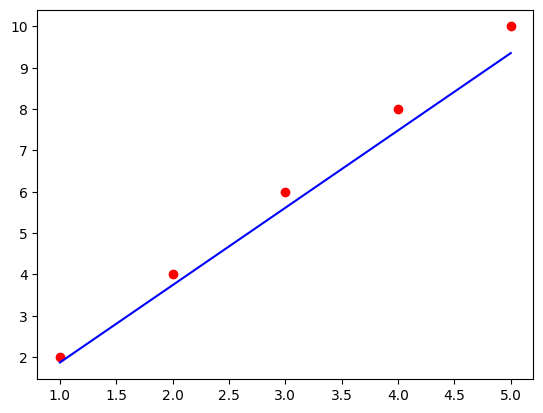

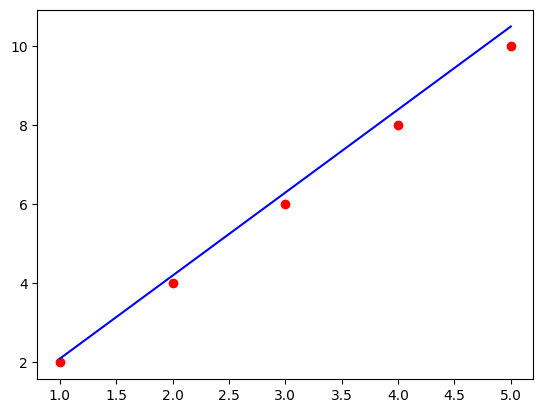

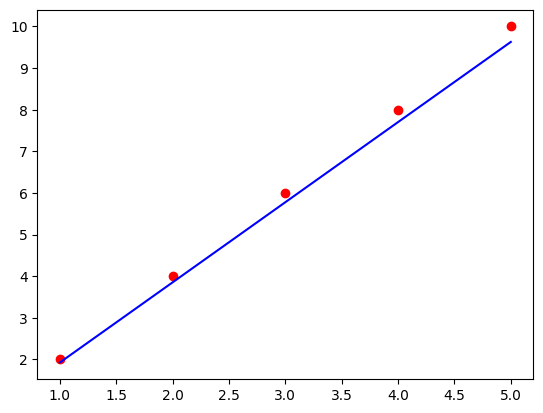

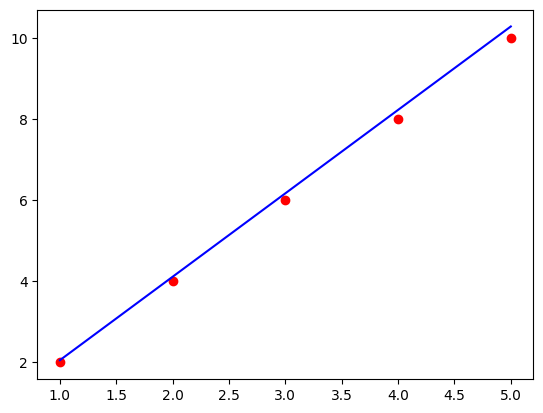

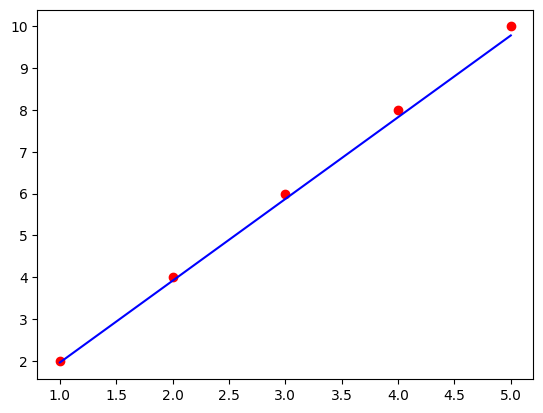

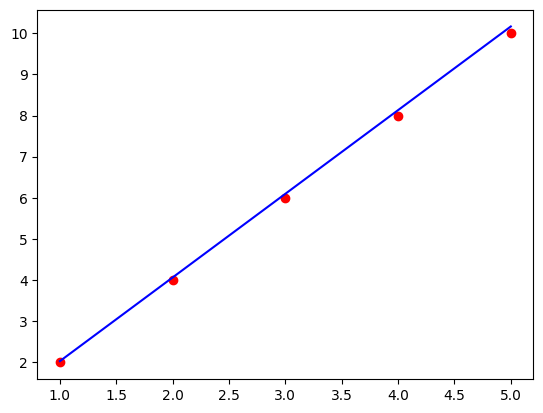

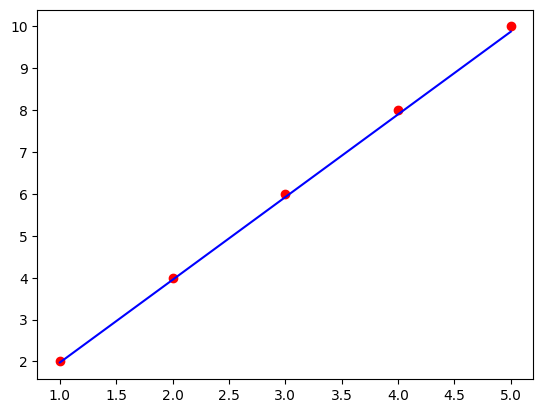

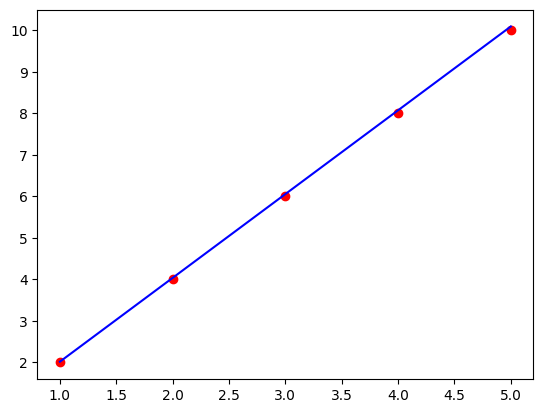

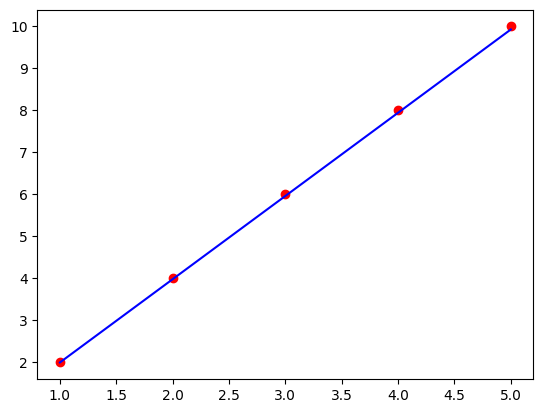

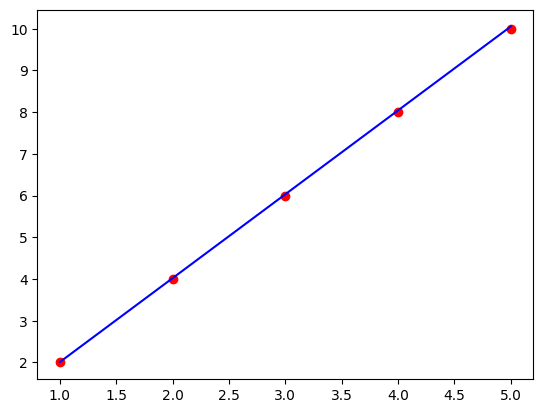

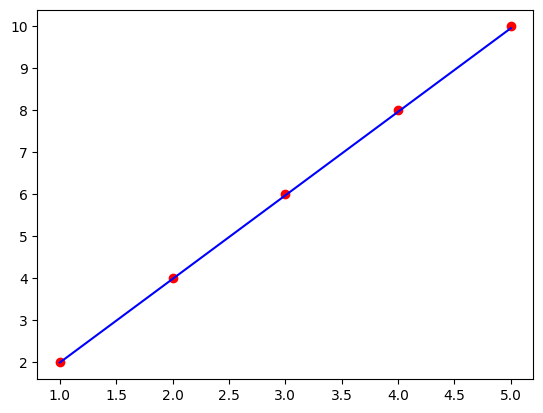

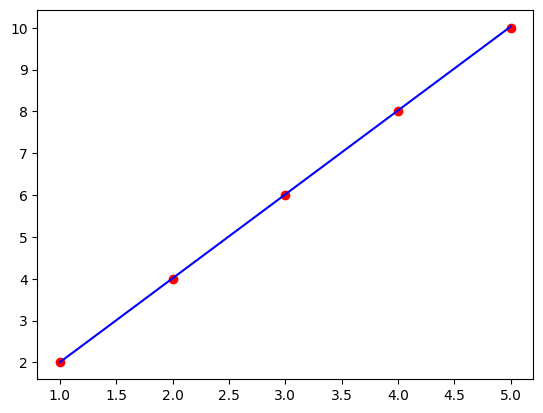

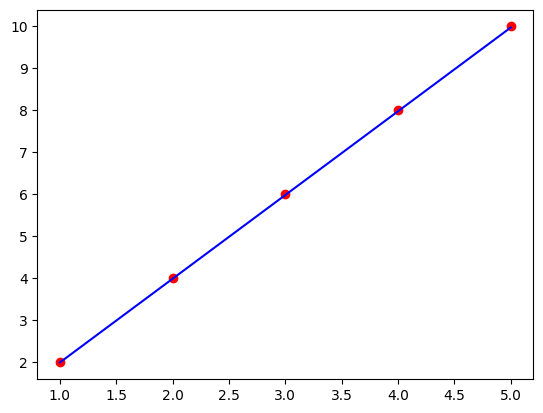

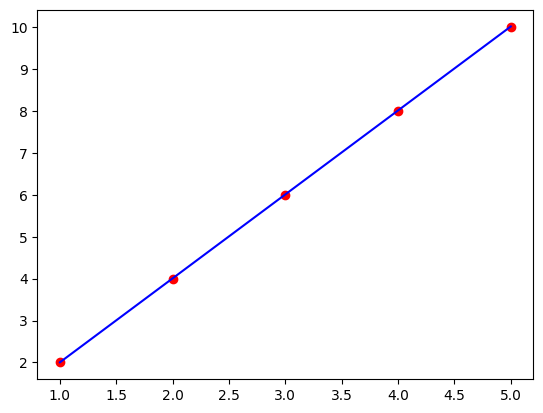

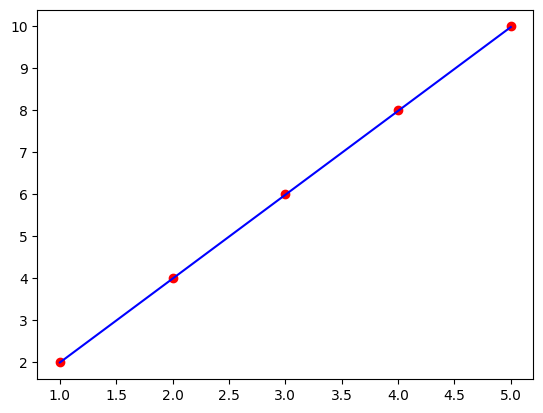

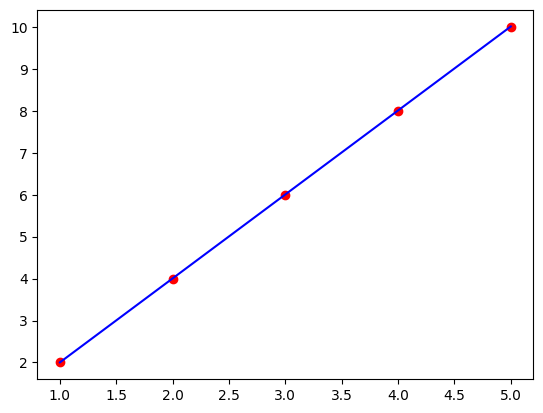

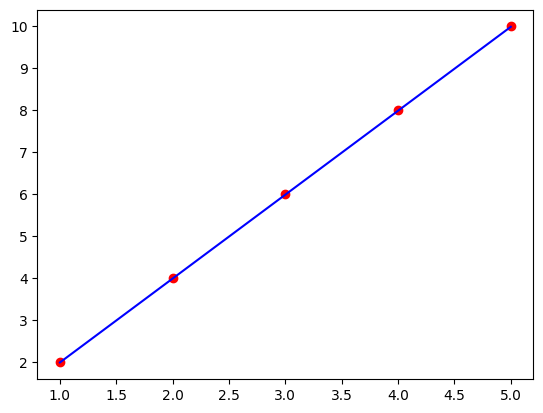

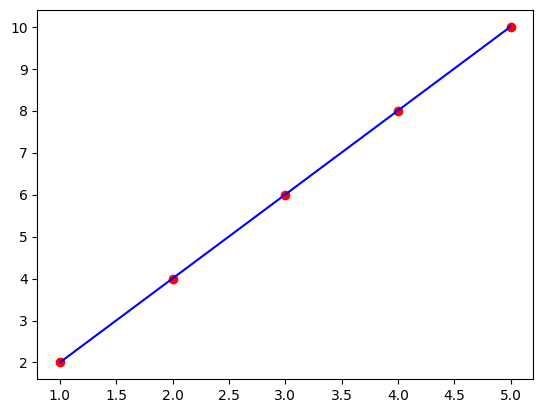

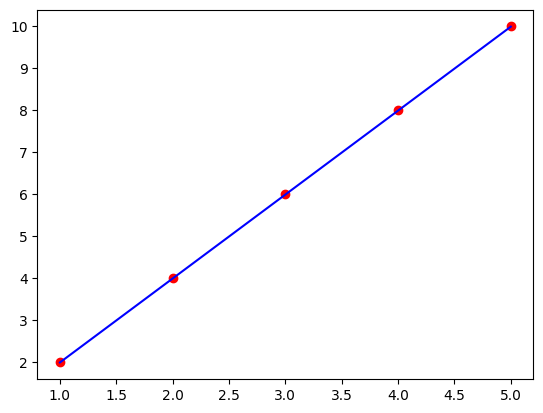

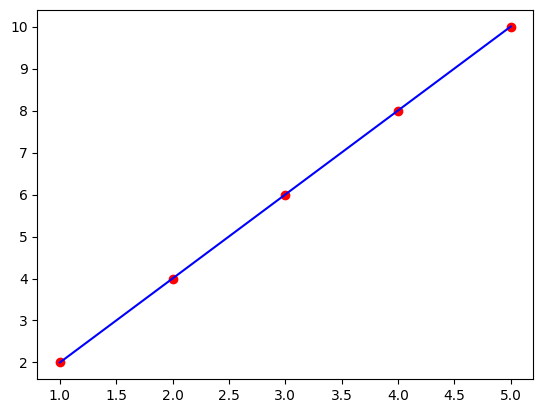

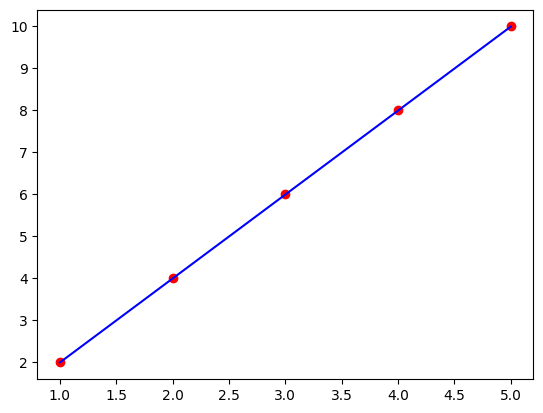

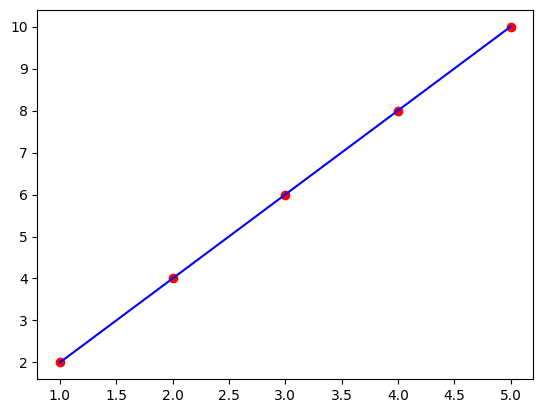

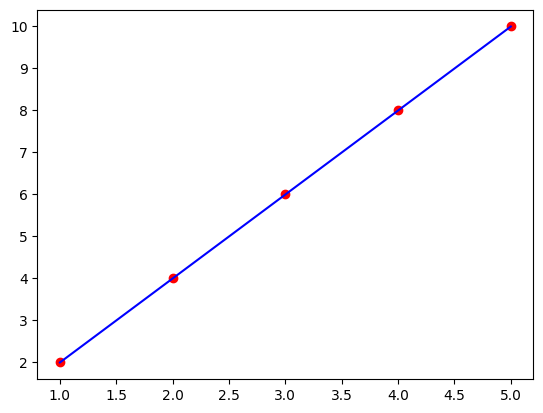

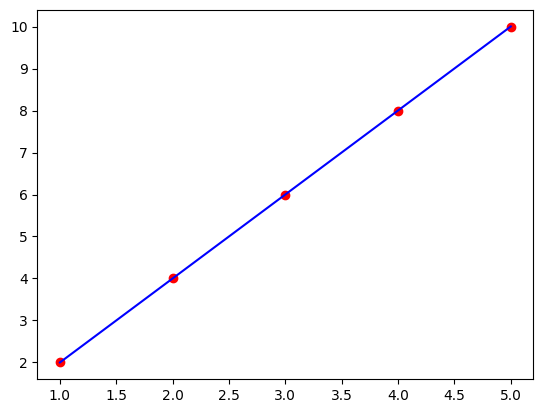

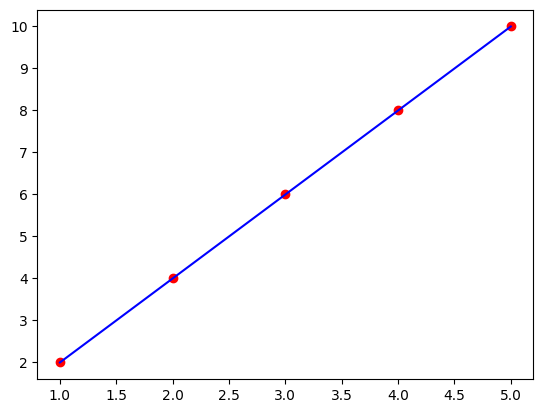

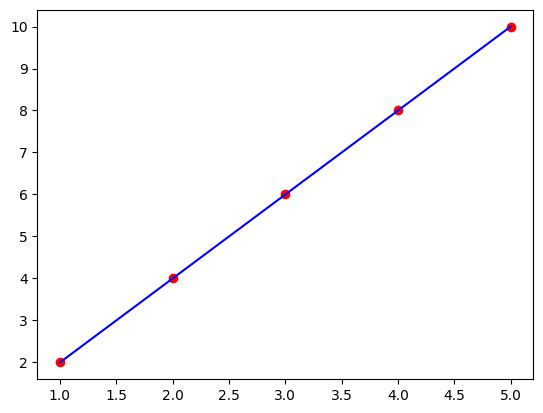

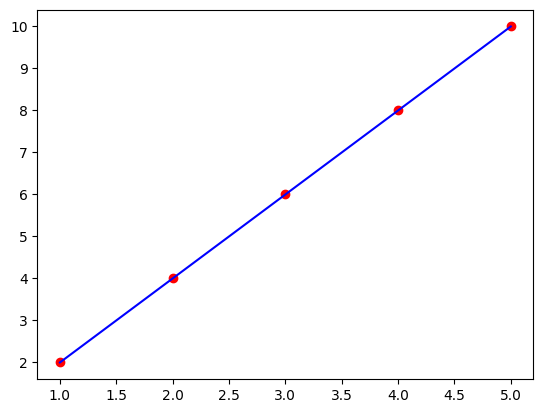

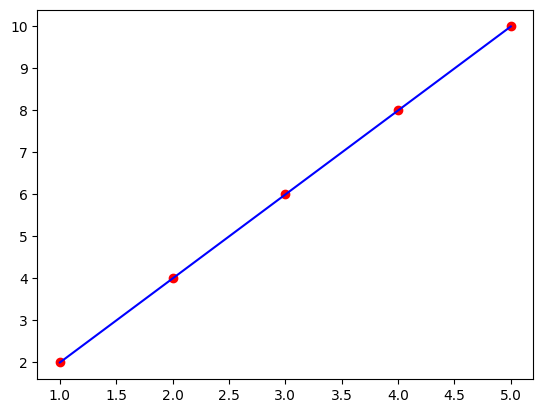

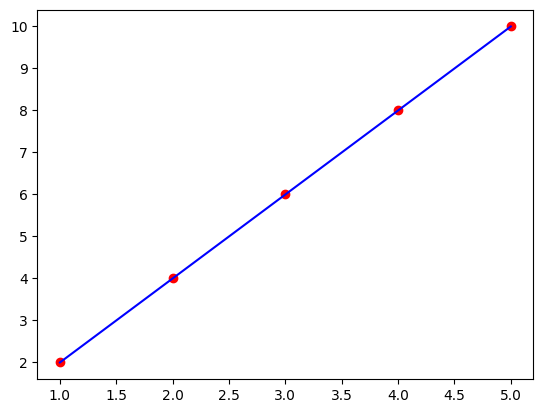

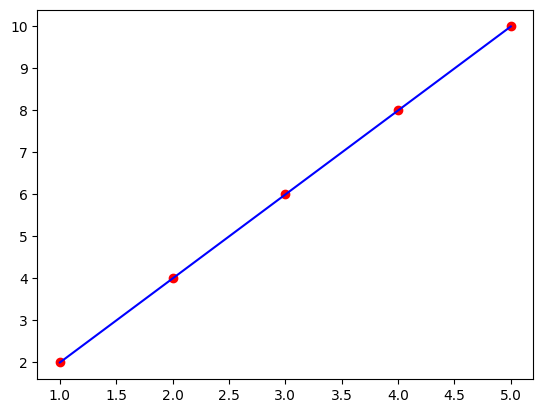

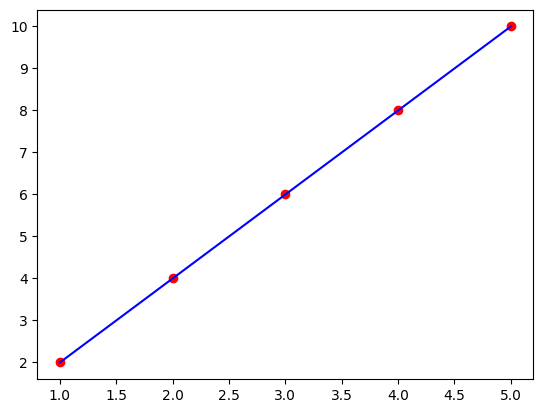

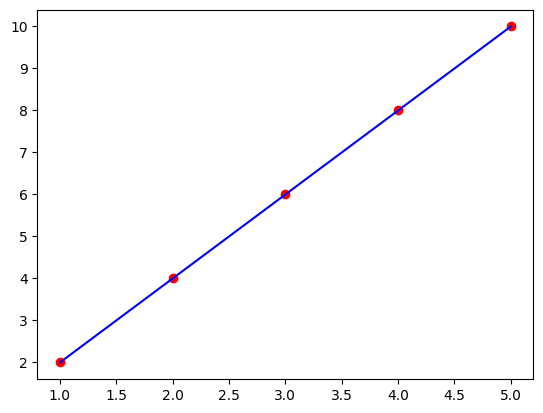

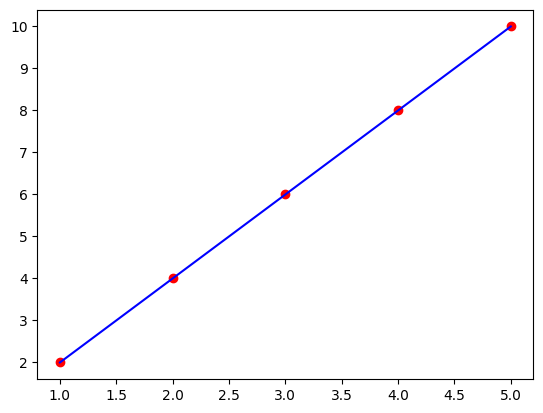

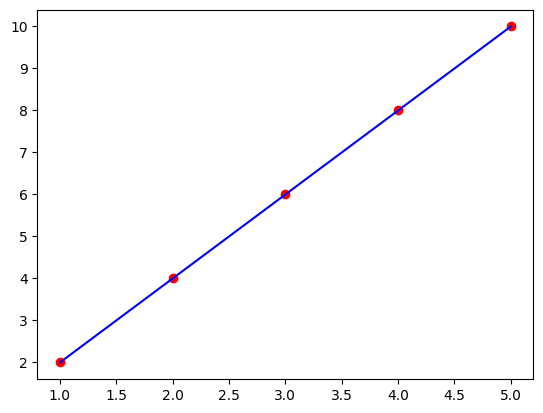

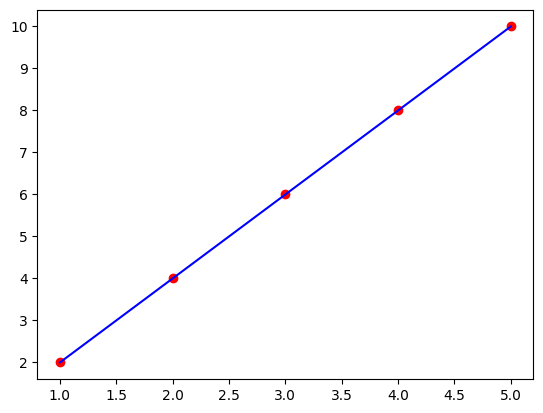

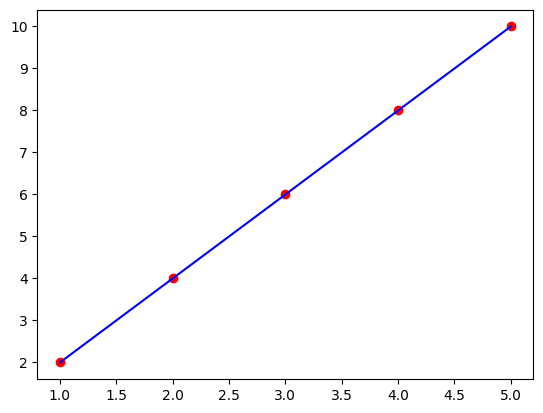

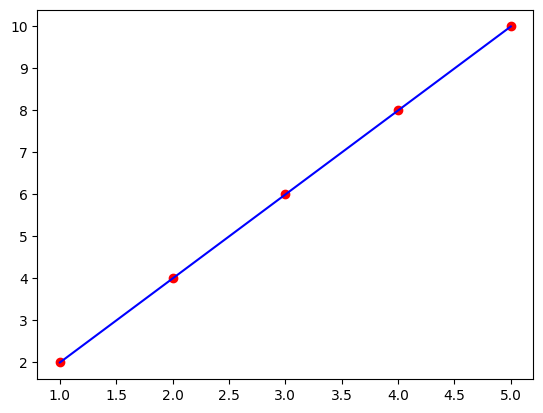

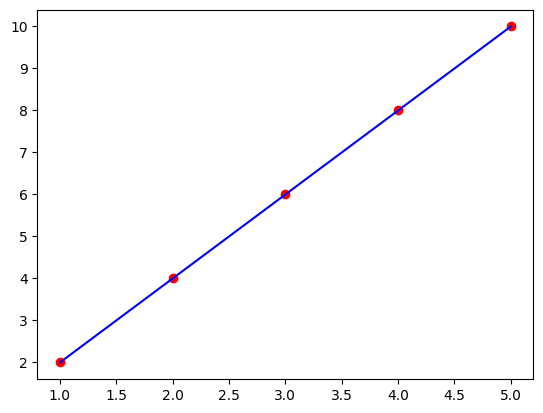

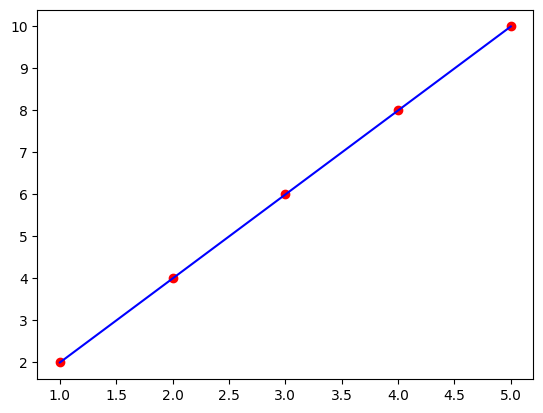

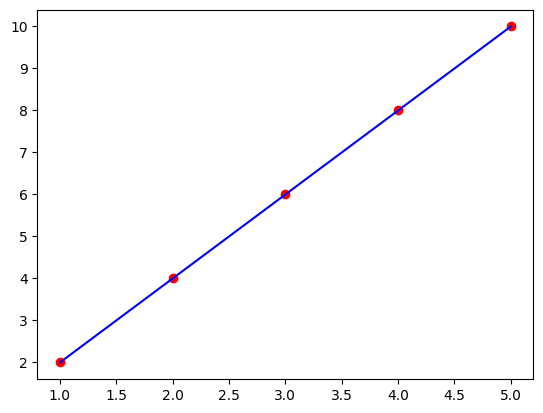

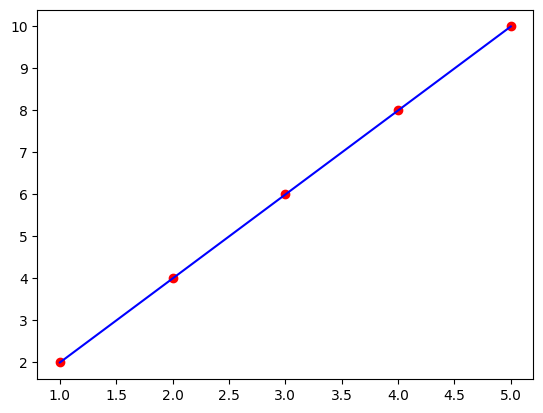

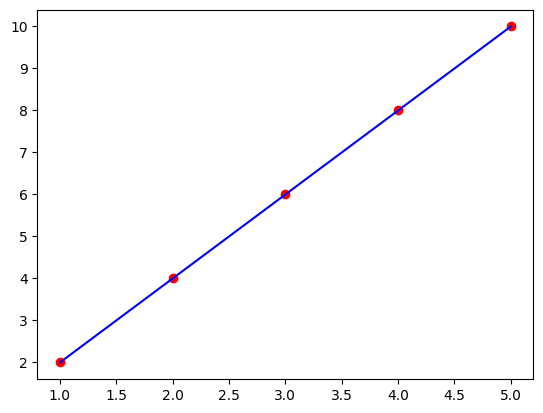

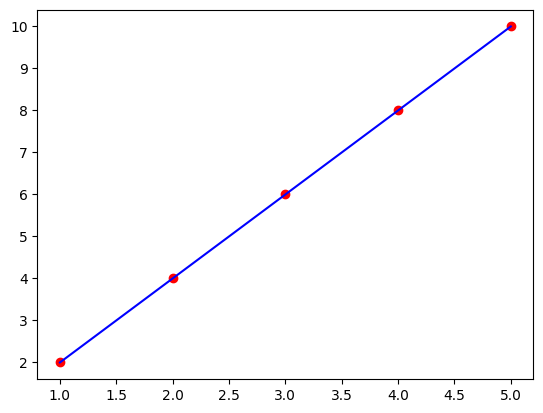

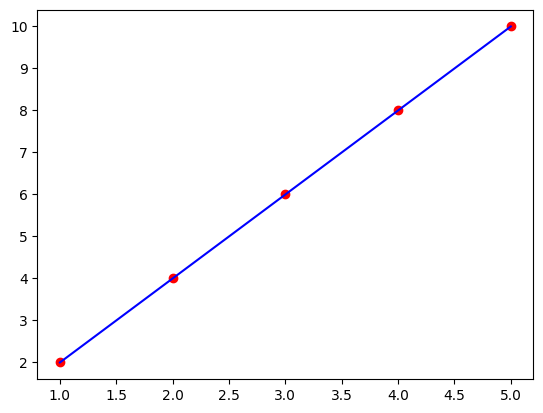

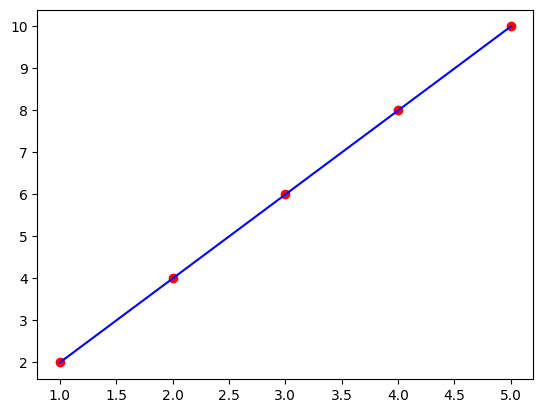

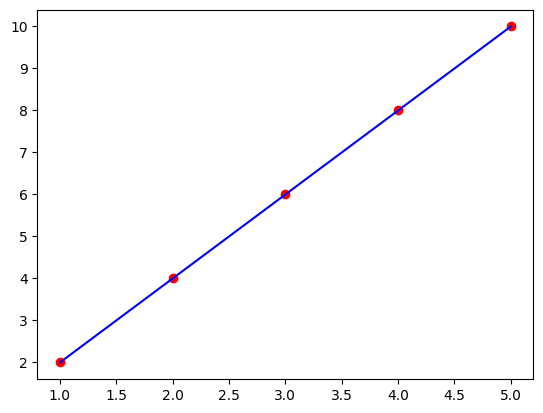

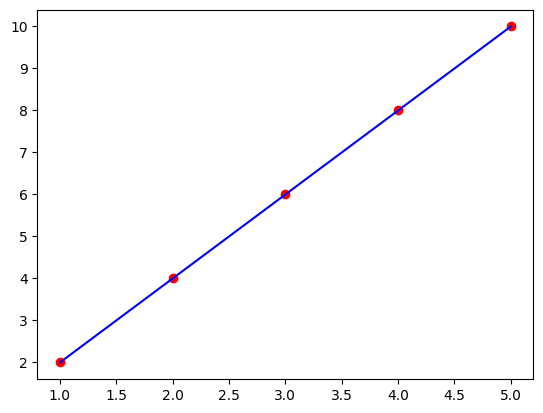

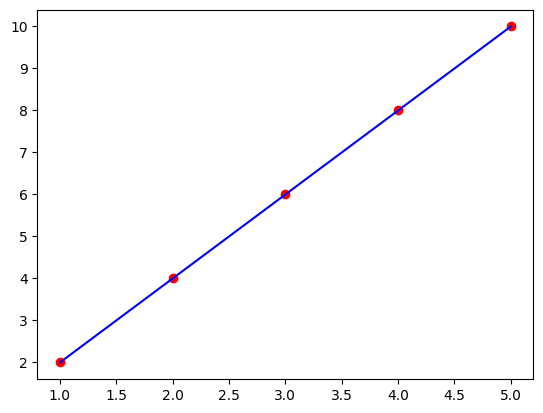

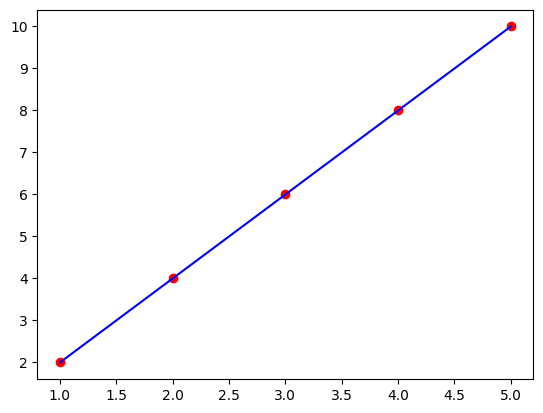

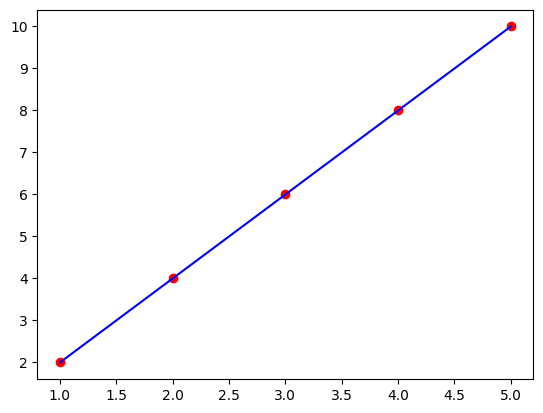

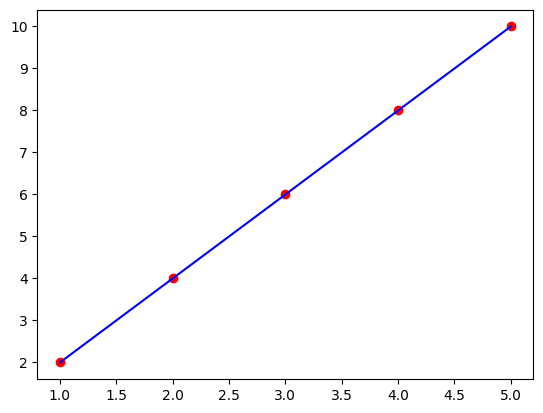

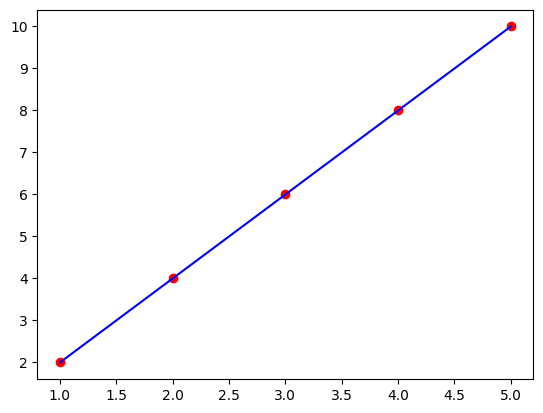

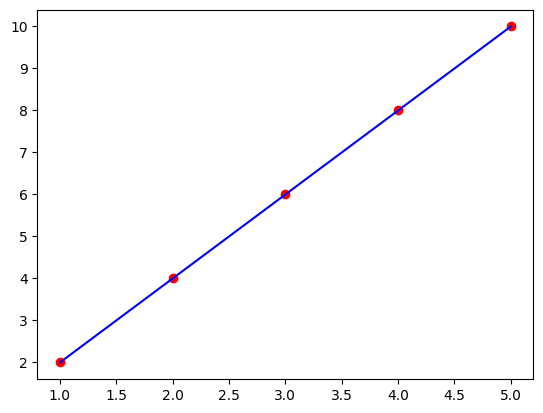

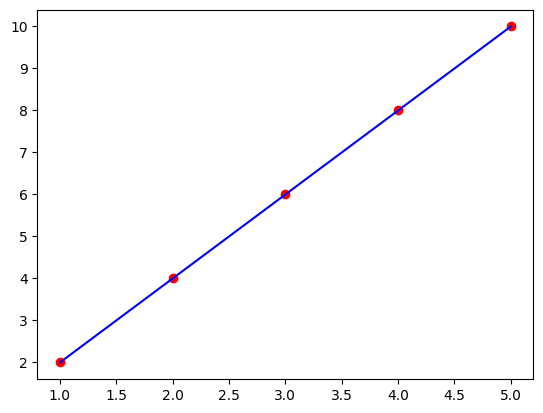

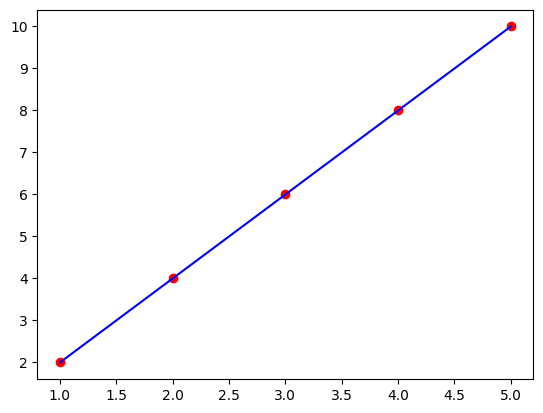

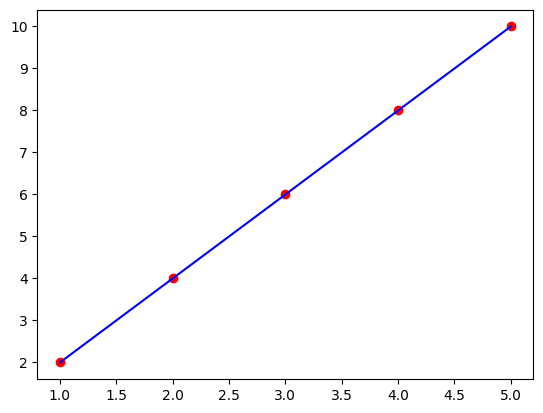

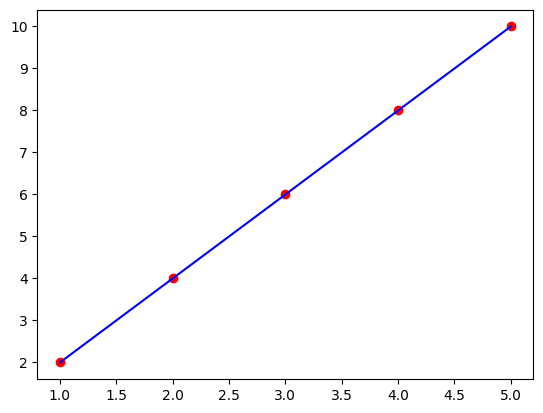

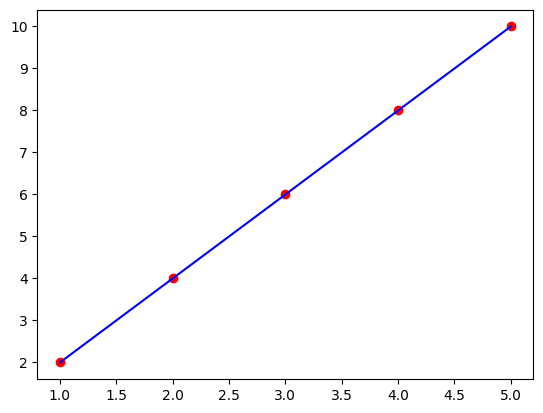

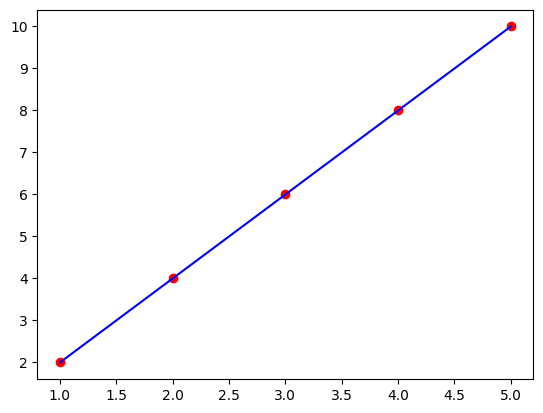

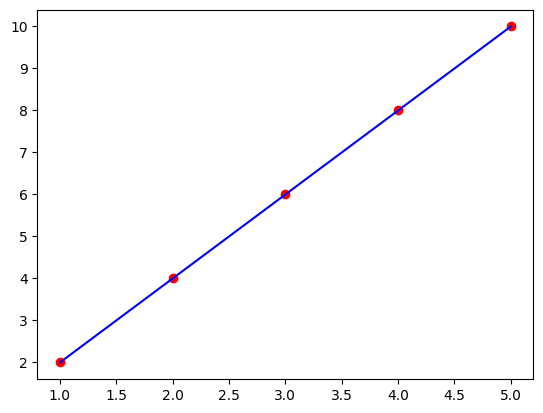

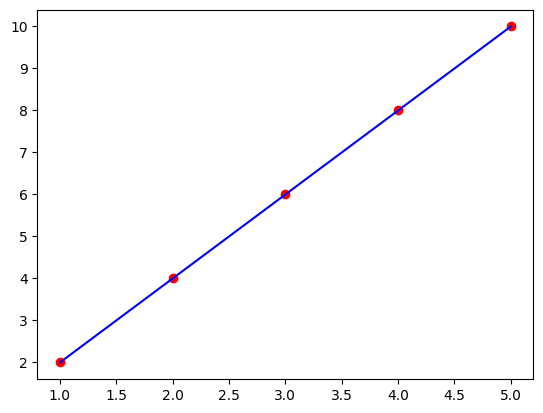

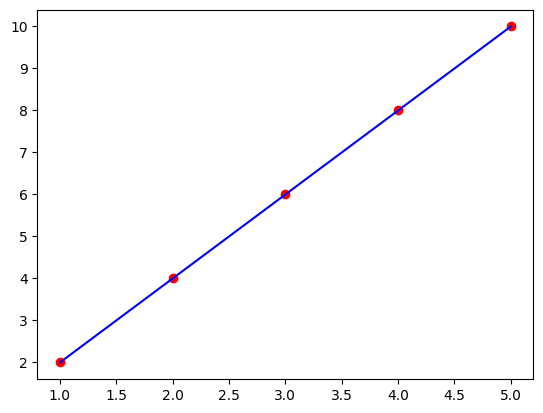

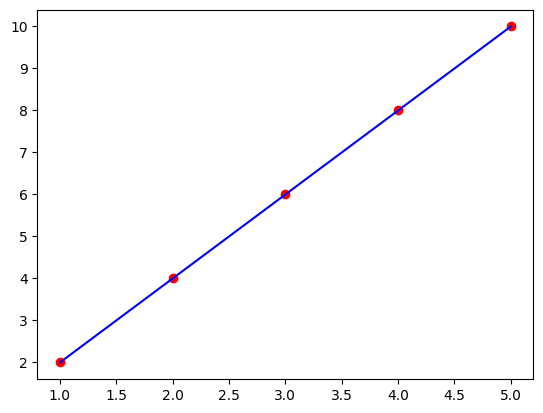

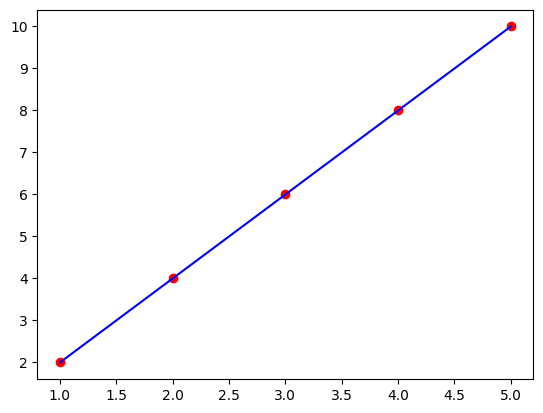

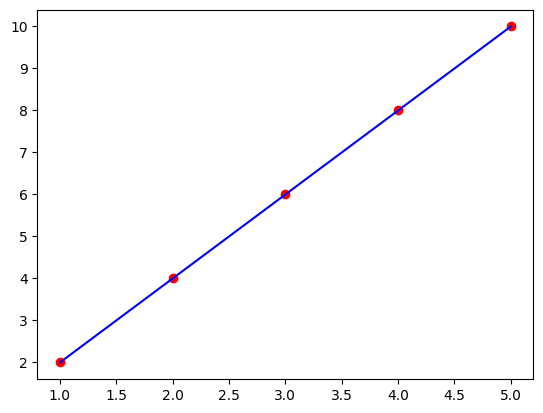

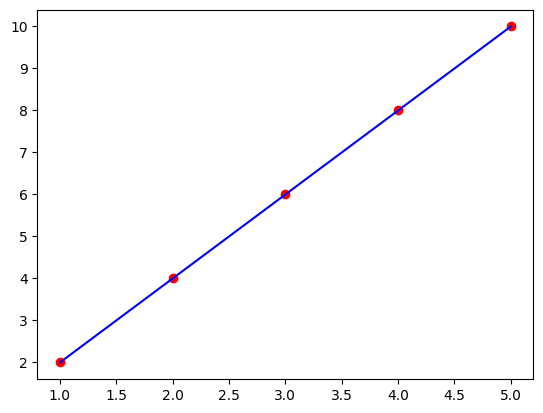

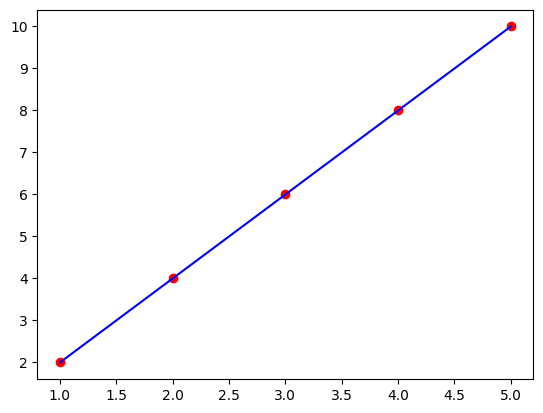

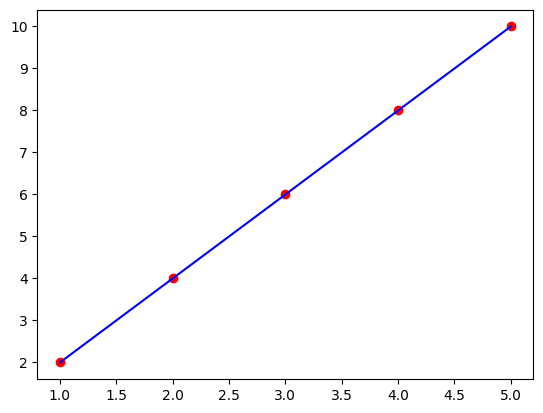

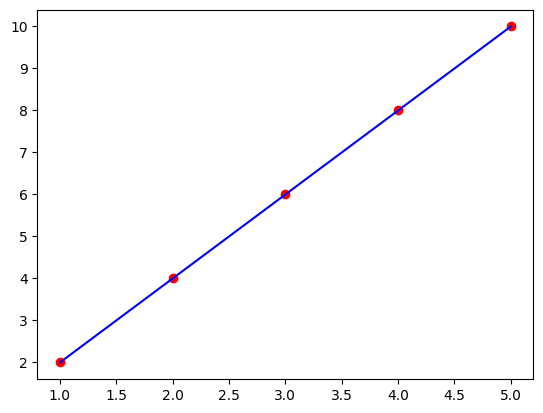

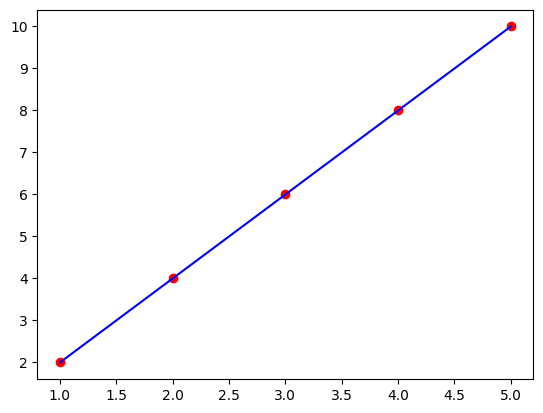

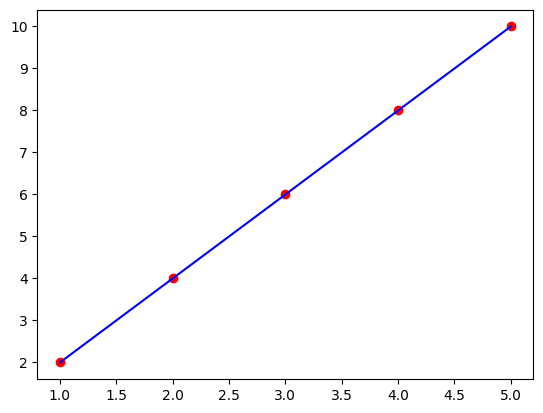

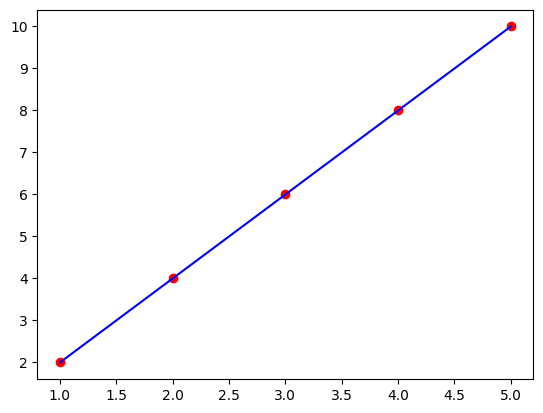

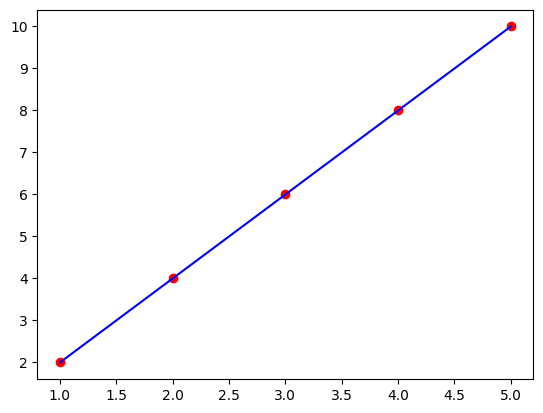

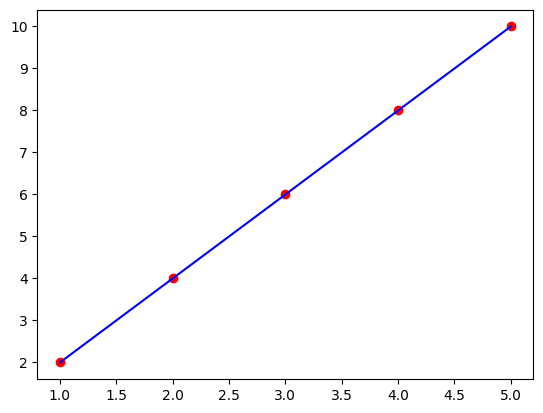

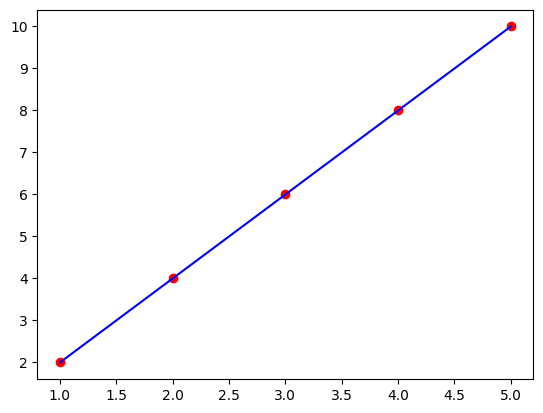

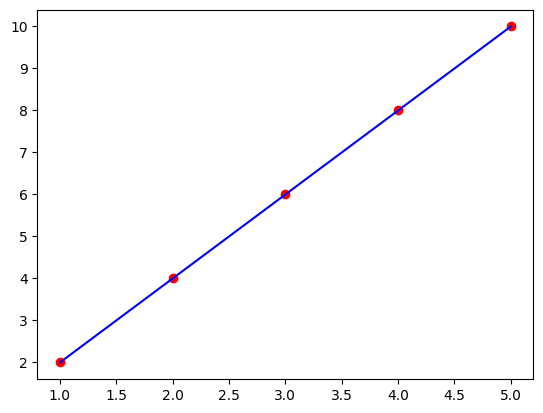

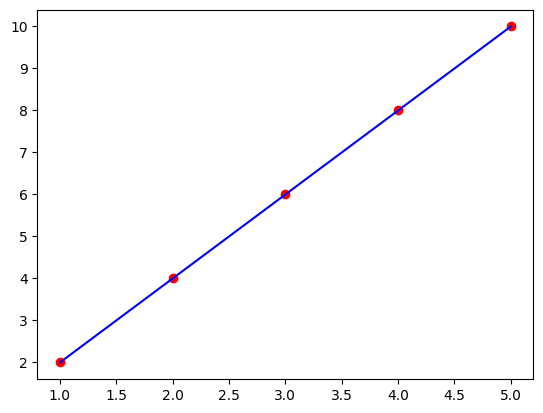

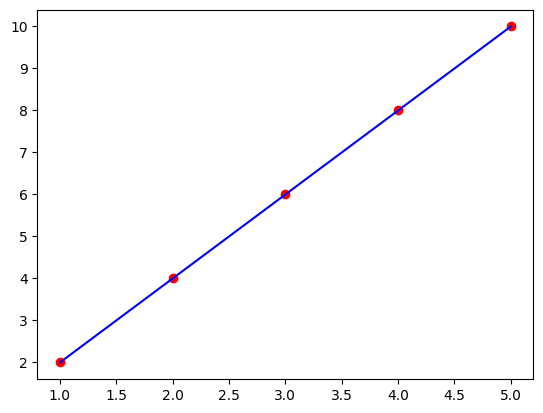

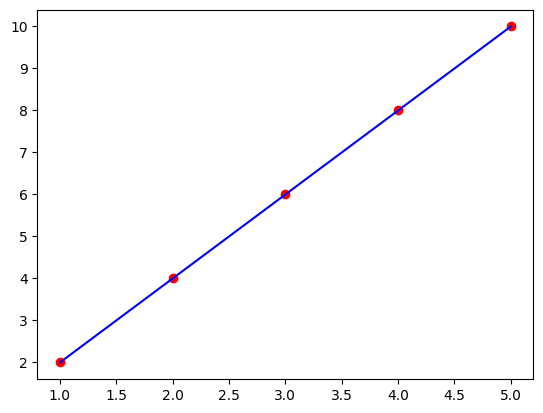

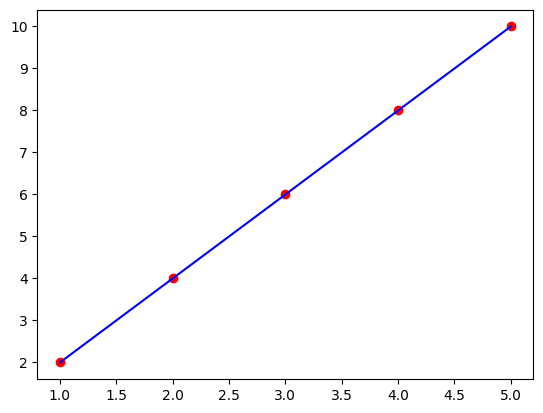

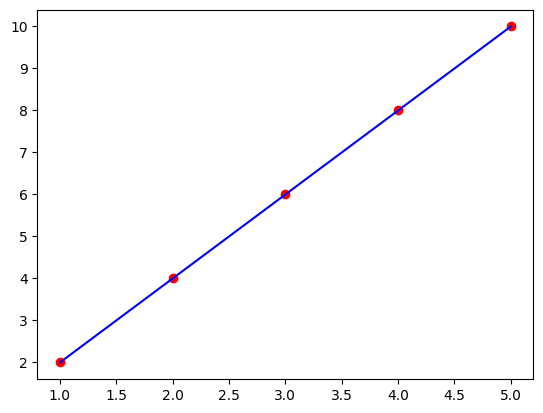

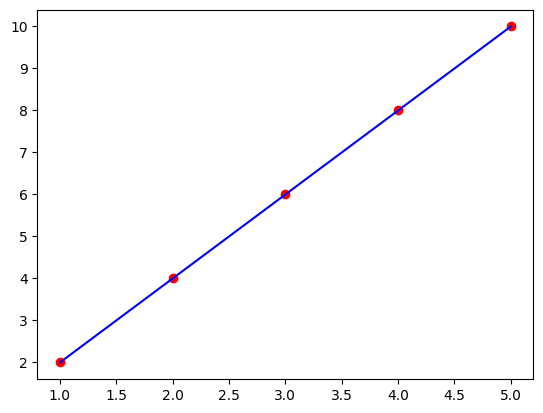

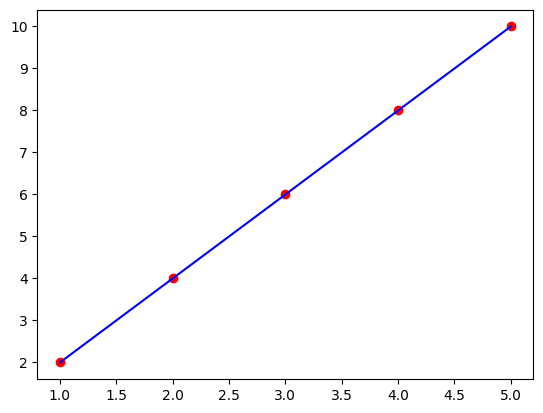

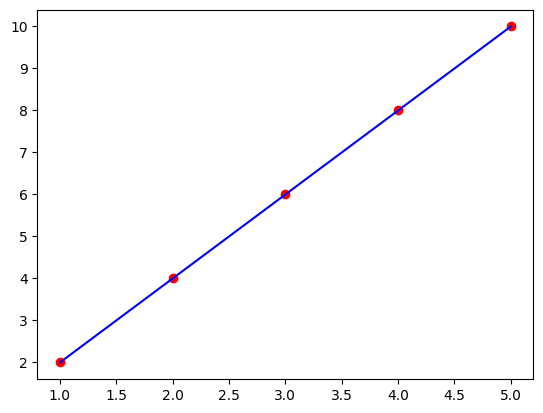

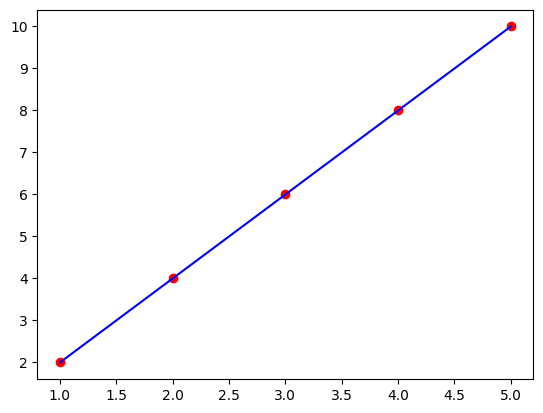

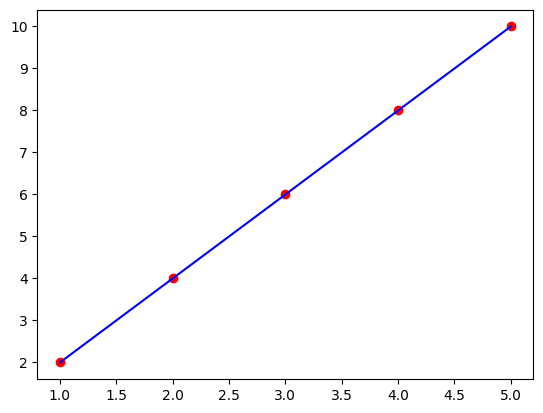

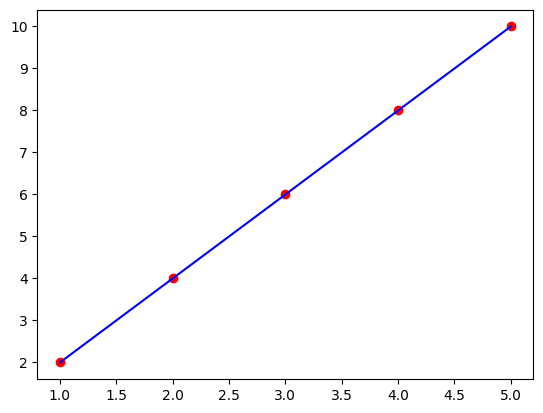

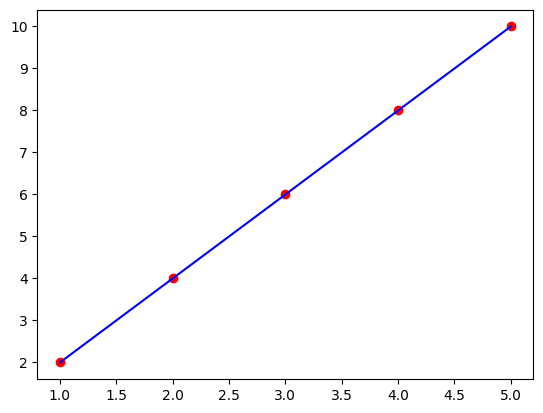

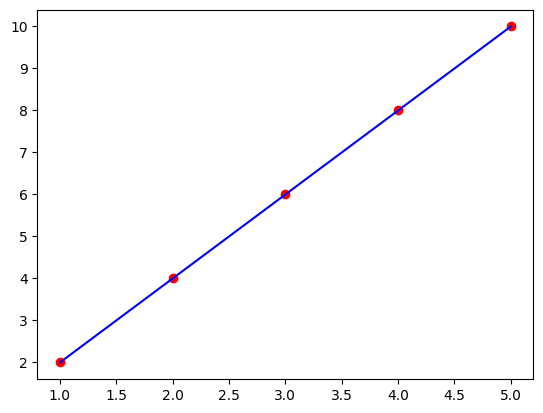

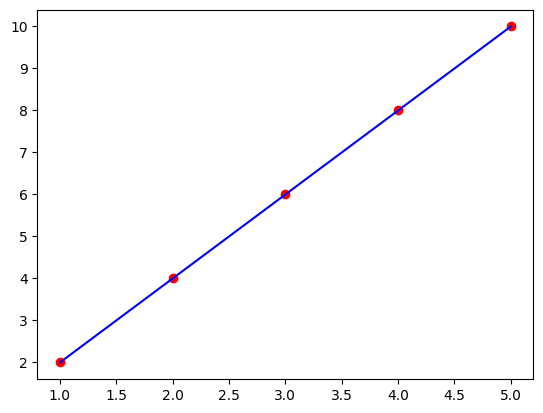

Prediction after training: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


In [2]:
import matplotlib.pyplot as plt
import torch

# USING PYTORCH BACKWARD -> SO NO GRADIENT MANUAL  PUTTING TO GET WEIGHTS AFTER UPDATION BY LOSS BACKWARD
X = torch.tensor([1,2,3,4,5],dtype = torch.float32)
Y = 2*X
w = torch.tensor(0.0, dtype = torch.float32 , requires_grad = True)
def forward(x) :
    return w*x
def loss(y,y_predicted) :
    return ((y-y_predicted)**2).mean()
print(f'Prediction before training: {forward(X)}')
lr = 0.08
n_iters = 100
for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    l.backward()
    with torch.no_grad():
        w -= lr * w.grad
        w.grad.zero_()
    plt.plot(X.numpy(),Y.numpy(),'ro')
    plt.plot(X.numpy(),y_pred.detach().numpy(),'b-')
    plt.pause(0.1)
    plt.show()

print(f'Prediction after training: {forward(X)}')

Prediction before training: tensor([0., 0., 0., 0., 0.], grad_fn=<MulBackward0>)
Epoch 1: Loss = 44.0
Weight after epoch 1: 0.4399999976158142
Prediction after epoch 1: tensor([0.4400, 0.8800, 1.3200, 1.7600, 2.2000], grad_fn=<MulBackward0>)


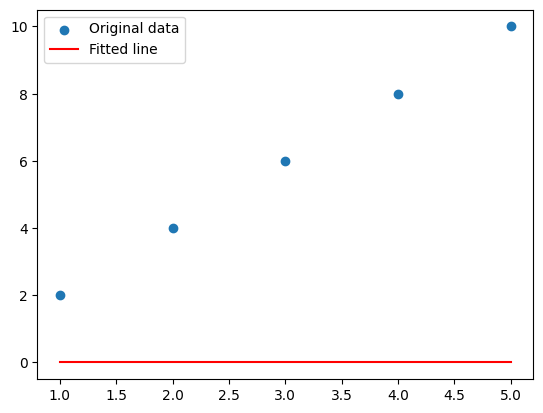

Epoch 2: Loss = 26.769601821899414
Weight after epoch 2: 0.7832000255584717
Prediction after epoch 2: tensor([0.7832, 1.5664, 2.3496, 3.1328, 3.9160], grad_fn=<MulBackward0>)


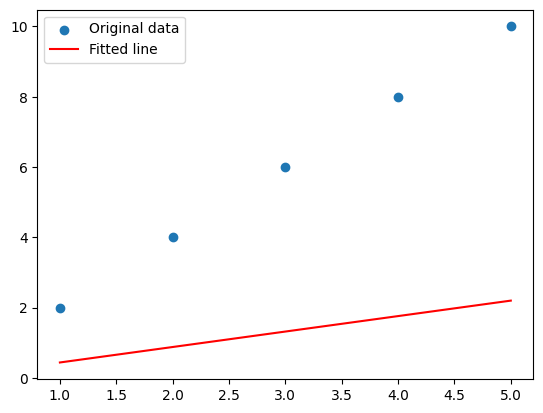

Epoch 3: Loss = 16.286624908447266
Weight after epoch 3: 1.0508960485458374
Prediction after epoch 3: tensor([1.0509, 2.1018, 3.1527, 4.2036, 5.2545], grad_fn=<MulBackward0>)


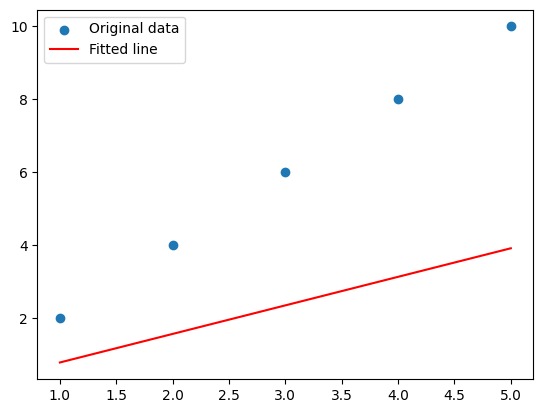

Epoch 4: Loss = 9.908781051635742
Weight after epoch 4: 1.2596988677978516
Prediction after epoch 4: tensor([1.2597, 2.5194, 3.7791, 5.0388, 6.2985], grad_fn=<MulBackward0>)


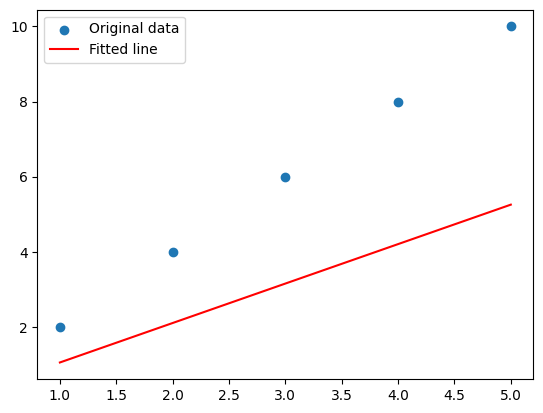

Epoch 5: Loss = 6.02850341796875
Weight after epoch 5: 1.4225651025772095
Prediction after epoch 5: tensor([1.4226, 2.8451, 4.2677, 5.6903, 7.1128], grad_fn=<MulBackward0>)


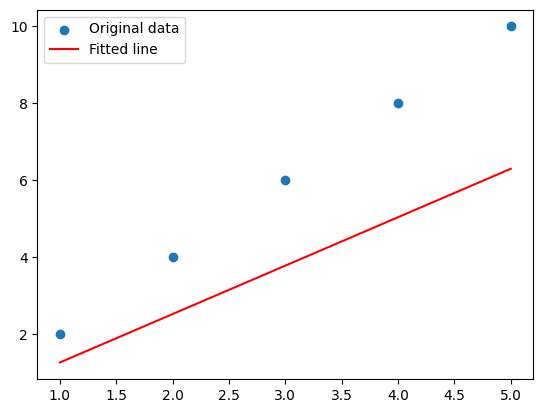

Epoch 6: Loss = 3.6677417755126953
Weight after epoch 6: 1.5496007204055786
Prediction after epoch 6: tensor([1.5496, 3.0992, 4.6488, 6.1984, 7.7480], grad_fn=<MulBackward0>)


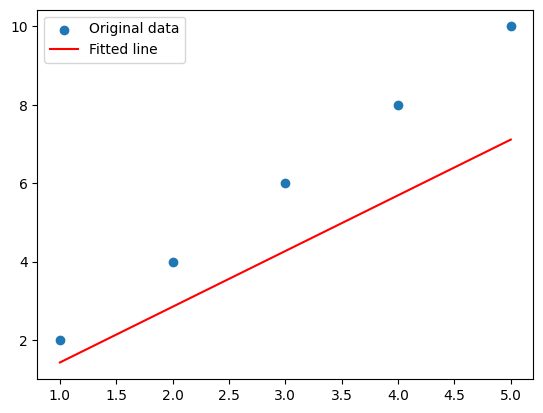

Epoch 7: Loss = 2.231454610824585
Weight after epoch 7: 1.648688554763794
Prediction after epoch 7: tensor([1.6487, 3.2974, 4.9461, 6.5948, 8.2434], grad_fn=<MulBackward0>)


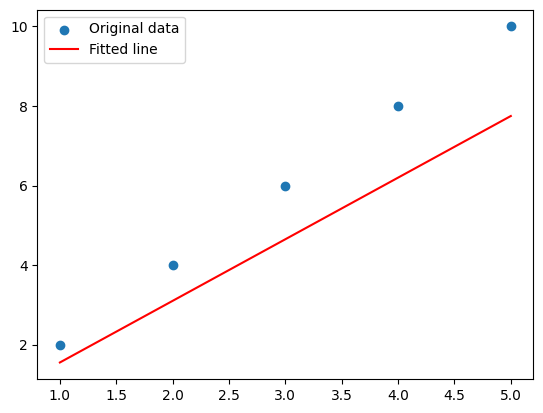

Epoch 8: Loss = 1.3576171398162842
Weight after epoch 8: 1.7259770631790161
Prediction after epoch 8: tensor([1.7260, 3.4520, 5.1779, 6.9039, 8.6299], grad_fn=<MulBackward0>)


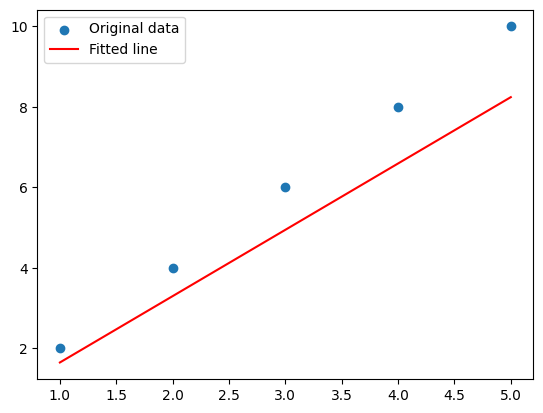

Epoch 9: Loss = 0.8259741067886353
Weight after epoch 9: 1.7862621545791626
Prediction after epoch 9: tensor([1.7863, 3.5725, 5.3588, 7.1450, 8.9313], grad_fn=<MulBackward0>)


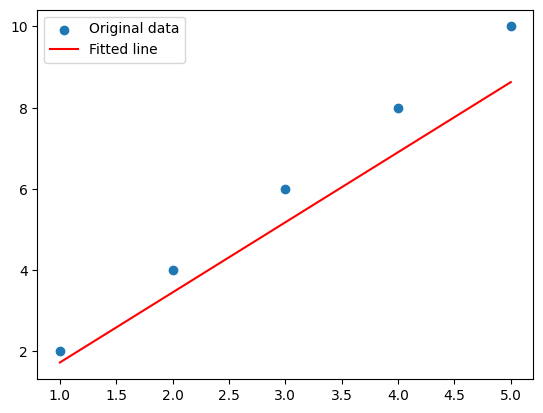

Epoch 10: Loss = 0.5025225877761841
Weight after epoch 10: 1.8332844972610474
Prediction after epoch 10: tensor([1.8333, 3.6666, 5.4999, 7.3331, 9.1664], grad_fn=<MulBackward0>)


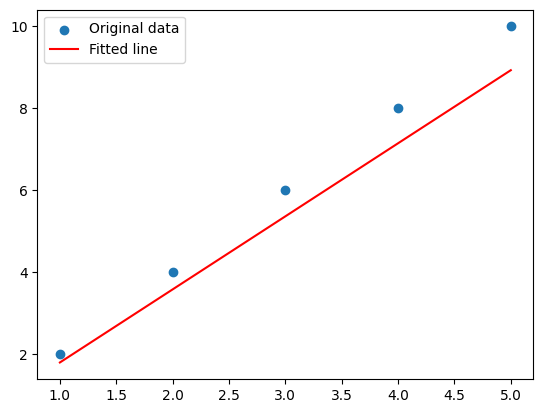

Epoch 11: Loss = 0.3057344853878021
Weight after epoch 11: 1.8699618577957153
Prediction after epoch 11: tensor([1.8700, 3.7399, 5.6099, 7.4798, 9.3498], grad_fn=<MulBackward0>)


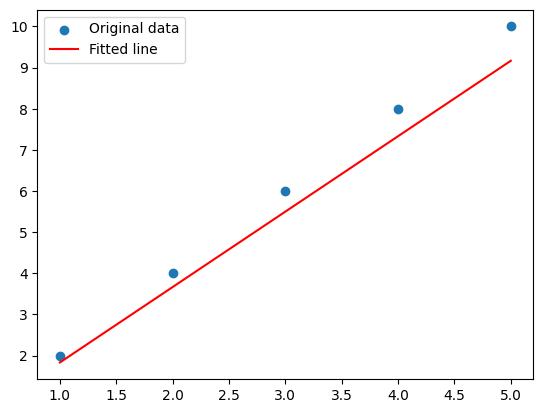

Epoch 12: Loss = 0.1860090047121048
Weight after epoch 12: 1.89857017993927
Prediction after epoch 12: tensor([1.8986, 3.7971, 5.6957, 7.5943, 9.4929], grad_fn=<MulBackward0>)


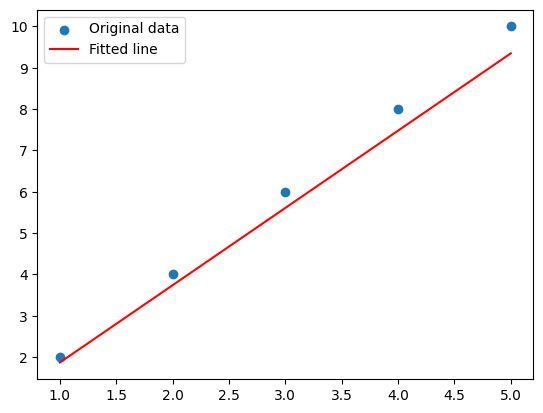

Epoch 13: Loss = 0.11316800117492676
Weight after epoch 13: 1.9208847284317017
Prediction after epoch 13: tensor([1.9209, 3.8418, 5.7627, 7.6835, 9.6044], grad_fn=<MulBackward0>)


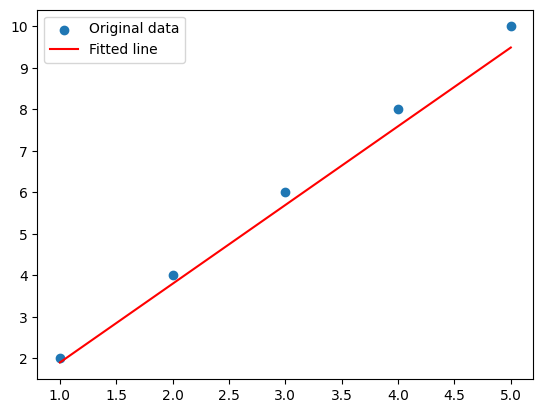

Epoch 14: Loss = 0.06885149329900742
Weight after epoch 14: 1.9382901191711426
Prediction after epoch 14: tensor([1.9383, 3.8766, 5.8149, 7.7532, 9.6915], grad_fn=<MulBackward0>)


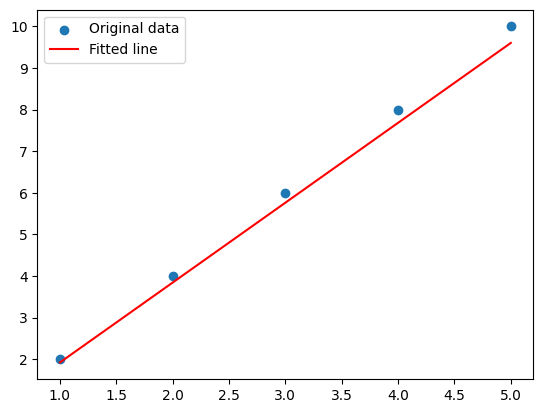

Epoch 15: Loss = 0.041889261454343796
Weight after epoch 15: 1.9518662691116333
Prediction after epoch 15: tensor([1.9519, 3.9037, 5.8556, 7.8075, 9.7593], grad_fn=<MulBackward0>)


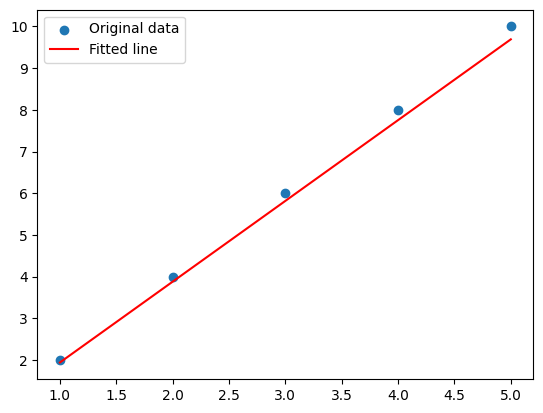

Epoch 16: Loss = 0.02548537589609623
Weight after epoch 16: 1.9624556303024292
Prediction after epoch 16: tensor([1.9625, 3.9249, 5.8874, 7.8498, 9.8123], grad_fn=<MulBackward0>)


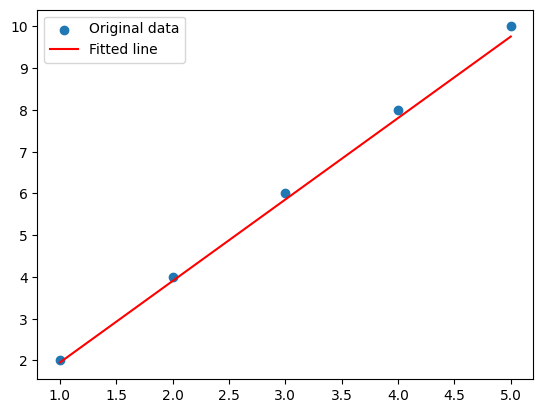

Epoch 17: Loss = 0.015505408868193626
Weight after epoch 17: 1.9707154035568237
Prediction after epoch 17: tensor([1.9707, 3.9414, 5.9121, 7.8829, 9.8536], grad_fn=<MulBackward0>)


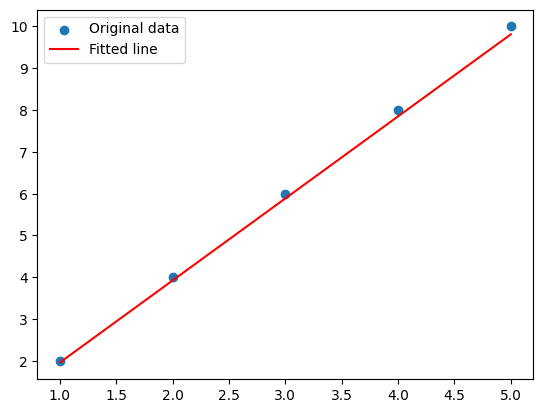

Epoch 18: Loss = 0.009433488361537457
Weight after epoch 18: 1.9771580696105957
Prediction after epoch 18: tensor([1.9772, 3.9543, 5.9315, 7.9086, 9.8858], grad_fn=<MulBackward0>)


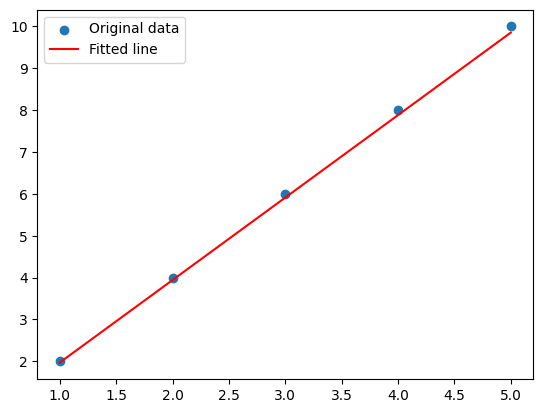

Epoch 19: Loss = 0.005739313550293446
Weight after epoch 19: 1.9821833372116089
Prediction after epoch 19: tensor([1.9822, 3.9644, 5.9465, 7.9287, 9.9109], grad_fn=<MulBackward0>)


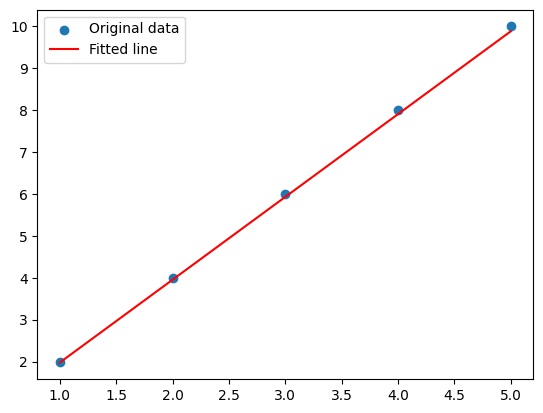

Epoch 20: Loss = 0.0034917835146188736
Weight after epoch 20: 1.9861030578613281
Prediction after epoch 20: tensor([1.9861, 3.9722, 5.9583, 7.9444, 9.9305], grad_fn=<MulBackward0>)


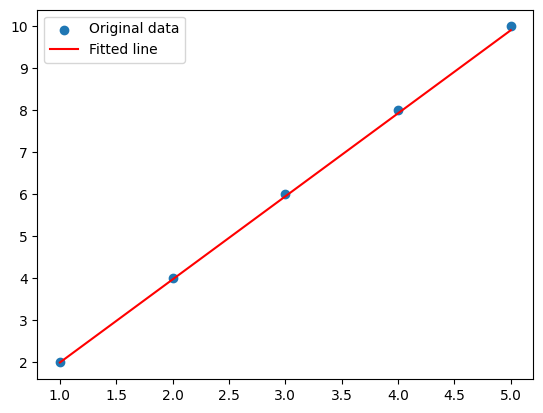

Epoch 21: Loss = 0.0021243751980364323
Weight after epoch 21: 1.989160418510437
Prediction after epoch 21: tensor([1.9892, 3.9783, 5.9675, 7.9566, 9.9458], grad_fn=<MulBackward0>)


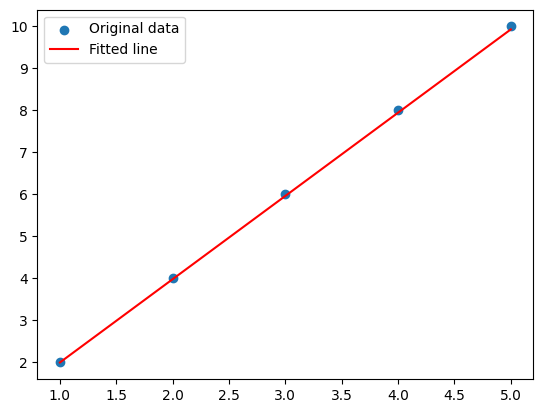

Epoch 22: Loss = 0.0012924710754305124
Weight after epoch 22: 1.9915450811386108
Prediction after epoch 22: tensor([1.9915, 3.9831, 5.9746, 7.9662, 9.9577], grad_fn=<MulBackward0>)


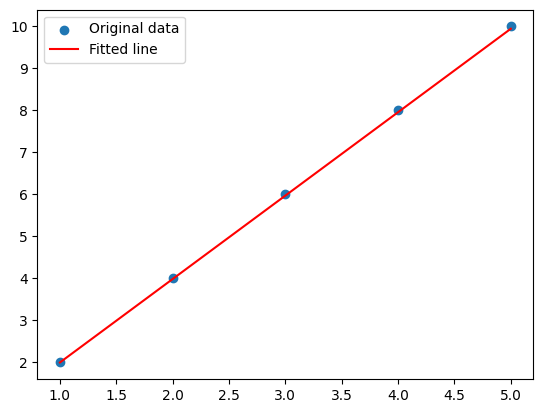

Epoch 23: Loss = 0.0007863413775339723
Weight after epoch 23: 1.9934051036834717
Prediction after epoch 23: tensor([1.9934, 3.9868, 5.9802, 7.9736, 9.9670], grad_fn=<MulBackward0>)


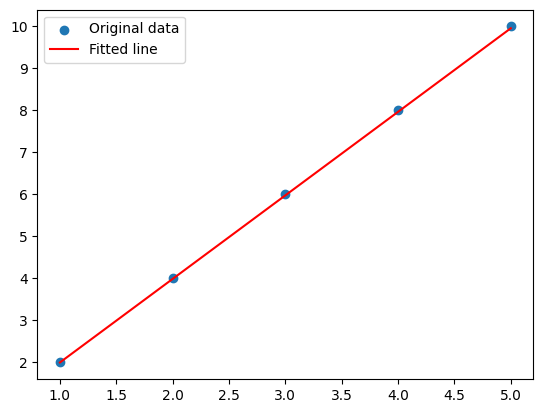

Epoch 24: Loss = 0.0004784179909620434
Weight after epoch 24: 1.9948559999465942
Prediction after epoch 24: tensor([1.9949, 3.9897, 5.9846, 7.9794, 9.9743], grad_fn=<MulBackward0>)


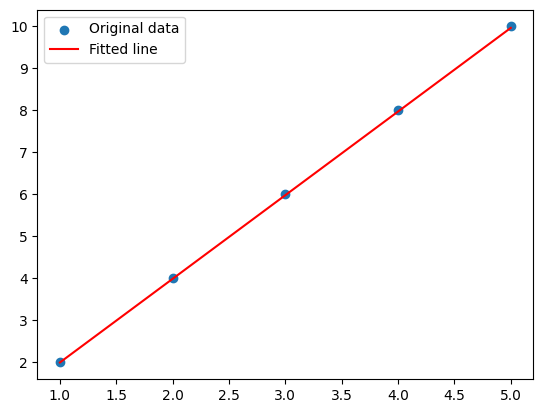

Epoch 25: Loss = 0.0002910636831074953
Weight after epoch 25: 1.9959876537322998
Prediction after epoch 25: tensor([1.9960, 3.9920, 5.9880, 7.9840, 9.9799], grad_fn=<MulBackward0>)


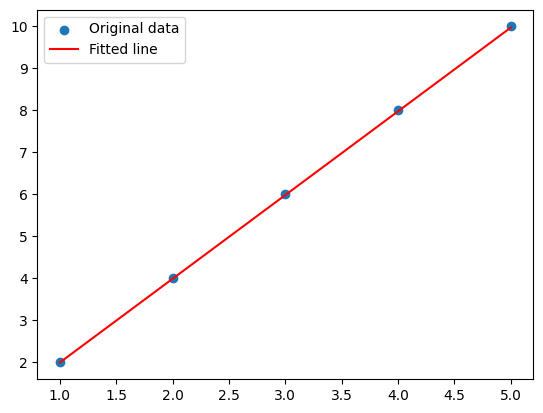

Epoch 26: Loss = 0.0001770873786881566
Weight after epoch 26: 1.9968703985214233
Prediction after epoch 26: tensor([1.9969, 3.9937, 5.9906, 7.9875, 9.9844], grad_fn=<MulBackward0>)


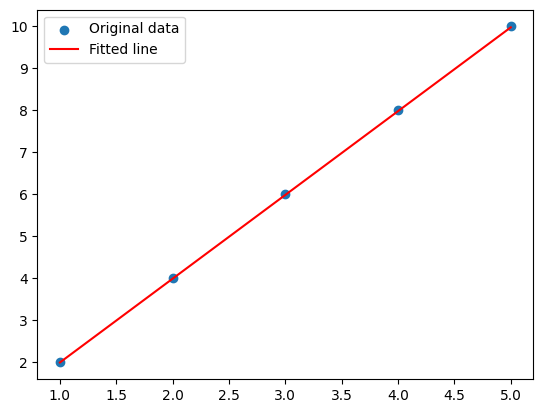

Epoch 27: Loss = 0.00010773816757136956
Weight after epoch 27: 1.9975589513778687
Prediction after epoch 27: tensor([1.9976, 3.9951, 5.9927, 7.9902, 9.9878], grad_fn=<MulBackward0>)


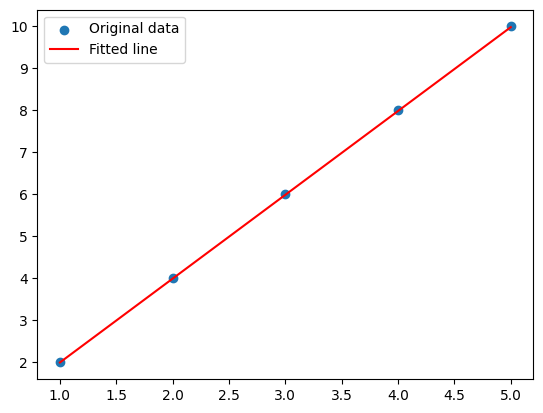

Epoch 28: Loss = 6.554566789418459e-05
Weight after epoch 28: 1.998095989227295
Prediction after epoch 28: tensor([1.9981, 3.9962, 5.9943, 7.9924, 9.9905], grad_fn=<MulBackward0>)


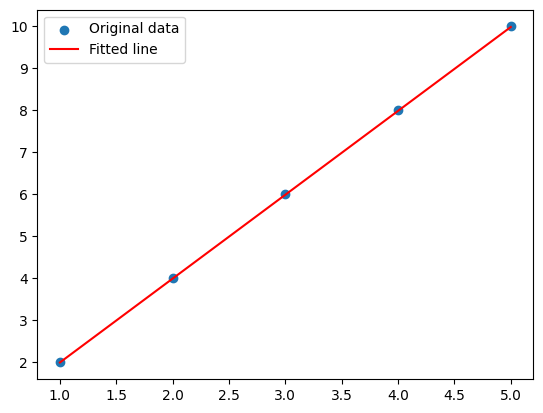

Epoch 29: Loss = 3.987600939581171e-05
Weight after epoch 29: 1.9985148906707764
Prediction after epoch 29: tensor([1.9985, 3.9970, 5.9955, 7.9941, 9.9926], grad_fn=<MulBackward0>)


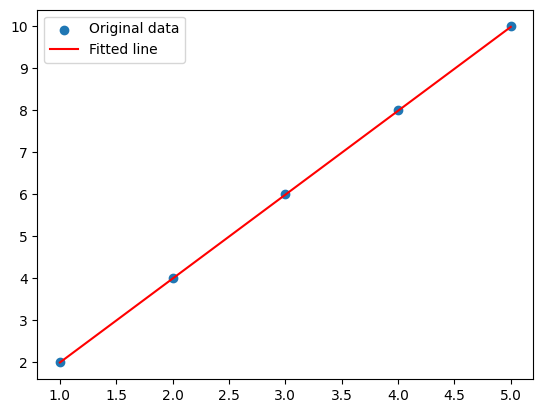

Epoch 30: Loss = 2.4260763893835247e-05
Weight after epoch 30: 1.998841643333435
Prediction after epoch 30: tensor([1.9988, 3.9977, 5.9965, 7.9954, 9.9942], grad_fn=<MulBackward0>)


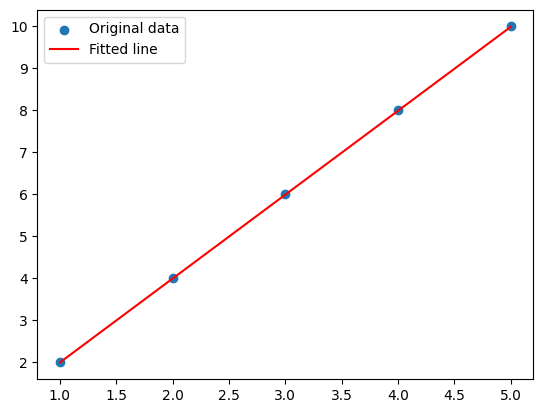

Epoch 31: Loss = 1.4759581063117366e-05
Weight after epoch 31: 1.9990965127944946
Prediction after epoch 31: tensor([1.9991, 3.9982, 5.9973, 7.9964, 9.9955], grad_fn=<MulBackward0>)


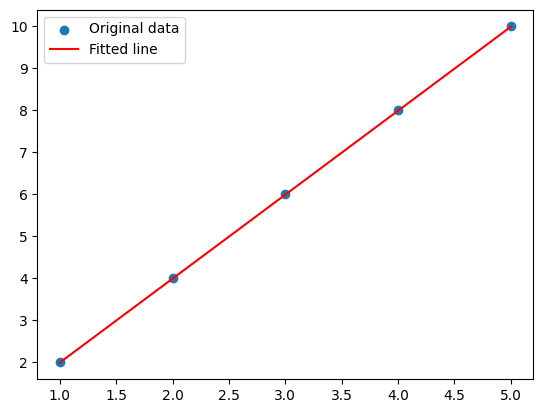

Epoch 32: Loss = 8.97926656762138e-06
Weight after epoch 32: 1.9992952346801758
Prediction after epoch 32: tensor([1.9993, 3.9986, 5.9979, 7.9972, 9.9965], grad_fn=<MulBackward0>)


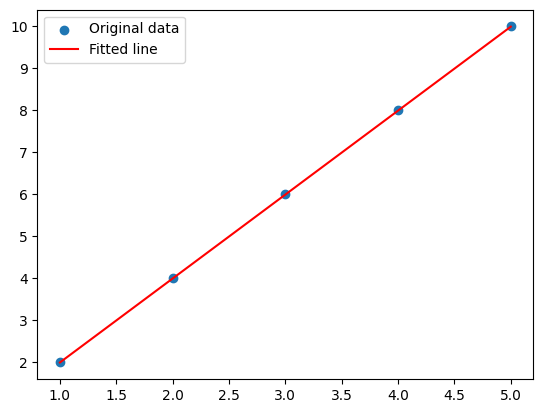

Epoch 33: Loss = 5.463635716296267e-06
Weight after epoch 33: 1.9994503259658813
Prediction after epoch 33: tensor([1.9995, 3.9989, 5.9984, 7.9978, 9.9973], grad_fn=<MulBackward0>)


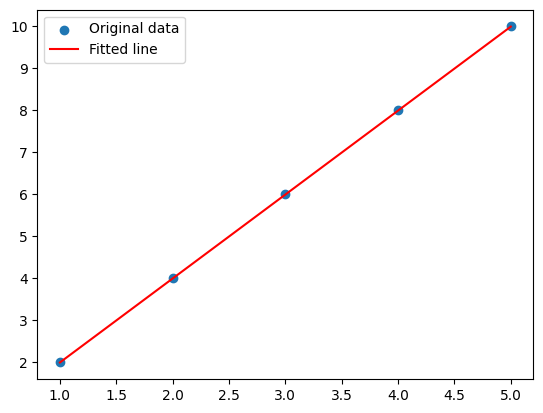

Epoch 34: Loss = 3.3236094623134704e-06
Weight after epoch 34: 1.9995712041854858
Prediction after epoch 34: tensor([1.9996, 3.9991, 5.9987, 7.9983, 9.9979], grad_fn=<MulBackward0>)


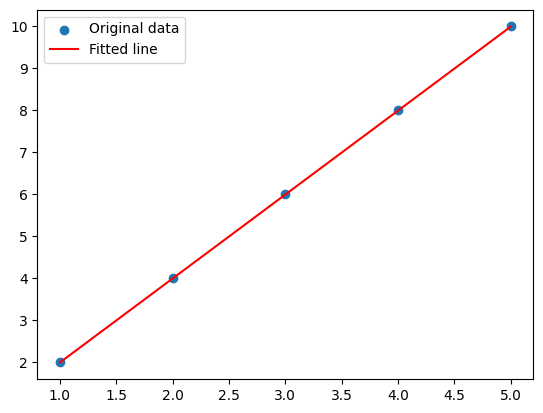

Epoch 35: Loss = 2.0224833860993385e-06
Weight after epoch 35: 1.9996654987335205
Prediction after epoch 35: tensor([1.9997, 3.9993, 5.9990, 7.9987, 9.9983], grad_fn=<MulBackward0>)


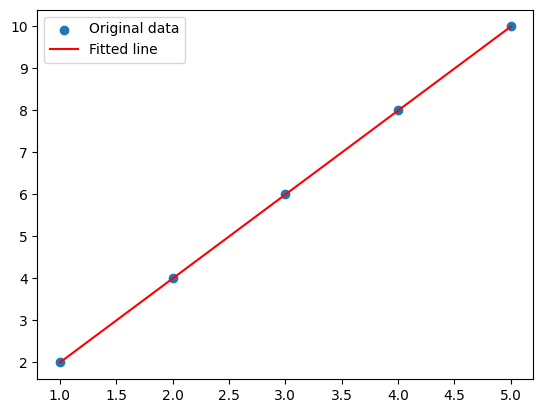

Epoch 36: Loss = 1.2308659051996074e-06
Weight after epoch 36: 1.9997390508651733
Prediction after epoch 36: tensor([1.9997, 3.9995, 5.9992, 7.9990, 9.9987], grad_fn=<MulBackward0>)


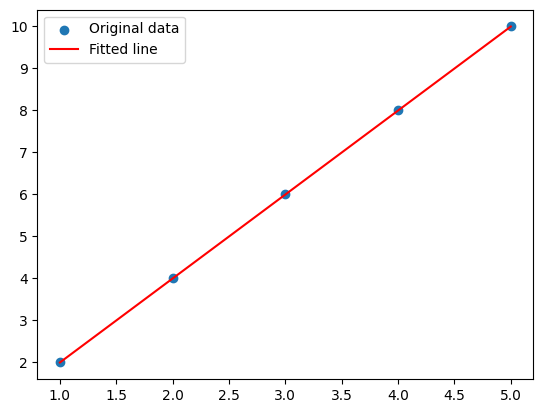

Epoch 37: Loss = 7.490140774280007e-07
Weight after epoch 37: 1.9997965097427368
Prediction after epoch 37: tensor([1.9998, 3.9996, 5.9994, 7.9992, 9.9990], grad_fn=<MulBackward0>)


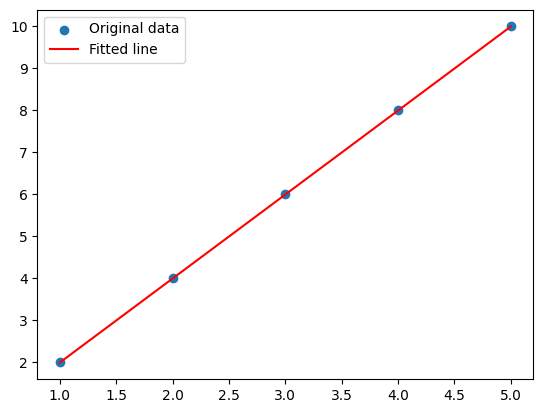

Epoch 38: Loss = 4.5551055904979876e-07
Weight after epoch 38: 1.999841332435608
Prediction after epoch 38: tensor([1.9998, 3.9997, 5.9995, 7.9994, 9.9992], grad_fn=<MulBackward0>)


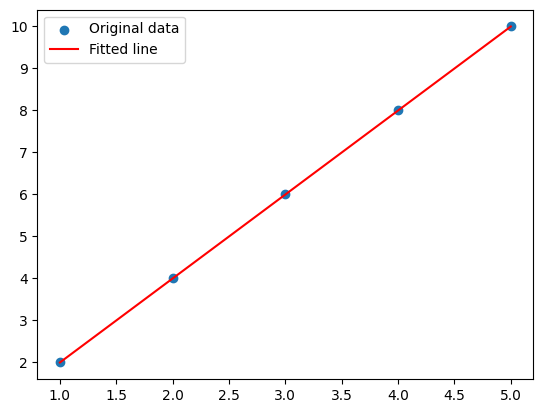

Epoch 39: Loss = 2.7694449045156944e-07
Weight after epoch 39: 1.9998762607574463
Prediction after epoch 39: tensor([1.9999, 3.9998, 5.9996, 7.9995, 9.9994], grad_fn=<MulBackward0>)


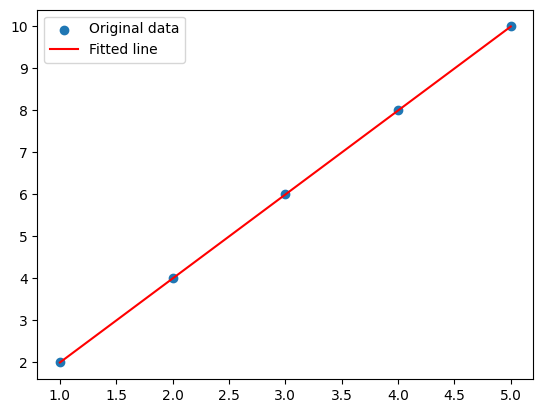

Epoch 40: Loss = 1.6844902006596385e-07
Weight after epoch 40: 1.9999034404754639
Prediction after epoch 40: tensor([1.9999, 3.9998, 5.9997, 7.9996, 9.9995], grad_fn=<MulBackward0>)


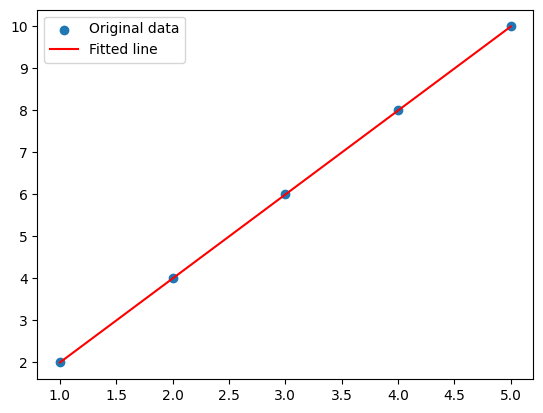

Epoch 41: Loss = 1.0254276361365555e-07
Weight after epoch 41: 1.999924659729004
Prediction after epoch 41: tensor([1.9999, 3.9998, 5.9998, 7.9997, 9.9996], grad_fn=<MulBackward0>)


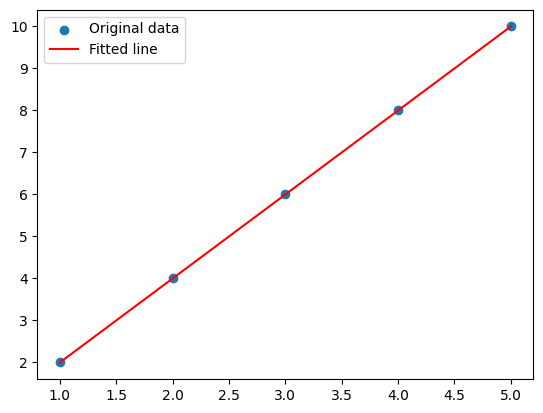

Epoch 42: Loss = 6.24377207714133e-08
Weight after epoch 42: 1.9999412298202515
Prediction after epoch 42: tensor([1.9999, 3.9999, 5.9998, 7.9998, 9.9997], grad_fn=<MulBackward0>)


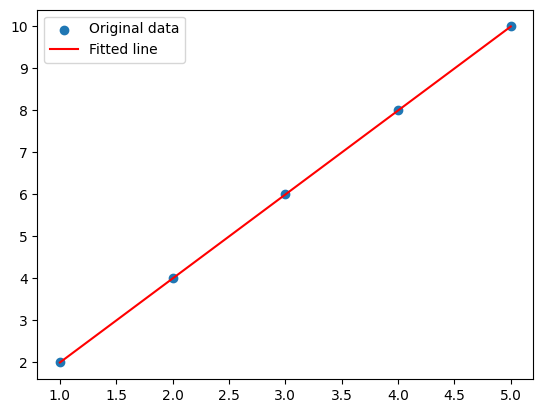

Epoch 43: Loss = 3.798767522766866e-08
Weight after epoch 43: 1.999954104423523
Prediction after epoch 43: tensor([2.0000, 3.9999, 5.9999, 7.9998, 9.9998], grad_fn=<MulBackward0>)


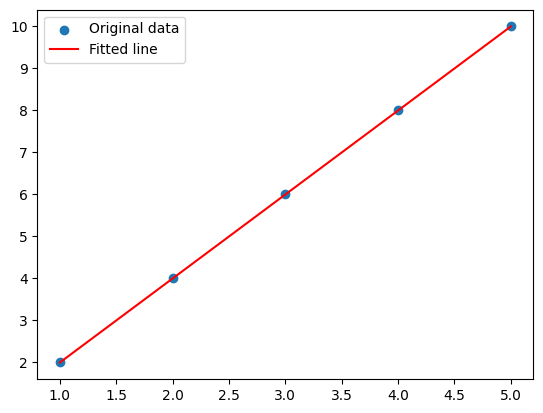

Epoch 44: Loss = 2.3209864252748957e-08
Weight after epoch 44: 1.9999642372131348
Prediction after epoch 44: tensor([2.0000, 3.9999, 5.9999, 7.9999, 9.9998], grad_fn=<MulBackward0>)


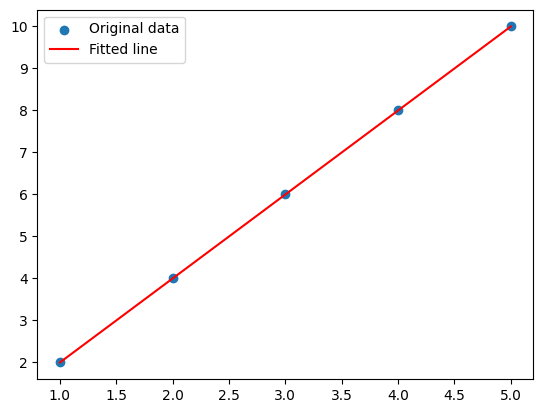

Epoch 45: Loss = 1.4102897516465873e-08
Weight after epoch 45: 1.9999721050262451
Prediction after epoch 45: tensor([2.0000, 3.9999, 5.9999, 7.9999, 9.9999], grad_fn=<MulBackward0>)


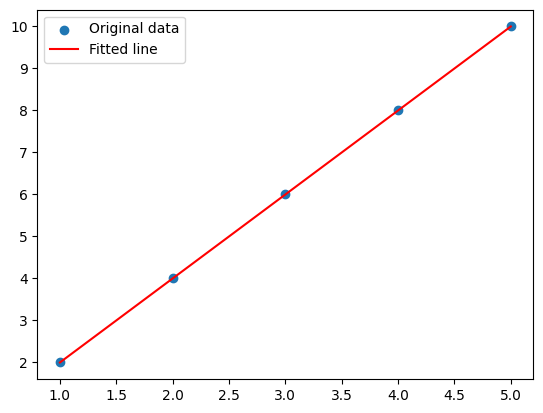

Epoch 46: Loss = 8.554127184368099e-09
Weight after epoch 46: 1.9999781847000122
Prediction after epoch 46: tensor([2.0000, 4.0000, 5.9999, 7.9999, 9.9999], grad_fn=<MulBackward0>)


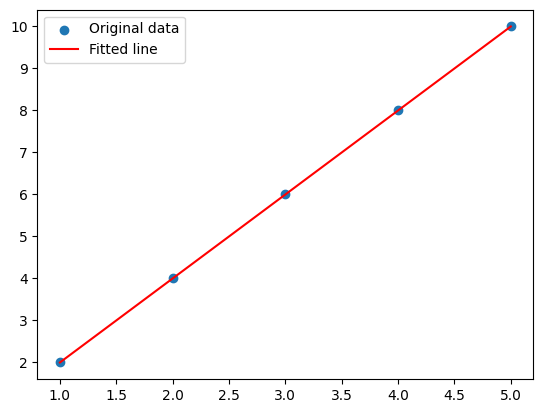

Epoch 47: Loss = 5.216284737485921e-09
Weight after epoch 47: 1.9999829530715942
Prediction after epoch 47: tensor([2.0000, 4.0000, 5.9999, 7.9999, 9.9999], grad_fn=<MulBackward0>)


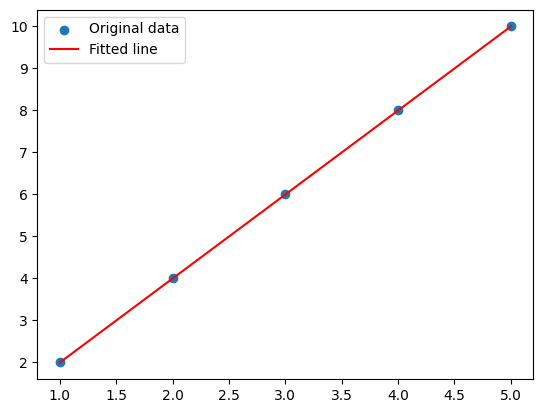

Epoch 48: Loss = 3.181972463295324e-09
Weight after epoch 48: 1.9999866485595703
Prediction after epoch 48: tensor([2.0000, 4.0000, 6.0000, 7.9999, 9.9999], grad_fn=<MulBackward0>)


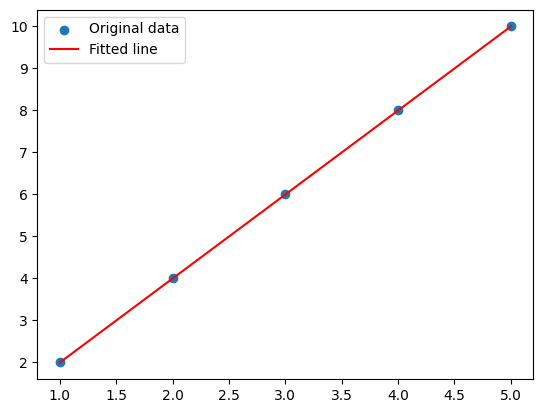

Epoch 49: Loss = 1.9608705770224333e-09
Weight after epoch 49: 1.999989628791809
Prediction after epoch 49: tensor([2.0000, 4.0000, 6.0000, 8.0000, 9.9999], grad_fn=<MulBackward0>)


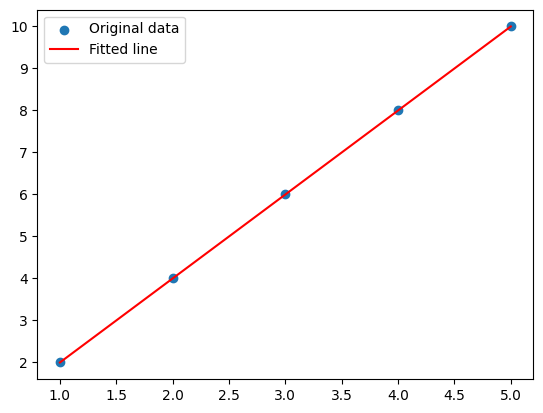

Epoch 50: Loss = 1.174308317253292e-09
Weight after epoch 50: 1.9999918937683105
Prediction after epoch 50: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


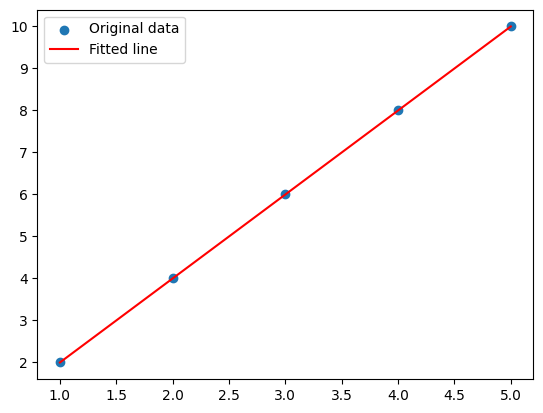

Epoch 51: Loss = 7.151356729018232e-10
Weight after epoch 51: 1.9999936819076538
Prediction after epoch 51: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


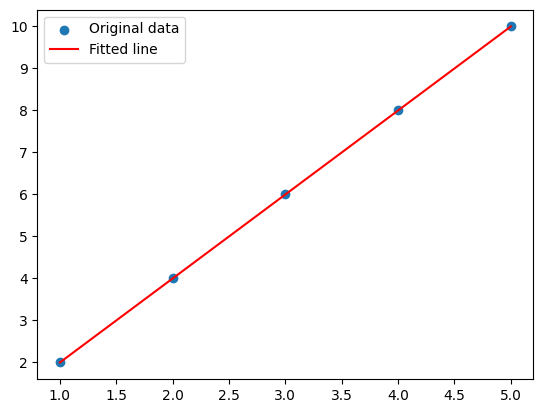

Epoch 52: Loss = 4.3850434394698823e-10
Weight after epoch 52: 1.9999951124191284
Prediction after epoch 52: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


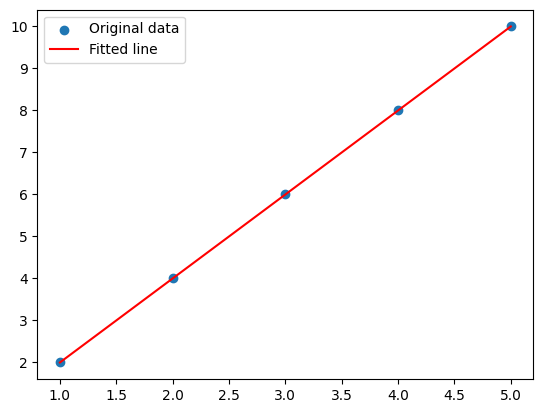

Epoch 53: Loss = 2.6699636945792804e-10
Weight after epoch 53: 1.9999961853027344
Prediction after epoch 53: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


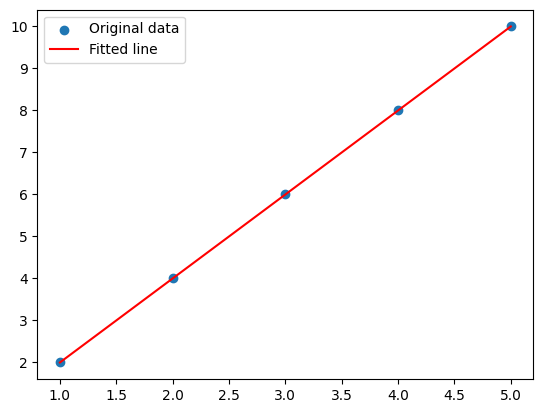

Epoch 54: Loss = 1.6007106751203537e-10
Weight after epoch 54: 1.9999970197677612
Prediction after epoch 54: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


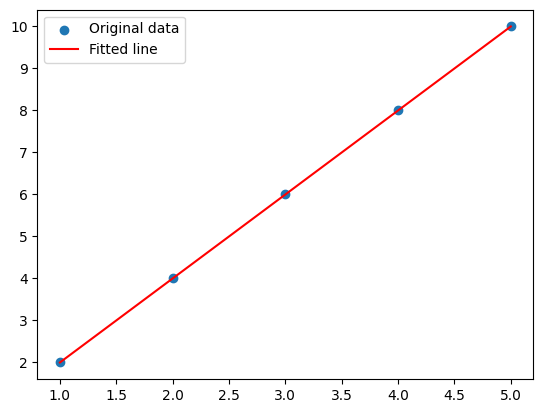

Epoch 55: Loss = 1.0028600172518054e-10
Weight after epoch 55: 1.9999977350234985
Prediction after epoch 55: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


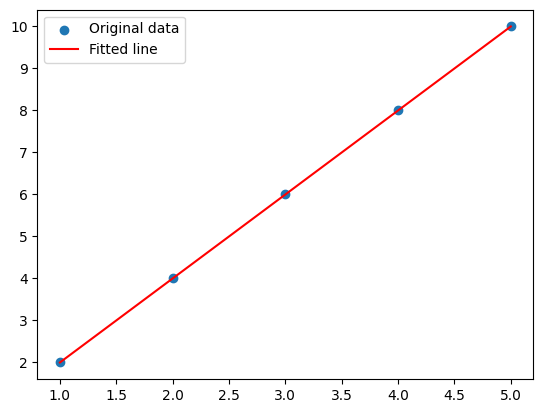

Epoch 56: Loss = 5.665299479540309e-11
Weight after epoch 56: 1.9999982118606567
Prediction after epoch 56: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


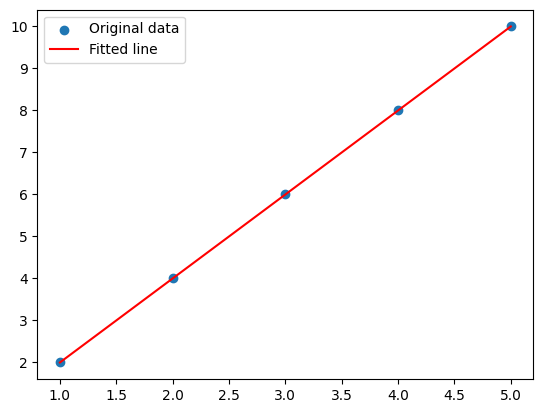

Epoch 57: Loss = 3.366551482031355e-11
Weight after epoch 57: 1.9999985694885254
Prediction after epoch 57: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


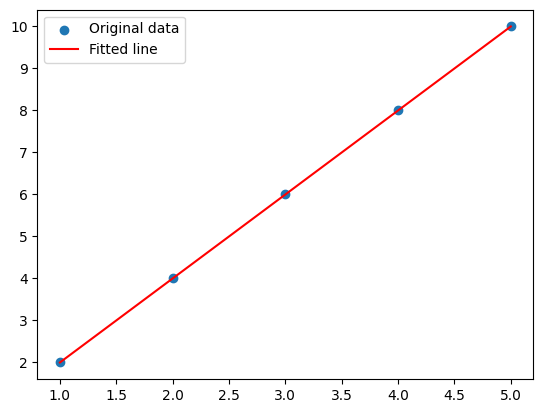

Epoch 58: Loss = 2.3919709962738622e-11
Weight after epoch 58: 1.999998927116394
Prediction after epoch 58: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


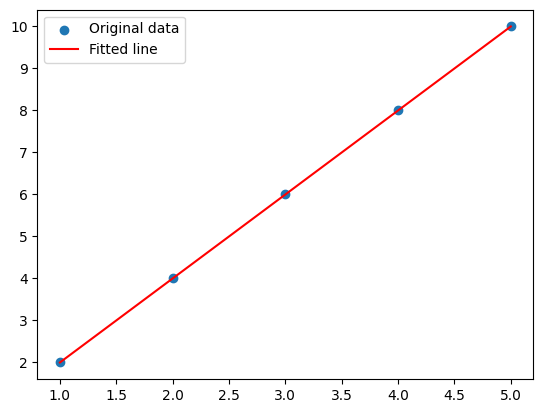

Epoch 59: Loss = 1.3611156472748132e-11
Weight after epoch 59: 1.9999991655349731
Prediction after epoch 59: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


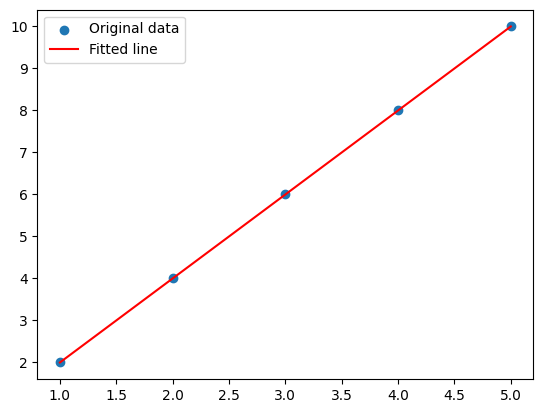

Epoch 60: Loss = 6.971845410014277e-12
Weight after epoch 60: 1.9999992847442627
Prediction after epoch 60: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


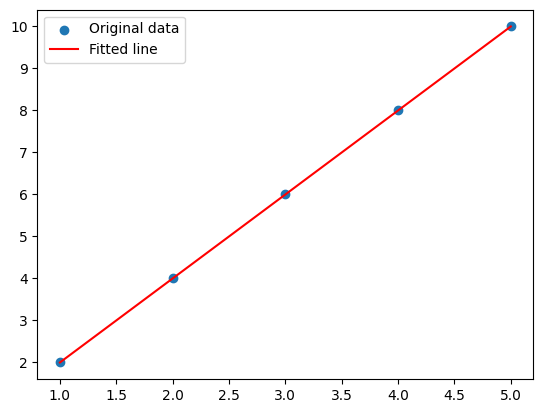

Epoch 61: Loss = 5.7866602135026035e-12
Weight after epoch 61: 1.9999994039535522
Prediction after epoch 61: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


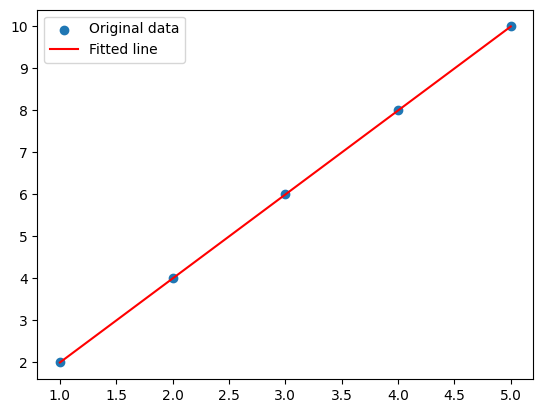

Epoch 62: Loss = 3.85682588296965e-12
Weight after epoch 62: 1.9999995231628418
Prediction after epoch 62: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


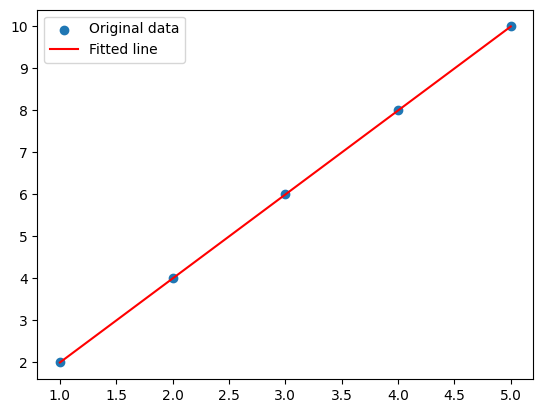

Epoch 63: Loss = 2.091837770709648e-12
Weight after epoch 63: 1.9999996423721313
Prediction after epoch 63: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


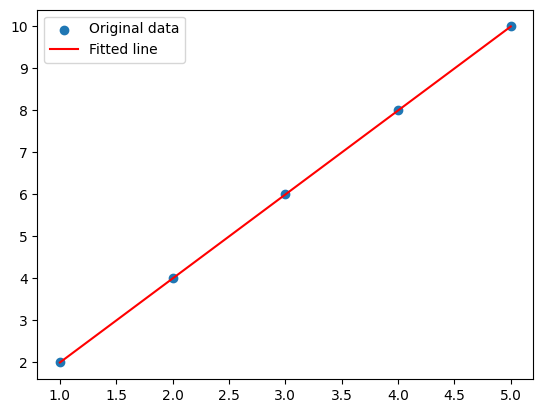

Epoch 64: Loss = 1.4466650533756509e-12
Weight after epoch 64: 1.999999761581421
Prediction after epoch 64: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


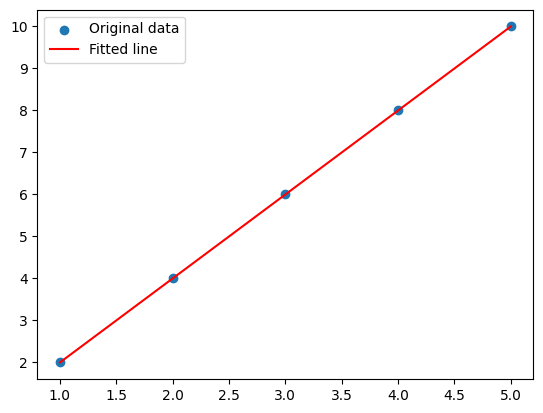

Epoch 65: Loss = 6.025402616086084e-13
Weight after epoch 65: 1.999999761581421
Prediction after epoch 65: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


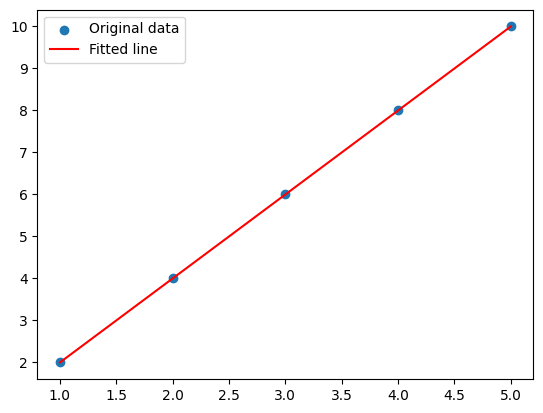

Epoch 66: Loss = 6.025402616086084e-13
Weight after epoch 66: 1.999999761581421
Prediction after epoch 66: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


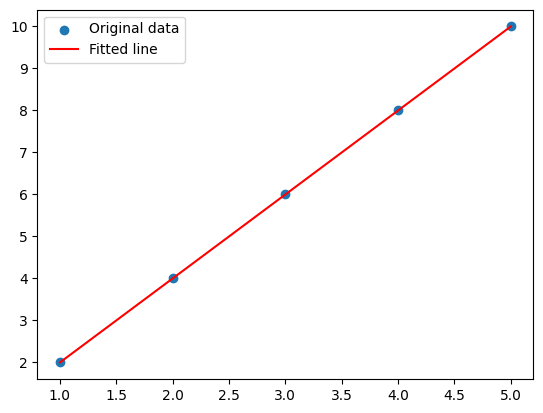

Epoch 67: Loss = 6.025402616086084e-13
Weight after epoch 67: 1.999999761581421
Prediction after epoch 67: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


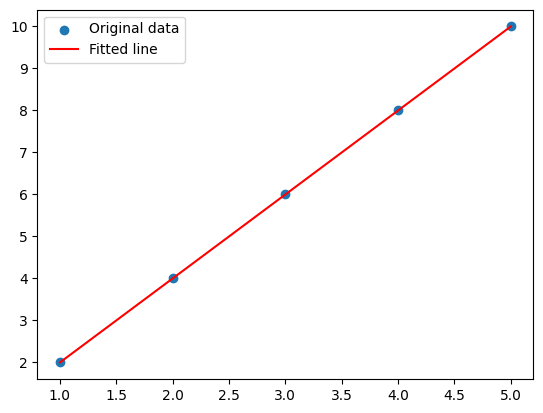

Epoch 68: Loss = 6.025402616086084e-13
Weight after epoch 68: 1.999999761581421
Prediction after epoch 68: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


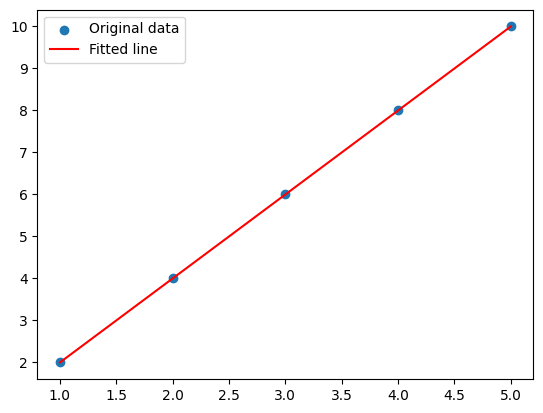

Epoch 69: Loss = 6.025402616086084e-13
Weight after epoch 69: 1.999999761581421
Prediction after epoch 69: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


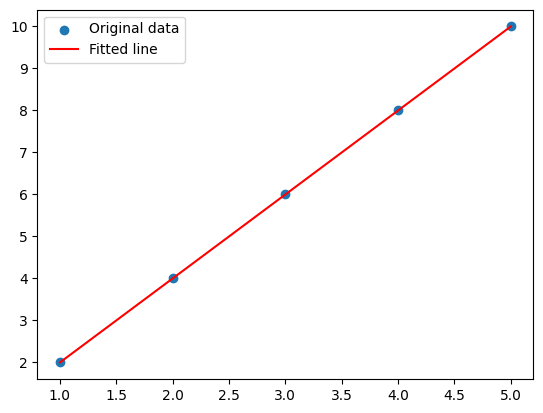

Epoch 70: Loss = 6.025402616086084e-13
Weight after epoch 70: 1.999999761581421
Prediction after epoch 70: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


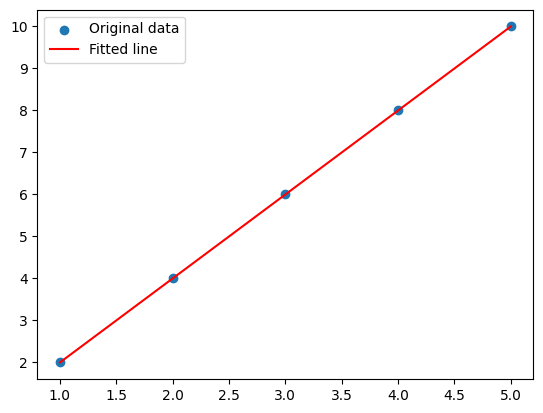

Epoch 71: Loss = 6.025402616086084e-13
Weight after epoch 71: 1.999999761581421
Prediction after epoch 71: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


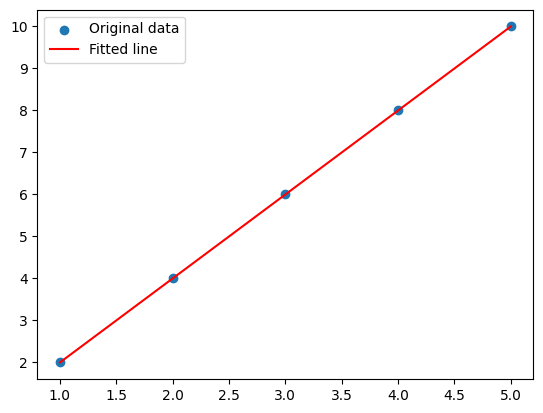

Epoch 72: Loss = 6.025402616086084e-13
Weight after epoch 72: 1.999999761581421
Prediction after epoch 72: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


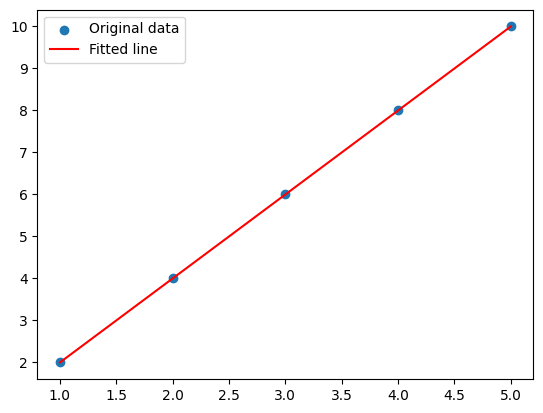

Epoch 73: Loss = 6.025402616086084e-13
Weight after epoch 73: 1.999999761581421
Prediction after epoch 73: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


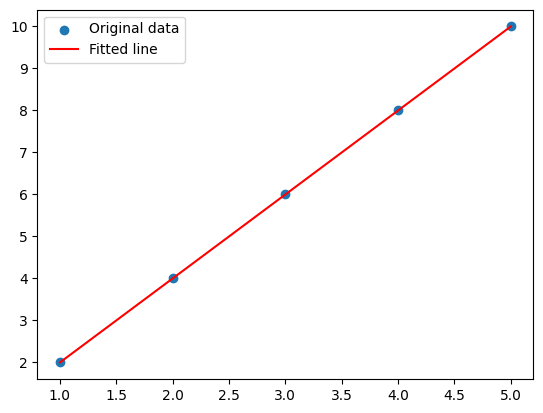

Epoch 74: Loss = 6.025402616086084e-13
Weight after epoch 74: 1.999999761581421
Prediction after epoch 74: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


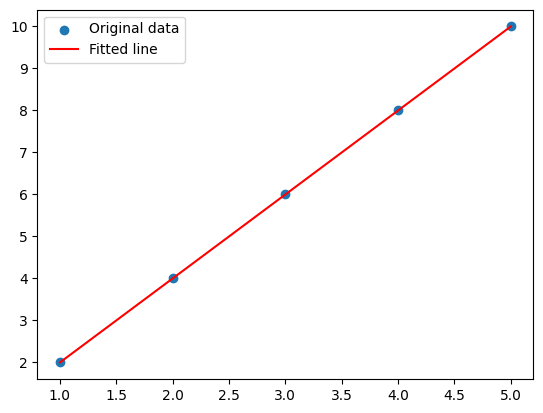

Epoch 75: Loss = 6.025402616086084e-13
Weight after epoch 75: 1.999999761581421
Prediction after epoch 75: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


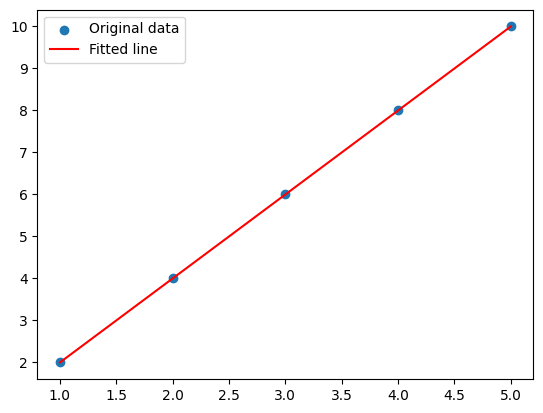

Epoch 76: Loss = 6.025402616086084e-13
Weight after epoch 76: 1.999999761581421
Prediction after epoch 76: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


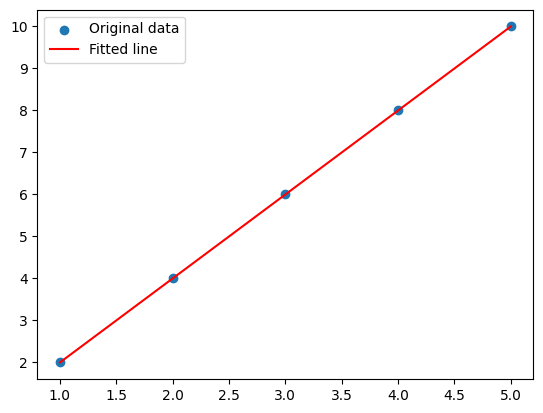

Epoch 77: Loss = 6.025402616086084e-13
Weight after epoch 77: 1.999999761581421
Prediction after epoch 77: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


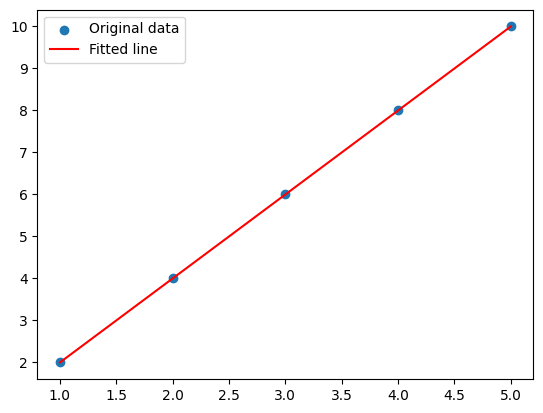

Epoch 78: Loss = 6.025402616086084e-13
Weight after epoch 78: 1.999999761581421
Prediction after epoch 78: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


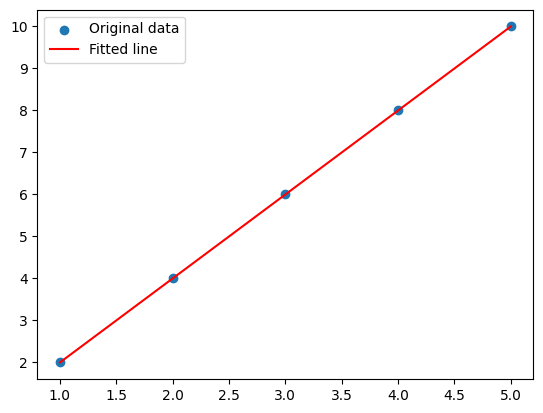

Epoch 79: Loss = 6.025402616086084e-13
Weight after epoch 79: 1.999999761581421
Prediction after epoch 79: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


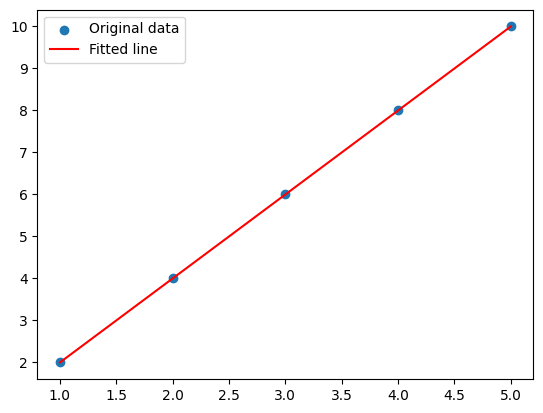

Epoch 80: Loss = 6.025402616086084e-13
Weight after epoch 80: 1.999999761581421
Prediction after epoch 80: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


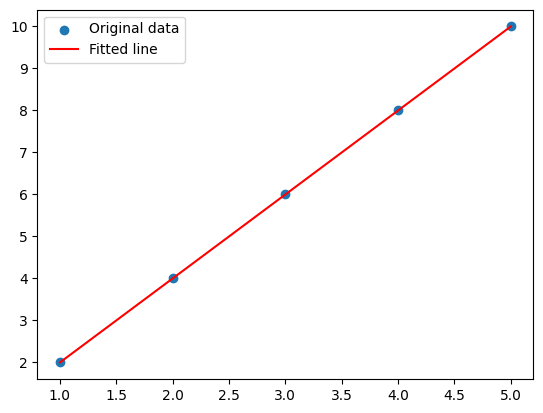

Epoch 81: Loss = 6.025402616086084e-13
Weight after epoch 81: 1.999999761581421
Prediction after epoch 81: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


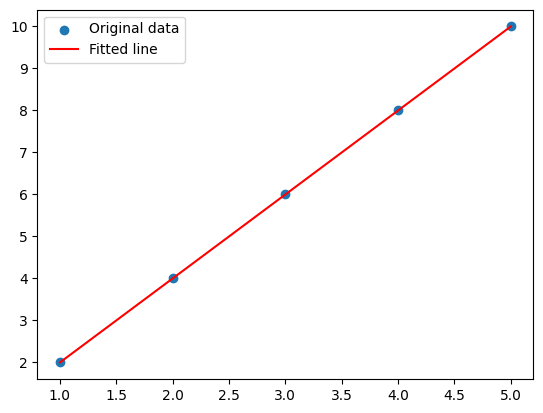

Epoch 82: Loss = 6.025402616086084e-13
Weight after epoch 82: 1.999999761581421
Prediction after epoch 82: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


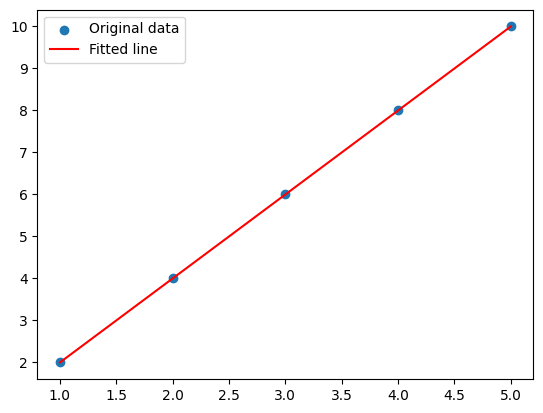

Epoch 83: Loss = 6.025402616086084e-13
Weight after epoch 83: 1.999999761581421
Prediction after epoch 83: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


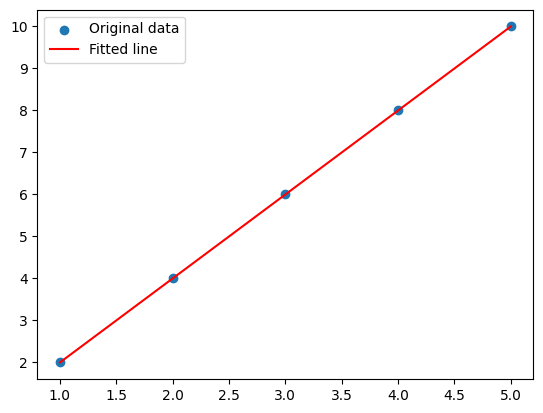

Epoch 84: Loss = 6.025402616086084e-13
Weight after epoch 84: 1.999999761581421
Prediction after epoch 84: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


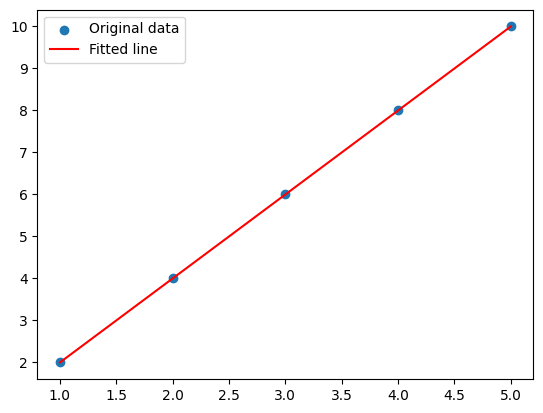

Epoch 85: Loss = 6.025402616086084e-13
Weight after epoch 85: 1.999999761581421
Prediction after epoch 85: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


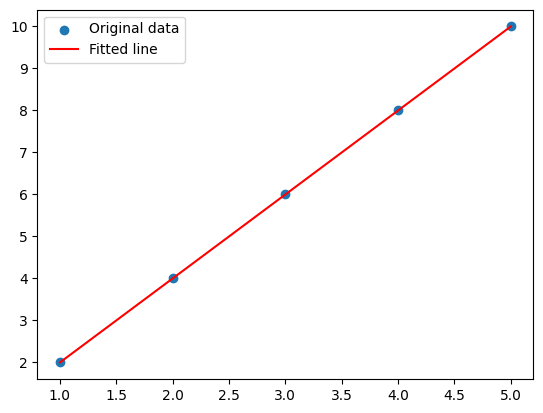

Epoch 86: Loss = 6.025402616086084e-13
Weight after epoch 86: 1.999999761581421
Prediction after epoch 86: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


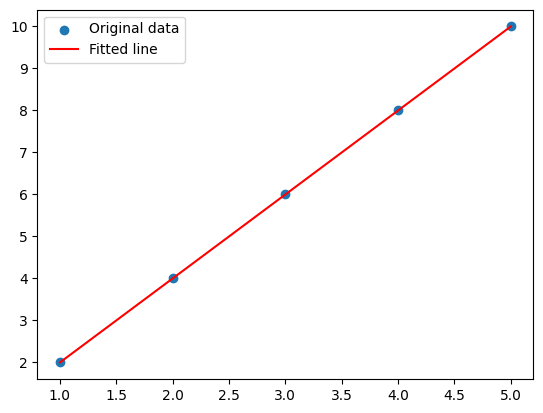

Epoch 87: Loss = 6.025402616086084e-13
Weight after epoch 87: 1.999999761581421
Prediction after epoch 87: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


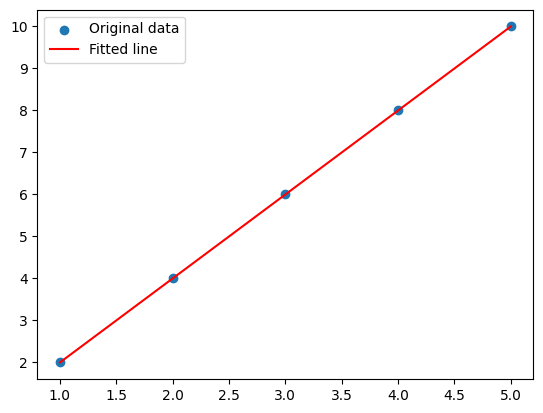

Epoch 88: Loss = 6.025402616086084e-13
Weight after epoch 88: 1.999999761581421
Prediction after epoch 88: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


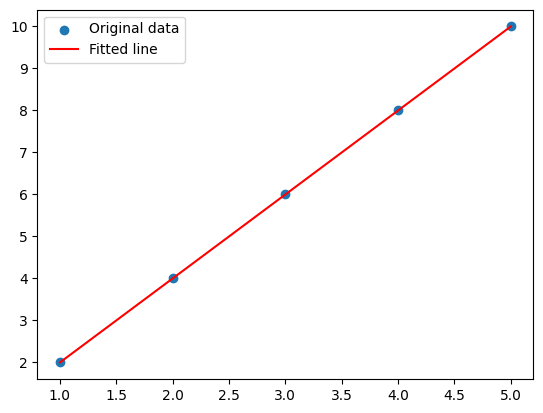

Epoch 89: Loss = 6.025402616086084e-13
Weight after epoch 89: 1.999999761581421
Prediction after epoch 89: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


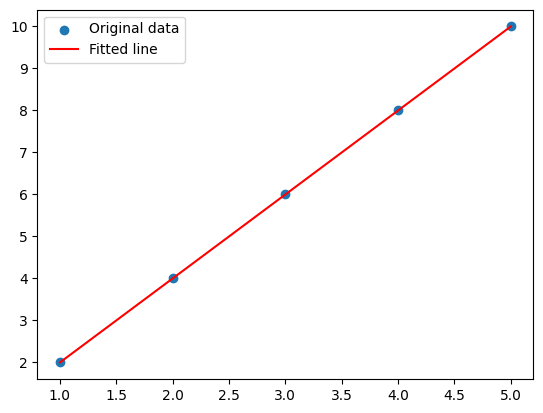

Epoch 90: Loss = 6.025402616086084e-13
Weight after epoch 90: 1.999999761581421
Prediction after epoch 90: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


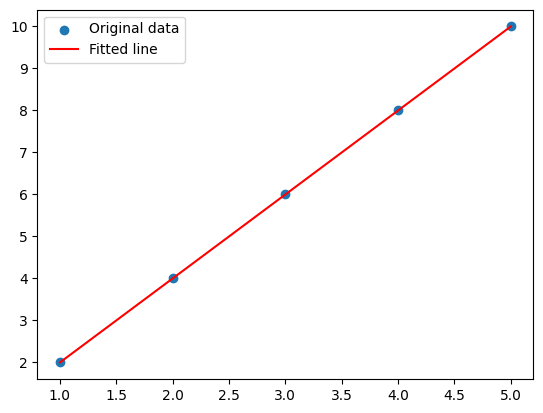

Epoch 91: Loss = 6.025402616086084e-13
Weight after epoch 91: 1.999999761581421
Prediction after epoch 91: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


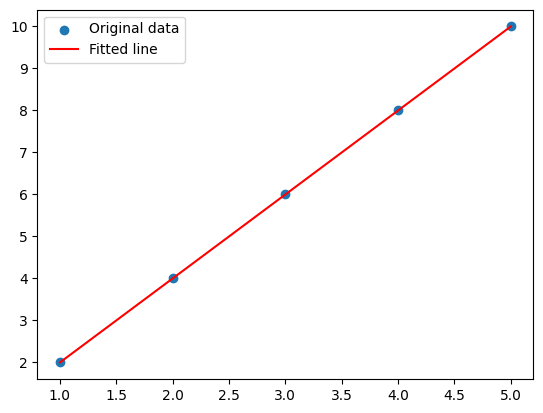

Epoch 92: Loss = 6.025402616086084e-13
Weight after epoch 92: 1.999999761581421
Prediction after epoch 92: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


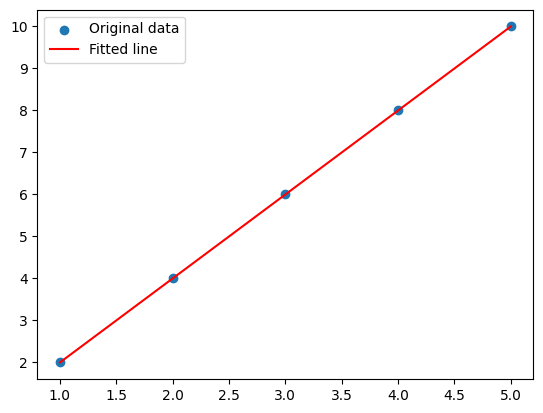

Epoch 93: Loss = 6.025402616086084e-13
Weight after epoch 93: 1.999999761581421
Prediction after epoch 93: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


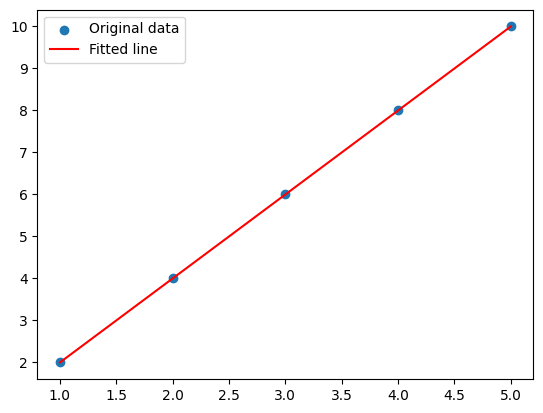

Epoch 94: Loss = 6.025402616086084e-13
Weight after epoch 94: 1.999999761581421
Prediction after epoch 94: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


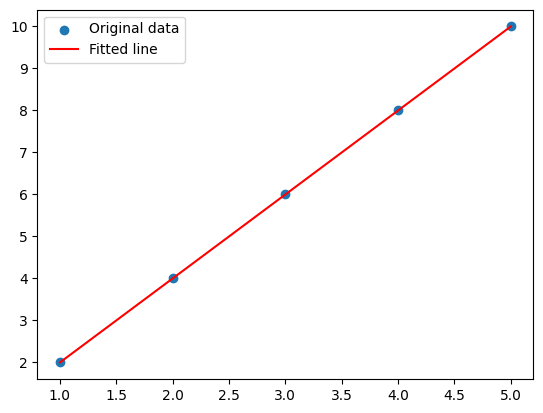

Epoch 95: Loss = 6.025402616086084e-13
Weight after epoch 95: 1.999999761581421
Prediction after epoch 95: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


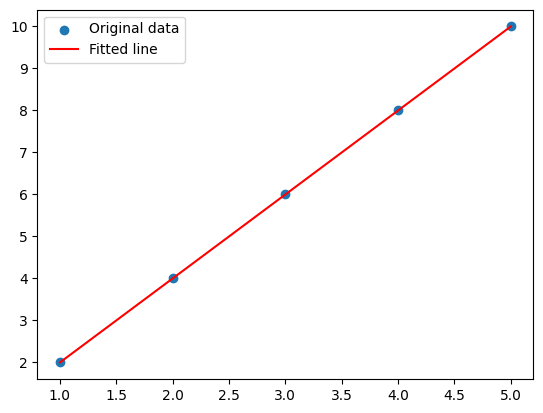

Epoch 96: Loss = 6.025402616086084e-13
Weight after epoch 96: 1.999999761581421
Prediction after epoch 96: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


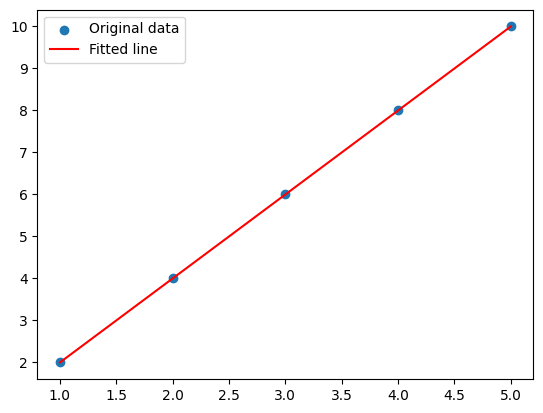

Epoch 97: Loss = 6.025402616086084e-13
Weight after epoch 97: 1.999999761581421
Prediction after epoch 97: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


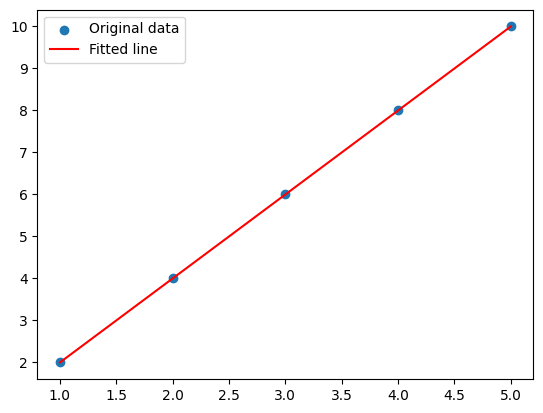

Epoch 98: Loss = 6.025402616086084e-13
Weight after epoch 98: 1.999999761581421
Prediction after epoch 98: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


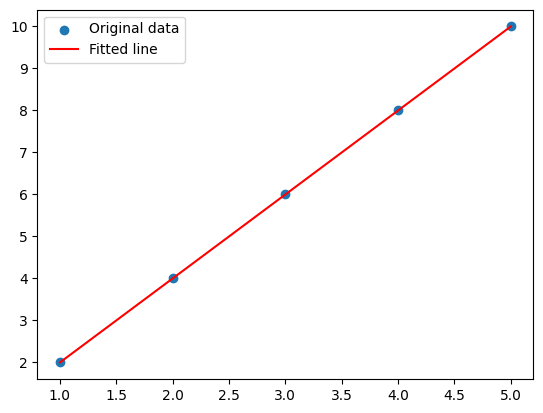

Epoch 99: Loss = 6.025402616086084e-13
Weight after epoch 99: 1.999999761581421
Prediction after epoch 99: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


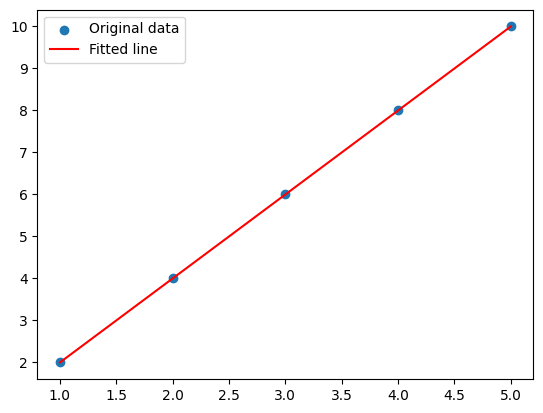

Epoch 100: Loss = 6.025402616086084e-13
Weight after epoch 100: 1.999999761581421
Prediction after epoch 100: tensor([ 2.0000,  4.0000,  6.0000,  8.0000, 10.0000], grad_fn=<MulBackward0>)


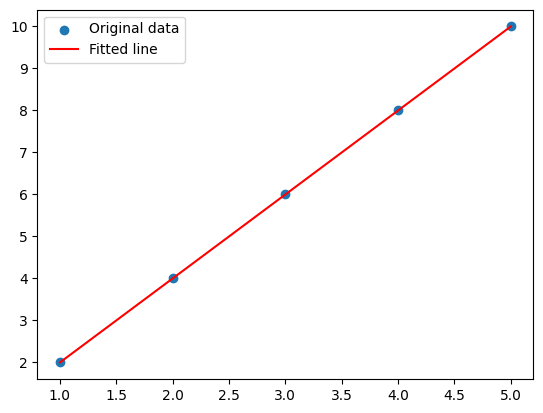

In [3]:
# DESIGN MODEL (INPUT , OUTPUT SIZE , FD PASS)
# CONSTRUCT LOSS OPTIMISER
# TRAINING LOOP
# - FORWARD PASS COMPUTE PREDICTION
# - BACKWARD PASS GRADIENTS
# - UPDATE WEIGHTS

#  THIS TIME NO MANUAL GRADIENT BY OPTIM AND BACKWARD
import torch
import torch.nn as nn


X = torch.tensor([1,2,3,4,5],dtype = torch.float32)
Y = 2*X
w = torch.tensor(0.0, dtype = torch.float32 , requires_grad = True)
def forward(X) :
    return w*X
print(f'Prediction before training: {forward(X)}')
lr = 0.01
n_iters = 100
loss = nn.MSELoss()
optimiser = torch.optim.SGD([w], lr=lr)

for epoch in range(n_iters):
    # Forward pass
    Y_pred = forward(X)
    l = loss(Y_pred, Y)
    print(f'Epoch {epoch+1}: Loss = {l.item()}')

    # Backward pass
    l.backward()
    optimiser.step()
    optimiser.zero_grad()
    # Print the weight after each epoch
    print(f'Weight after epoch {epoch+1}: {w.item()}')
    print(f'Prediction after epoch {epoch+1}: {forward(X)}')
    # PLOT
    plt.scatter(X, Y, label='Original data')
    plt.plot(X, Y_pred.detach(), label='Fitted line', color='red')
    plt.legend()
    plt.show()


Prediction before training:  [[0.9733702]
 [1.9154507]
 [2.857531 ]
 [3.7996116]
 [4.741692 ]]
Epoch 0: Loss = 12.113497734069824
  weight: [[1.1729454]]
  bias: [0.09413908]


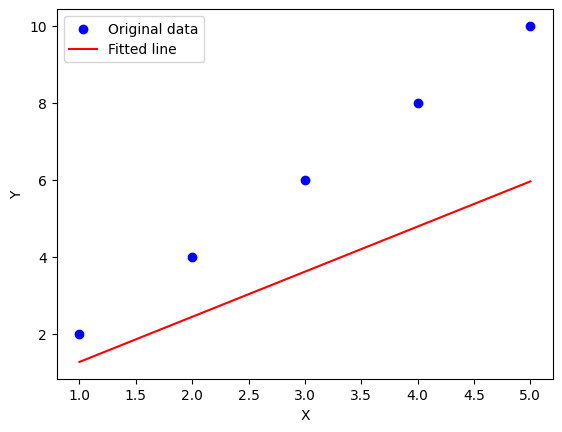

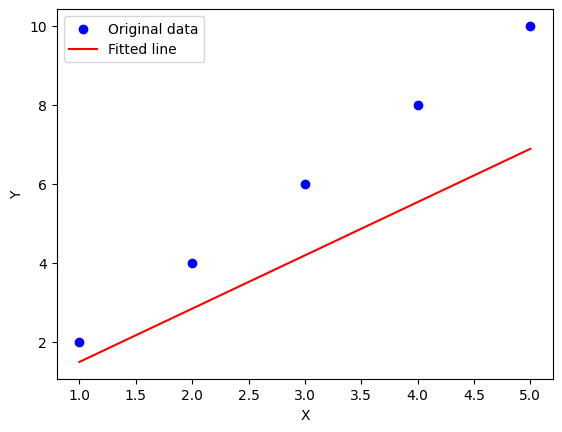

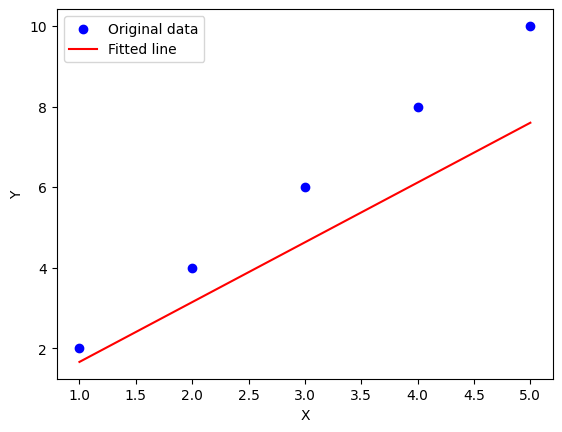

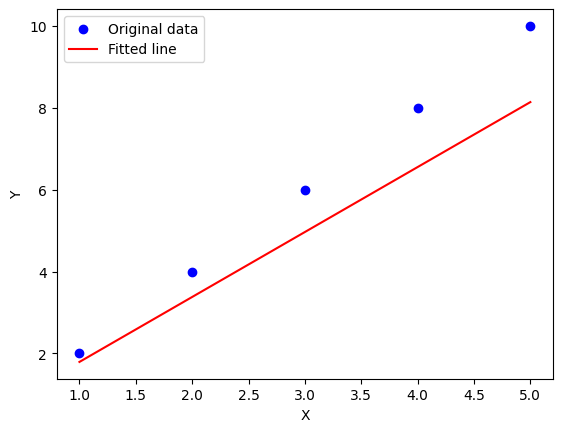

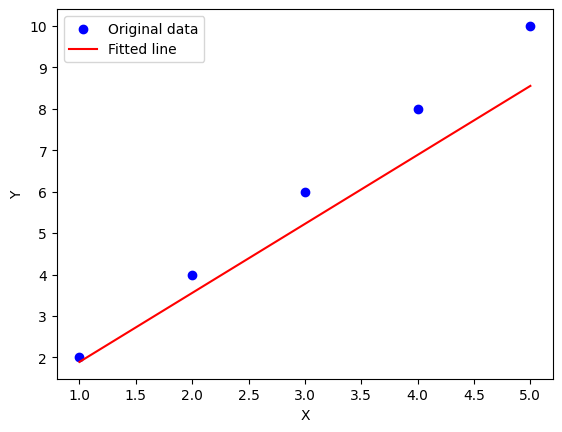

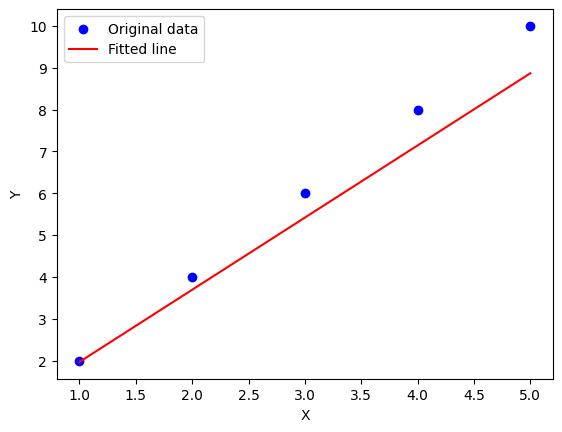

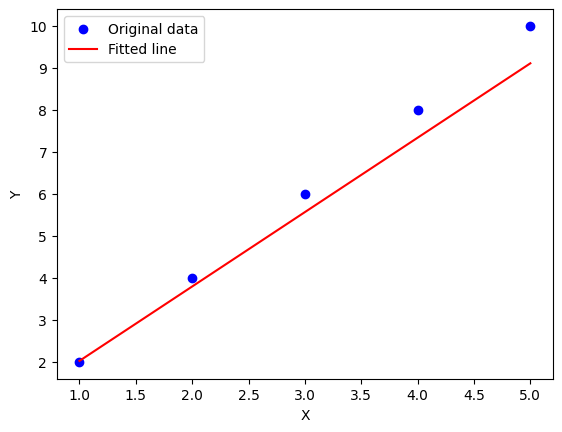

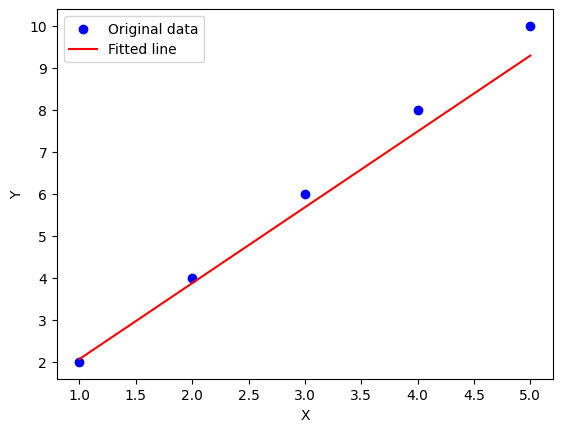

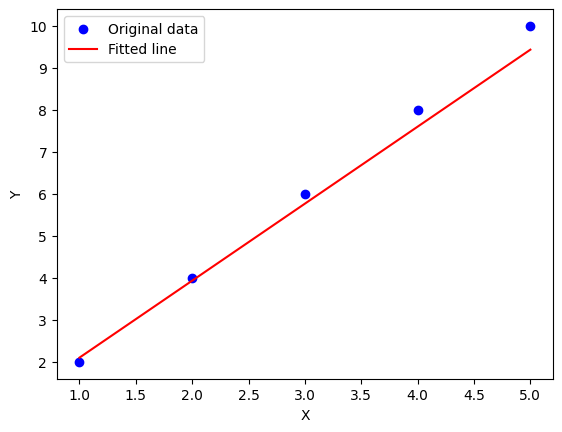

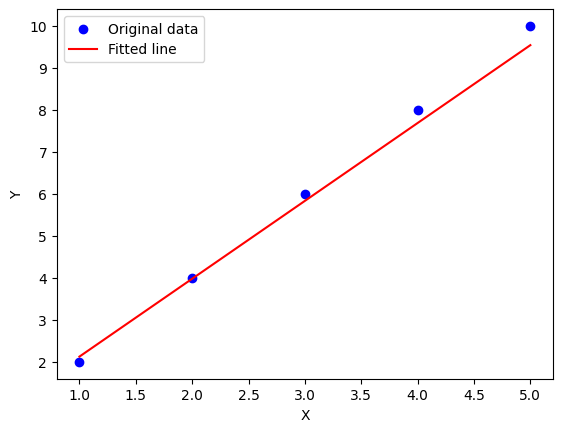

Epoch 10: Loss = 0.07007144391536713
  weight: [[1.8696256]]
  bias: [0.27634513]


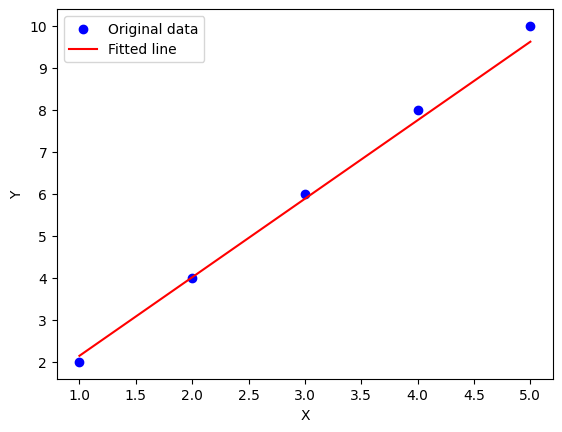

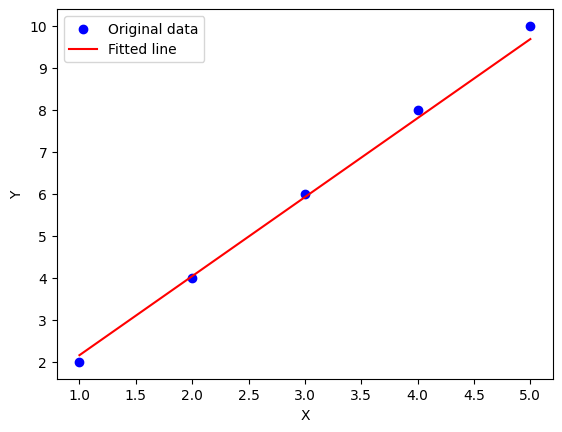

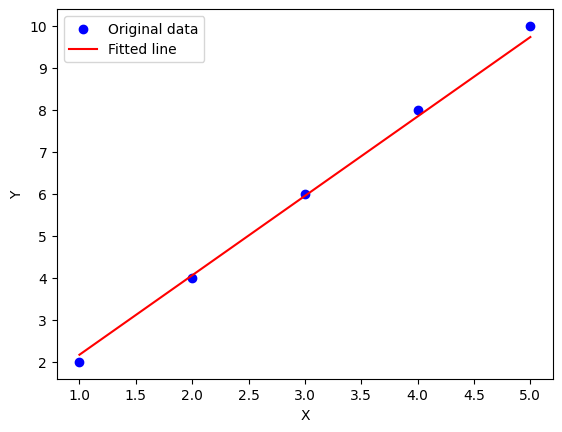

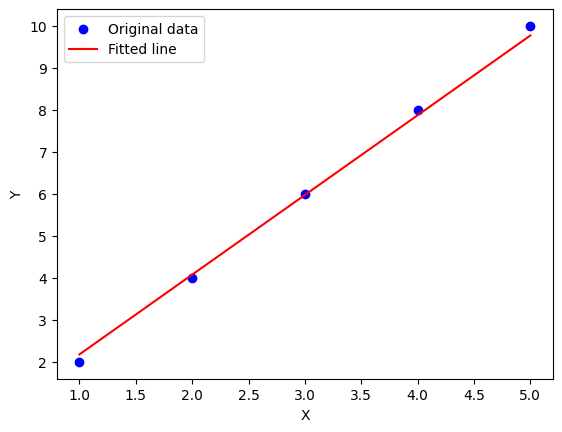

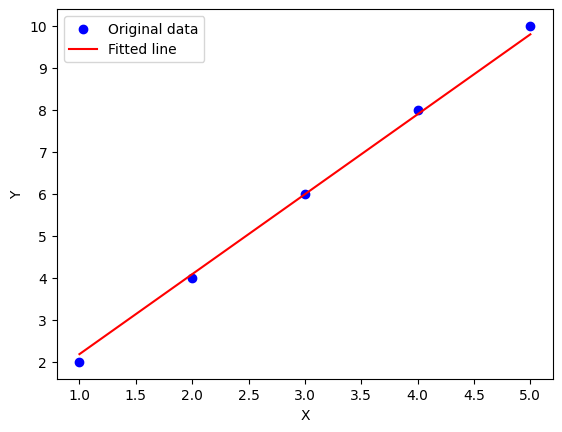

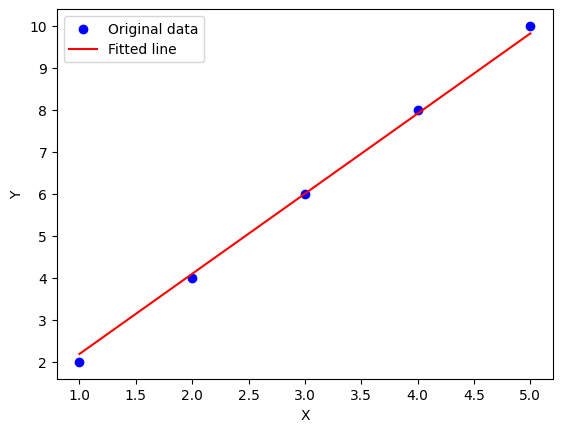

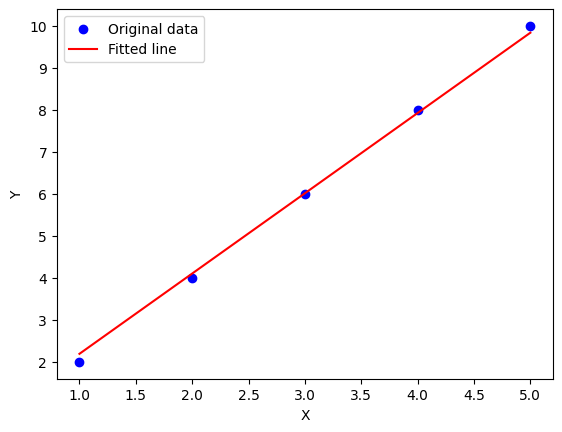

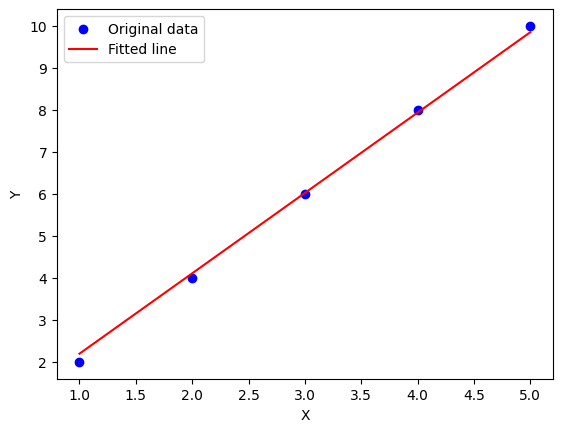

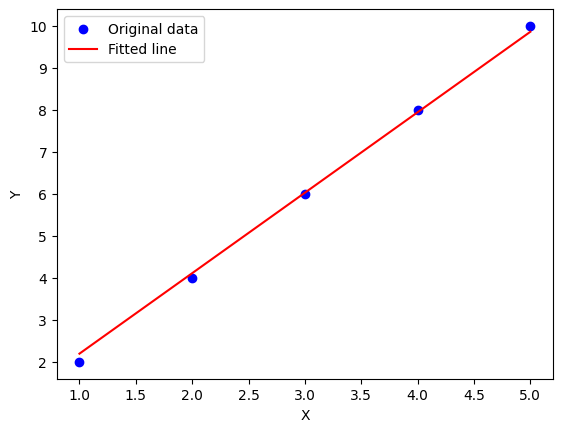

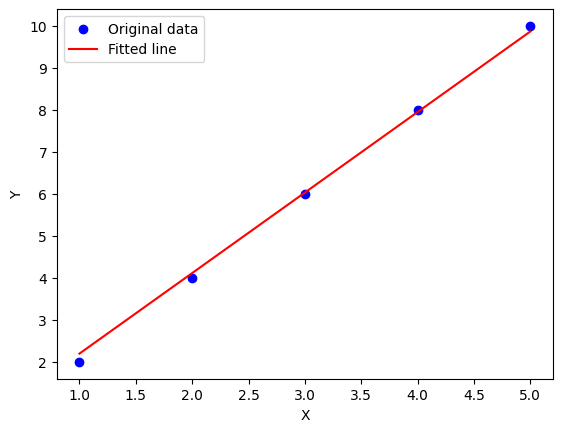

Epoch 20: Loss = 0.014668365009129047
  weight: [[1.9189377]]
  bias: [0.2795991]


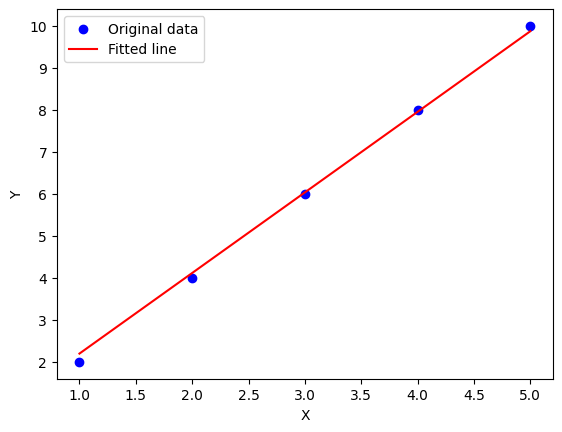

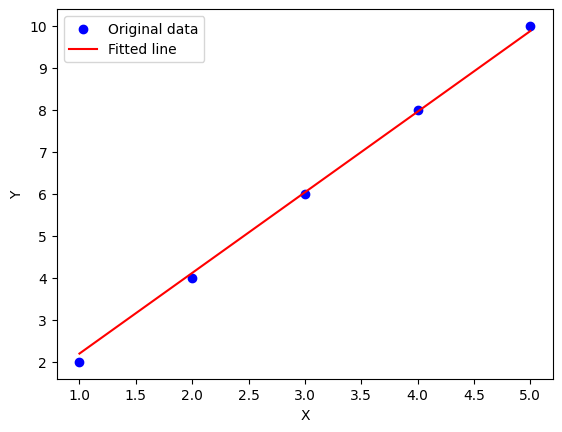

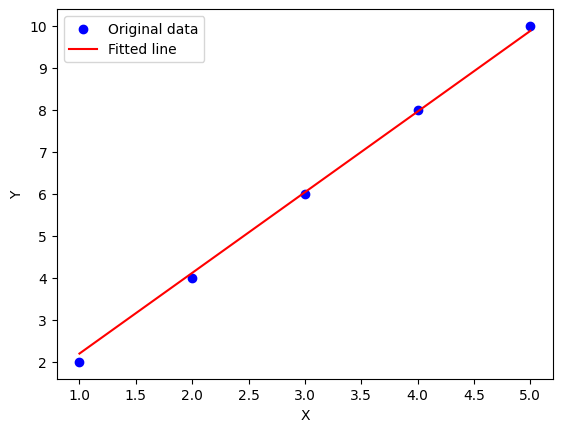

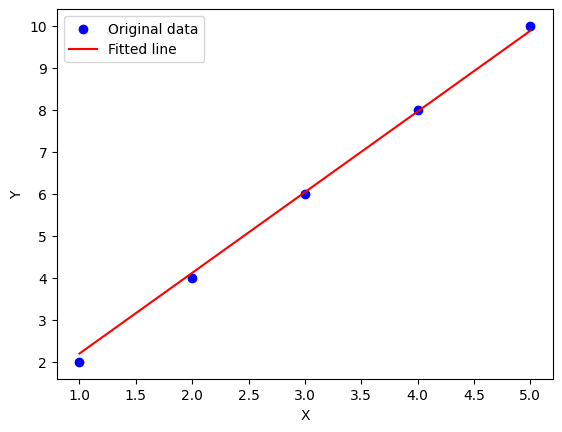

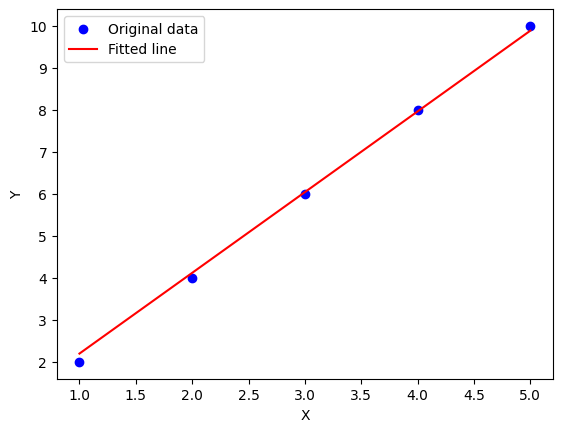

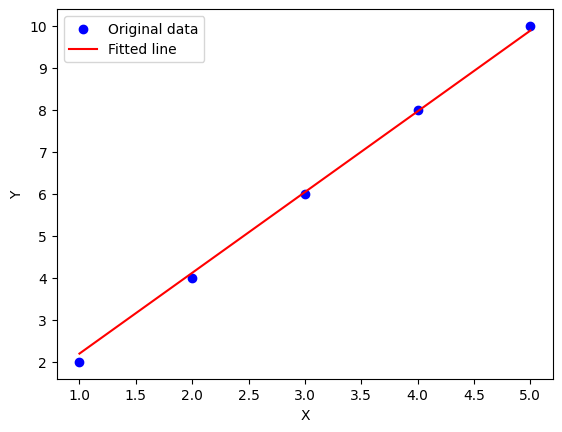

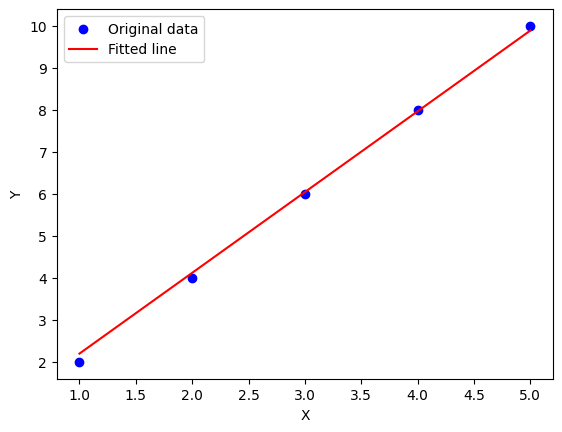

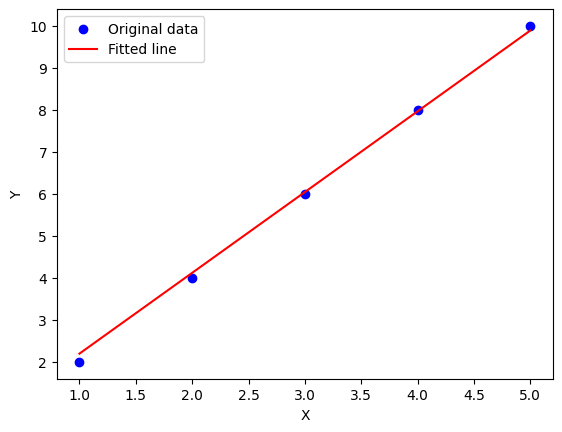

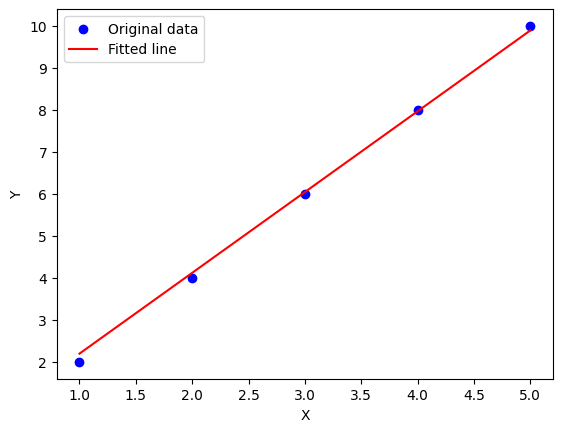

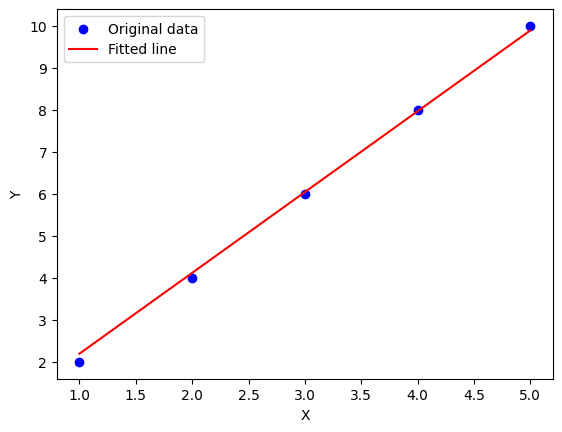

Epoch 30: Loss = 0.013478214852511883
  weight: [[1.9246594]]
  bias: [0.27112567]


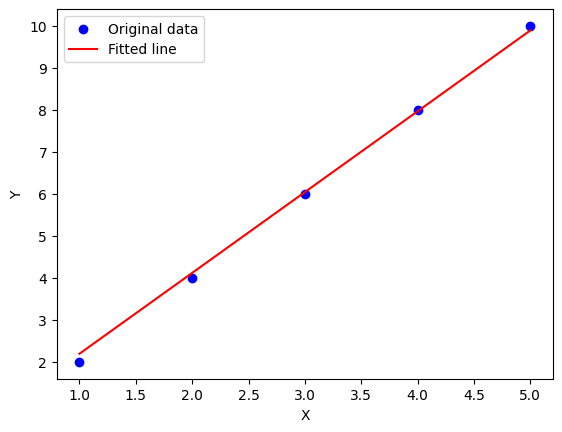

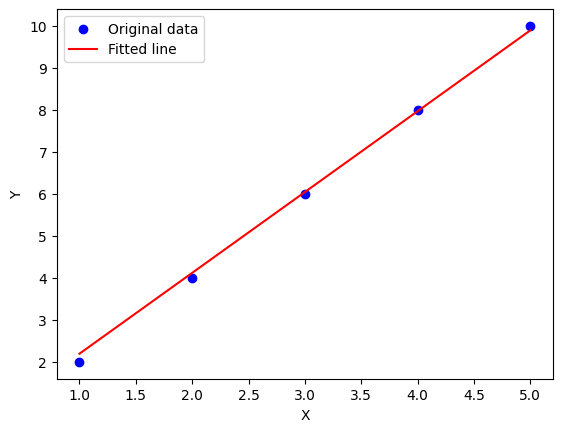

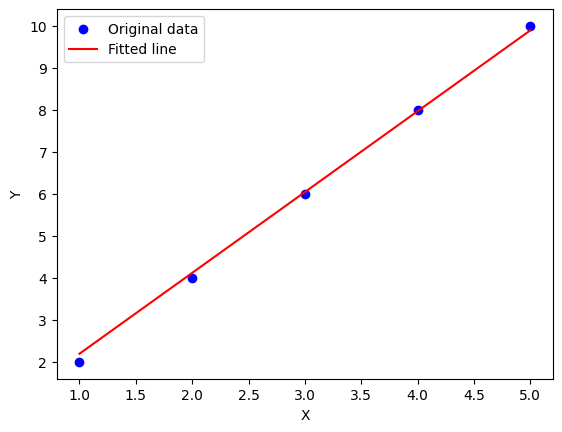

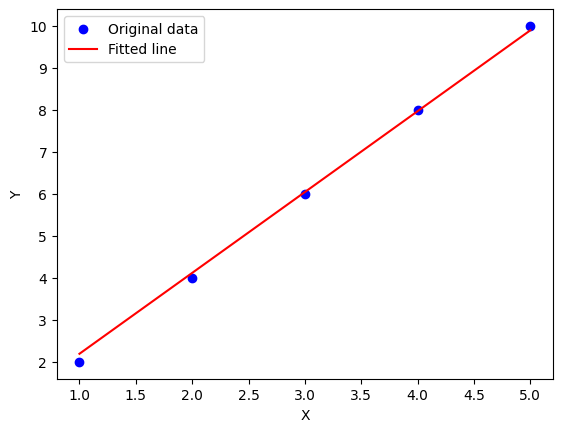

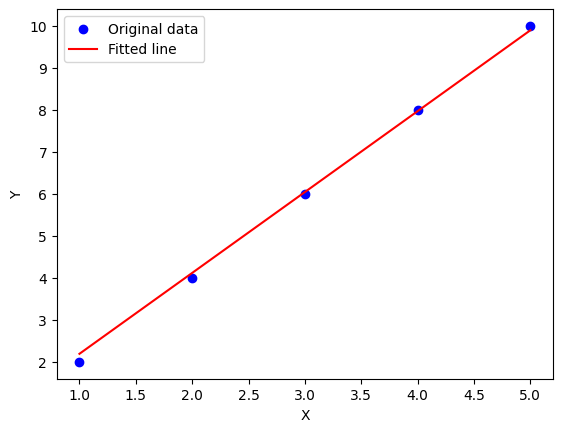

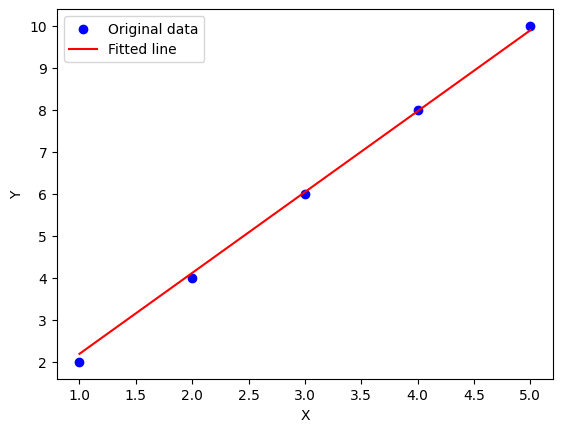

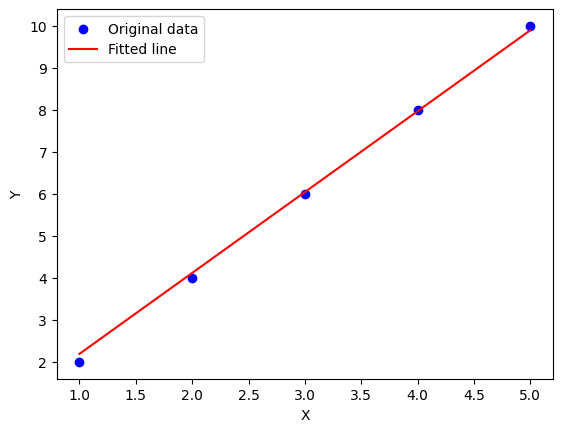

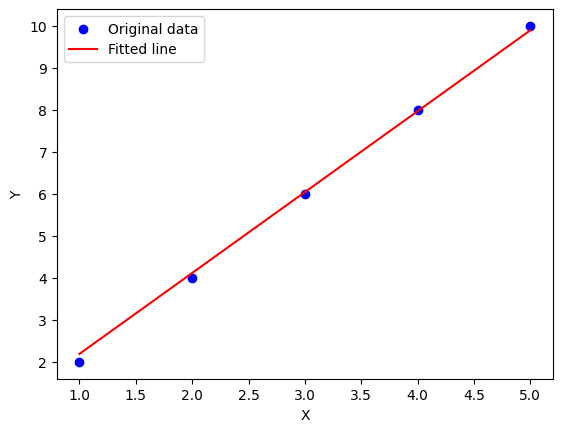

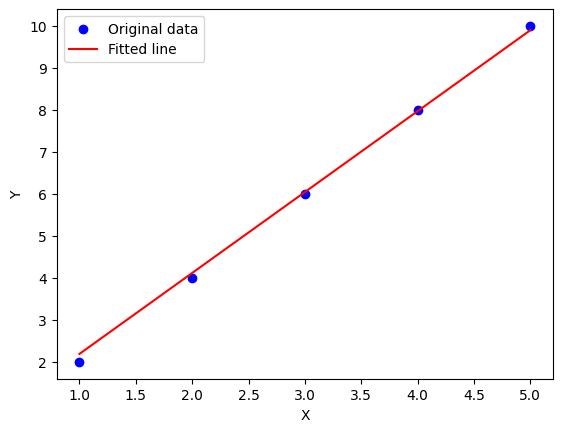

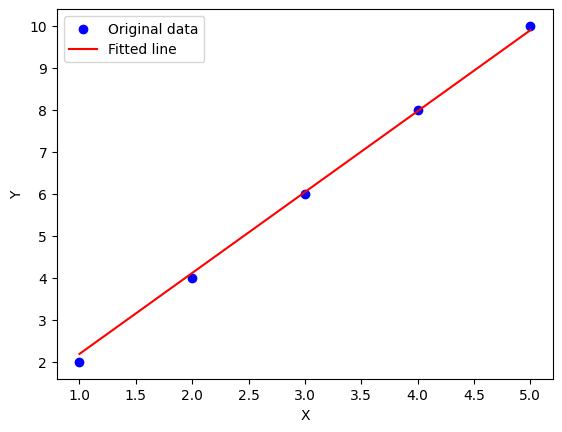

Epoch 40: Loss = 0.012594478204846382
  weight: [[1.9273713]]
  bias: [0.2621535]


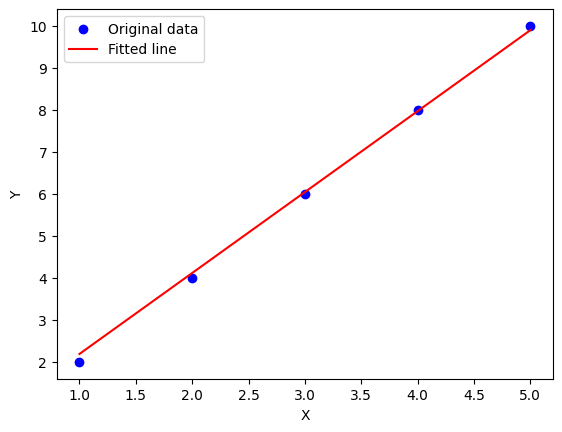

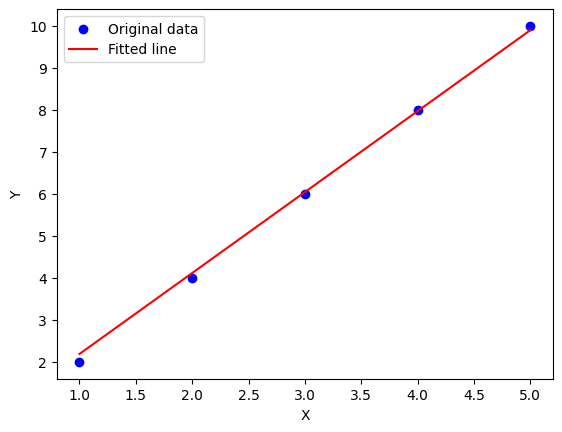

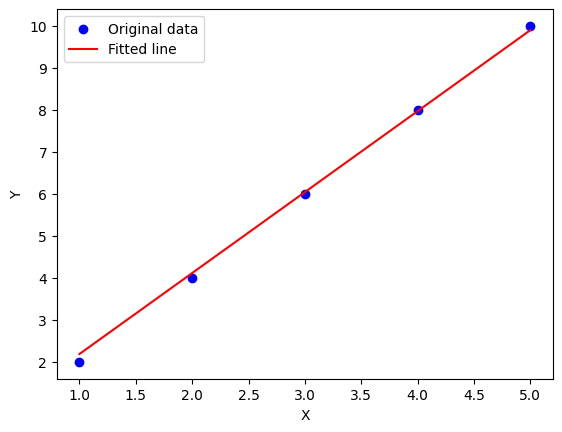

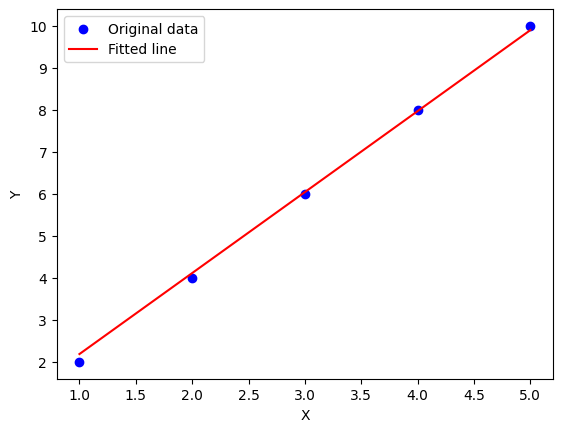

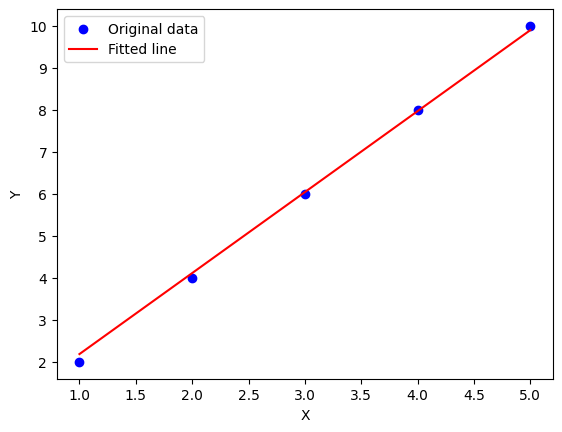

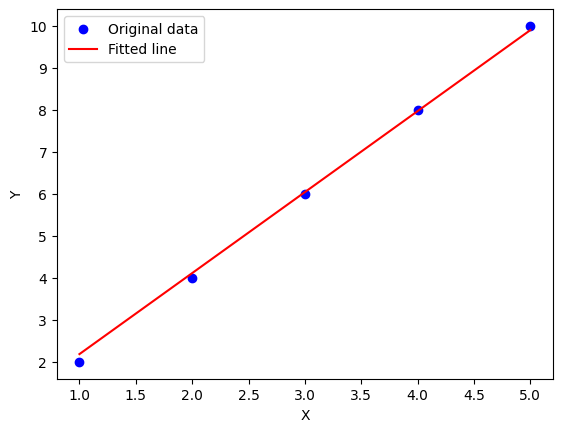

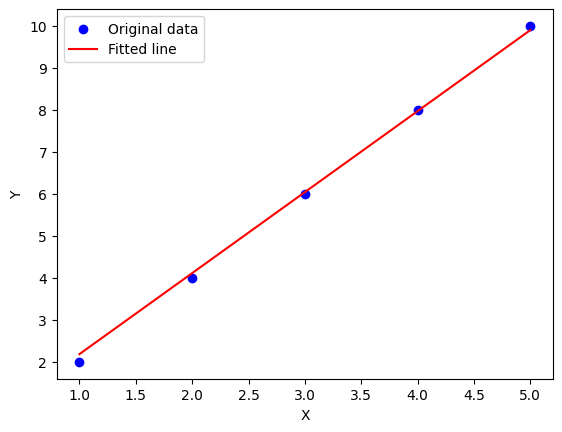

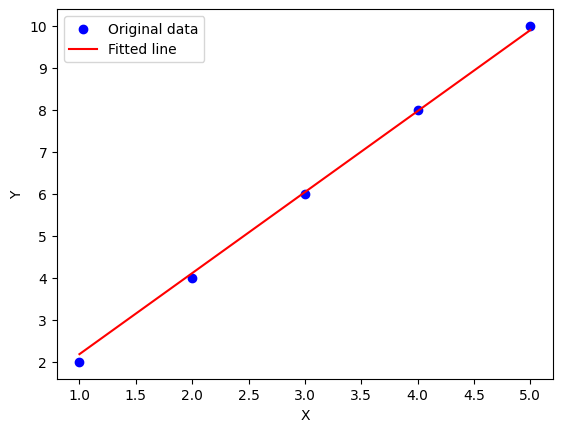

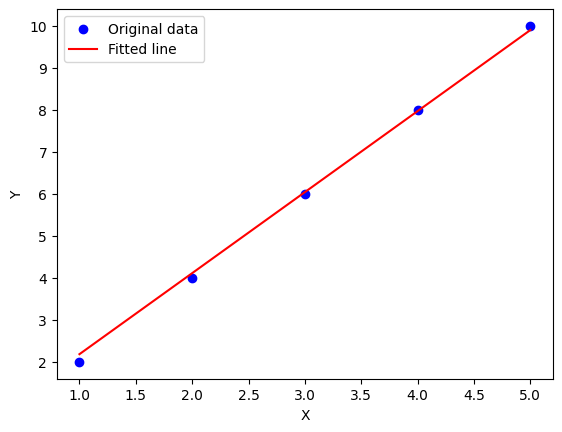

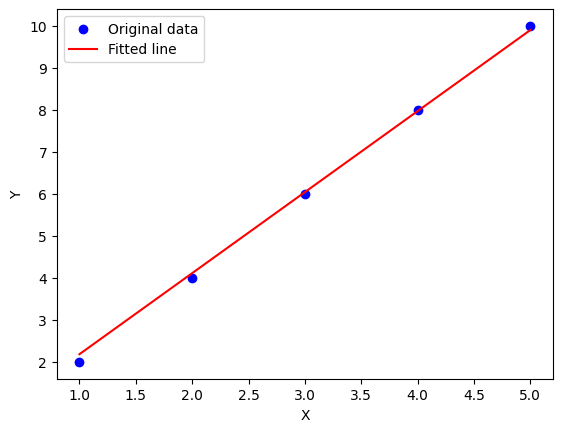

In [4]:
# DESIGN MODEL (INPUT , OUTPUT SIZE , FD PASS)
# CONSTRUCT LOSS OPTIMISER
# TRAINING LOOP
# - FORWARD PASS COMPUTE PREDICTION
# - BACKWARD PASS GRADIENTS
# - UPDATE WEIGHTS

# NO MANUAL FD , NO MANUAL LOSS , NO MANUAL GRADIENT
import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4],[5]],dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8],[10]],dtype = torch.float32)

n_samples = X.shape[0]
n_features = X.shape[1]

model = nn.Linear(n_features, n_features)
print("Prediction before training: ", model(X).detach().numpy())

lr = 0.01
n_iters = 50

for epoch in range(n_iters):
    # Forward pass
    y_pred = model(X)
    loss = nn.MSELoss()(y_pred, Y)

    # Backward pass
    loss.backward()

    # Update weights
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
    model.zero_grad()

    # Print the loss and weights
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")
        for name, param in model.named_parameters():
            print(f"  {name}: {param.data.numpy()}")

    # Plots
    plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Original data')
    plt.plot(X.numpy(), model(X).detach().numpy(), color='red', label='Fitted line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

Prediction before training:  [[-0.8440721]
 [-1.213535 ]
 [-1.5829978]
 [-1.9524606]
 [-2.3219235]]
Epoch 0: Loss = 68.7305679321289
  weight: [[5.128121]]
  bias: [1.0419904]


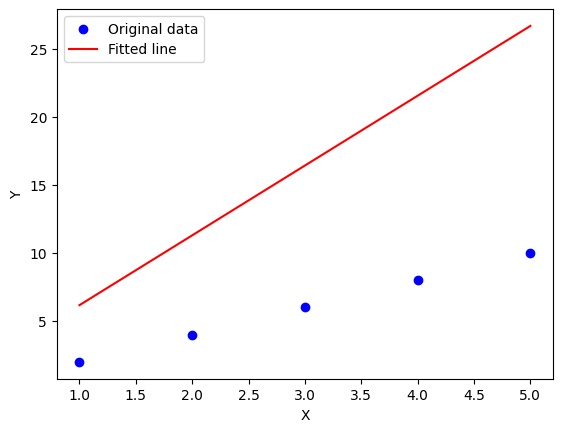

Epoch 1: Loss = 128.27911376953125
  weight: [[-2.3789394]]
  bias: [-1.0432804]


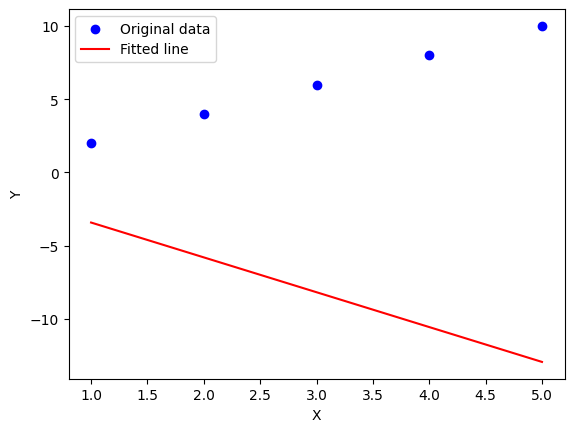

Epoch 2: Loss = 239.42538452148438
  weight: [[7.880696]]
  bias: [1.7927396]


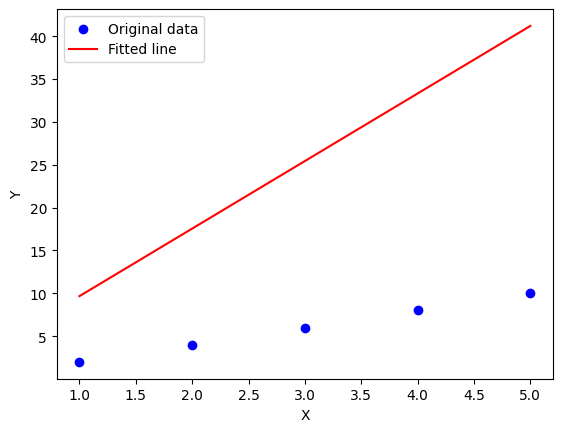

Epoch 3: Loss = 446.877685546875
  weight: [[-6.1324787]]
  bias: [-2.094226]


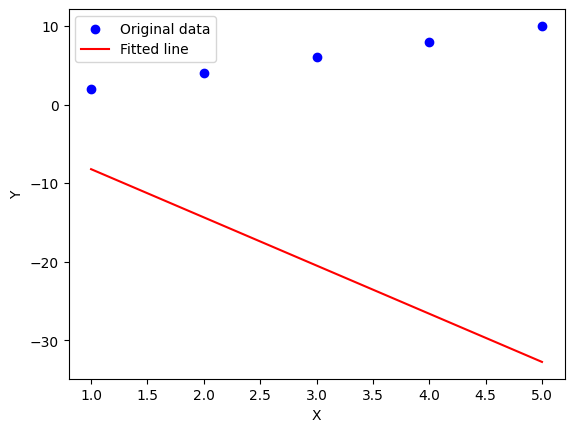

Epoch 4: Loss = 834.08251953125
  weight: [[13.015511]]
  bias: [3.2041063]


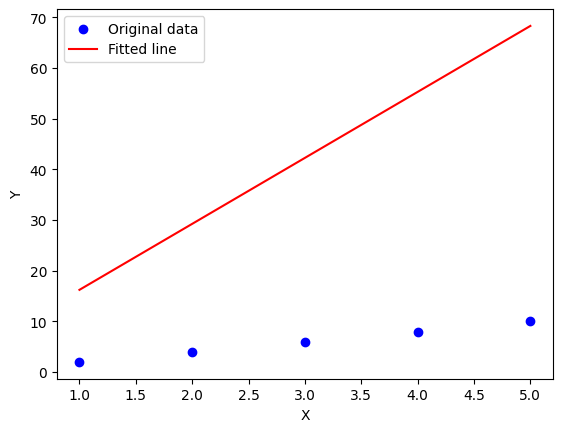

Epoch 5: Loss = 1556.791748046875
  weight: [[-13.141079]]
  bias: [-4.046022]


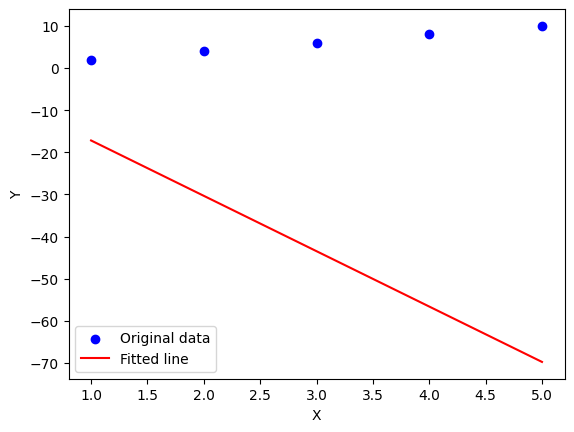

Epoch 6: Loss = 2905.712158203125
  weight: [[22.59691]]
  bias: [5.8478303]


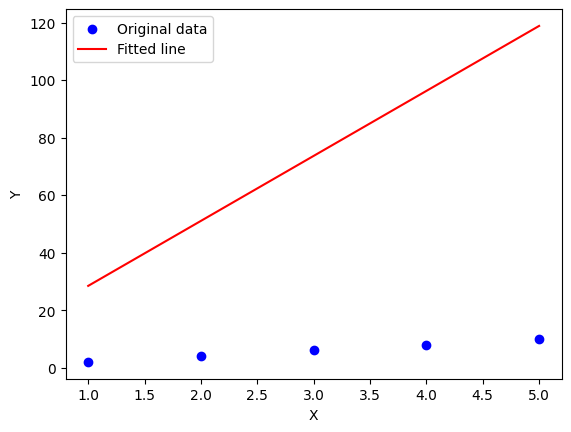

Epoch 7: Loss = 5423.4404296875
  weight: [[-26.224993]]
  bias: [-7.679883]


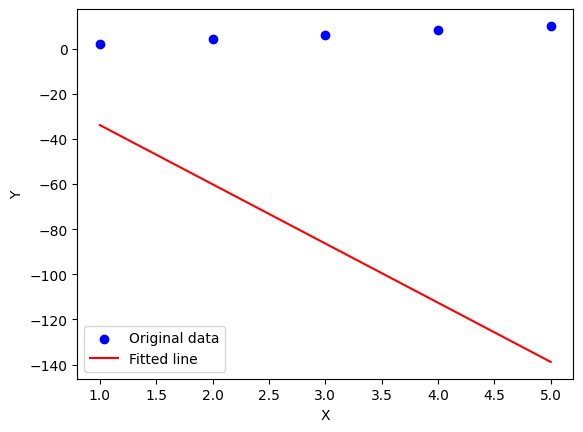

Epoch 8: Loss = 10122.7216796875
  weight: [[40.477924]]
  bias: [10.79109]


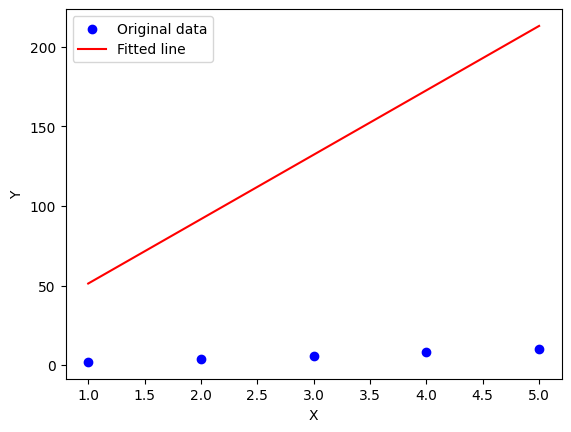

Epoch 9: Loss = 18893.81640625
  weight: [[-50.64817]]
  bias: [-14.453884]


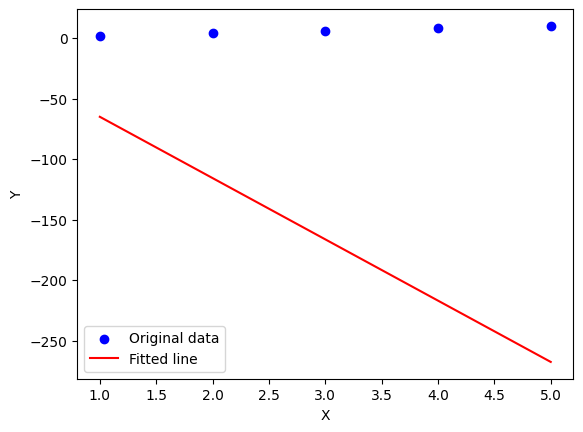

Epoch 10: Loss = 35264.8671875
  weight: [[73.85014]]
  bias: [20.025797]


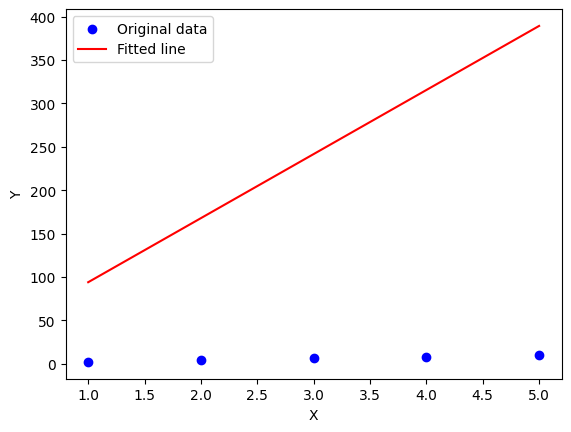

Epoch 11: Loss = 65821.046875
  weight: [[-96.235664]]
  bias: [-27.089453]


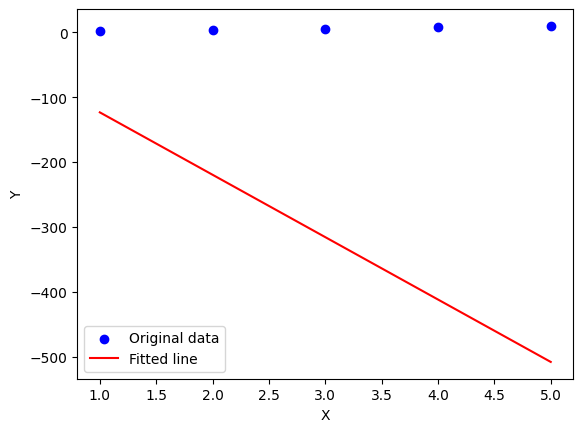

Epoch 12: Loss = 122853.421875
  weight: [[136.13649]]
  bias: [37.269836]


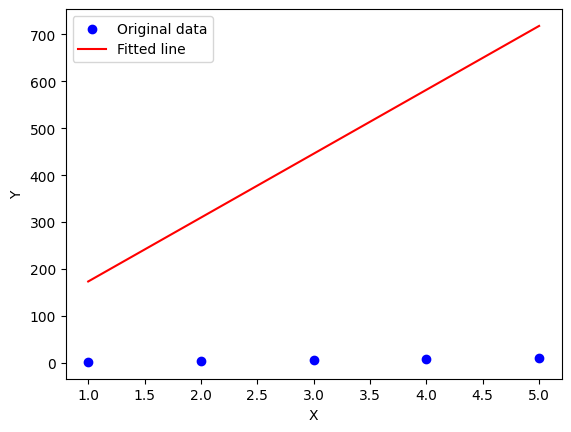

Epoch 13: Loss = 229303.09375
  weight: [[-181.3257]]
  bias: [-50.666023]


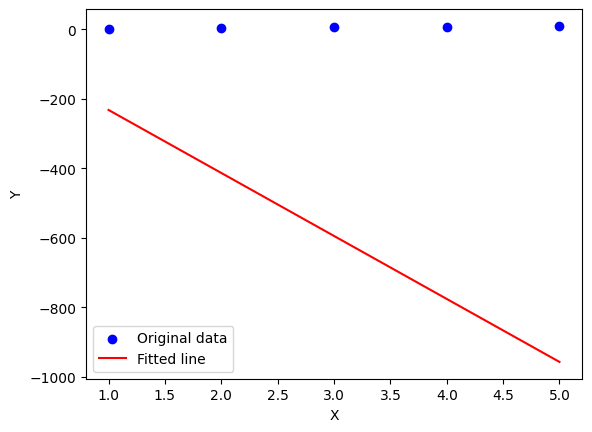

Epoch 14: Loss = 427988.8125
  weight: [[252.39047]]
  bias: [69.462616]


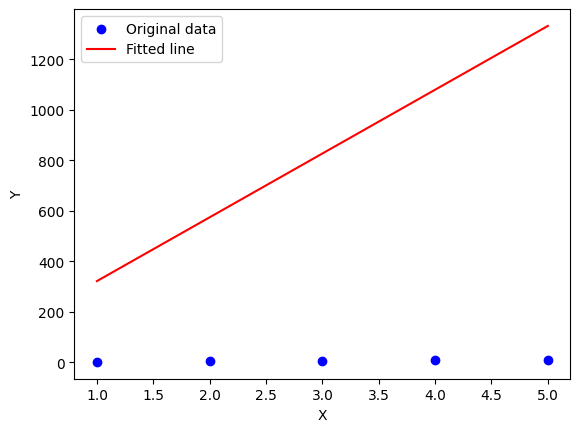

Epoch 15: Loss = 798831.0625
  weight: [[-340.14615]]
  bias: [-94.66419]


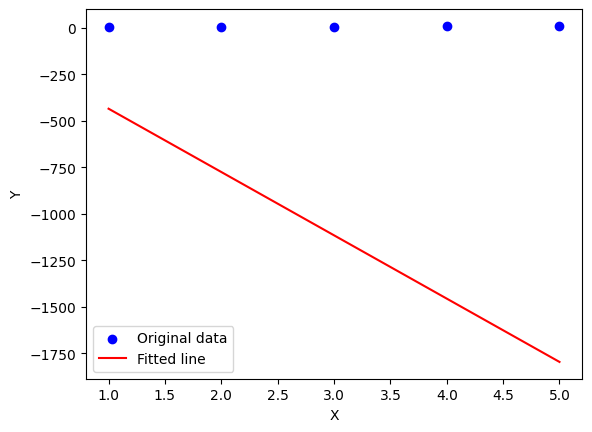

Epoch 16: Loss = 1490999.125
  weight: [[469.37387]]
  bias: [129.55635]


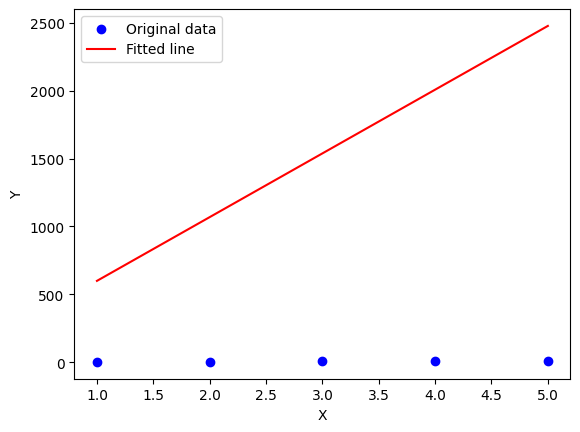

Epoch 17: Loss = 2782914.0
  weight: [[-636.5825]]
  bias: [-176.77927]


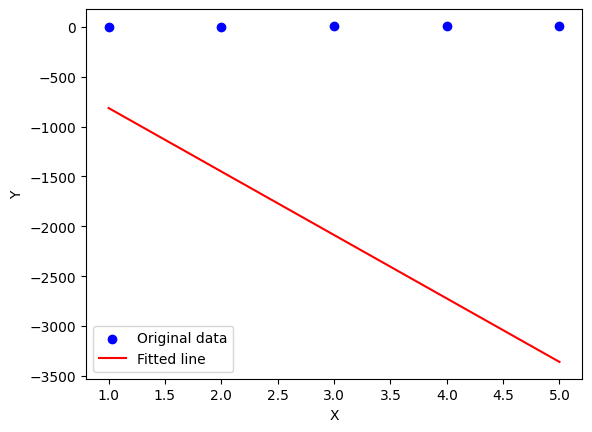

Epoch 18: Loss = 5194243.5
  weight: [[874.36664]]
  bias: [241.7261]


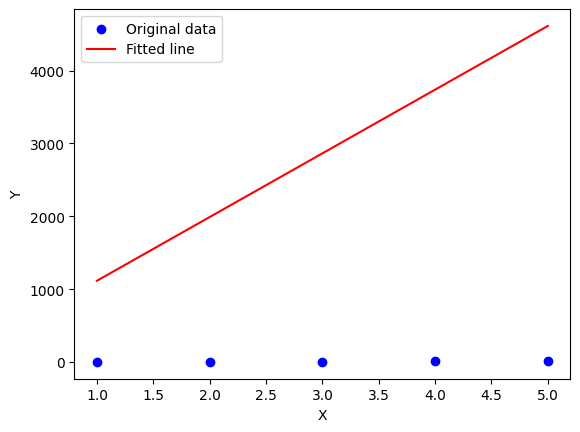

Epoch 19: Loss = 9694933.0
  weight: [[-1189.8756]]
  bias: [-330.0391]


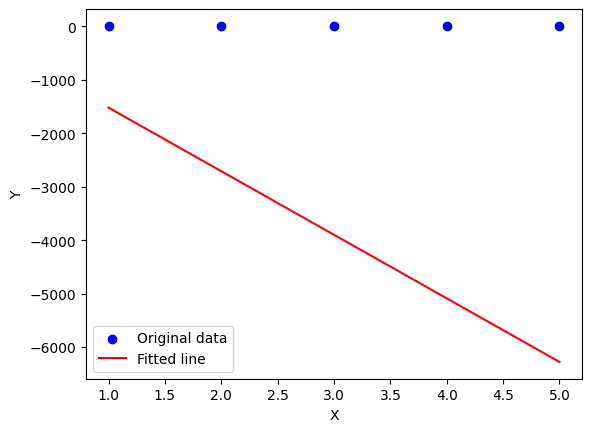

Epoch 20: Loss = 18095362.0
  weight: [[1630.2743]]
  bias: [451.09412]


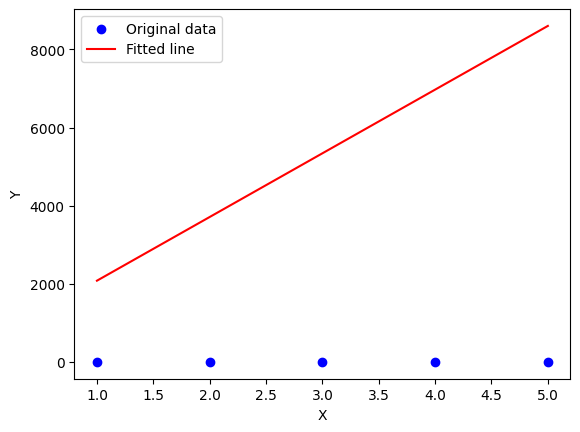

Epoch 21: Loss = 33774568.0
  weight: [[-2222.586]]
  bias: [-616.0894]


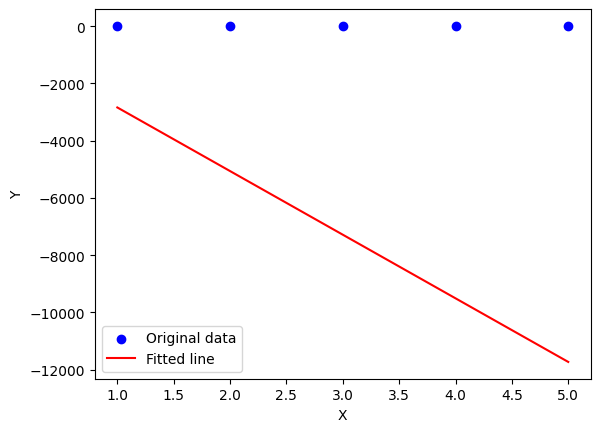

Epoch 22: Loss = 63039436.0
  weight: [[3041.1572]]
  bias: [841.8801]


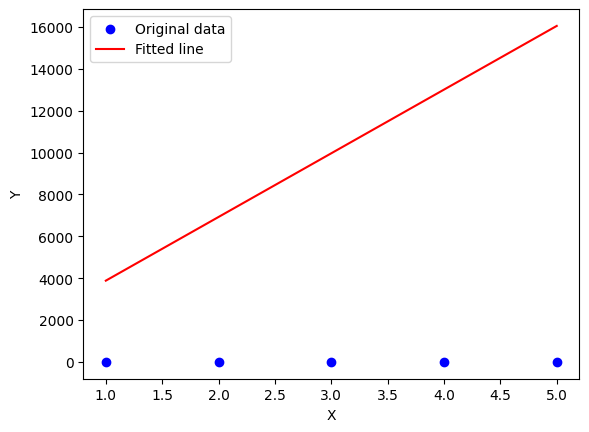

Epoch 23: Loss = 117661632.0
  weight: [[-4150.116]]
  bias: [-1149.9904]


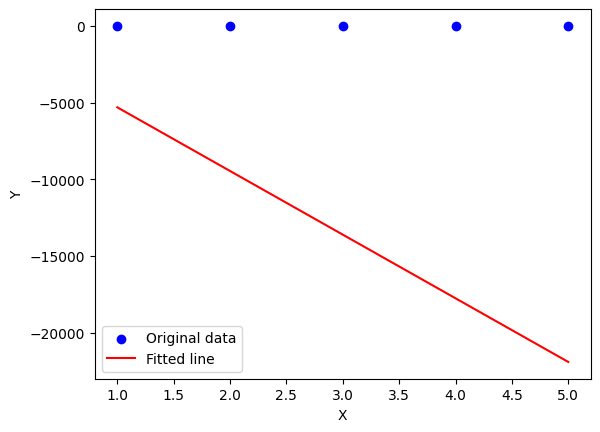

Epoch 24: Loss = 219612592.0
  weight: [[5674.5347]]
  bias: [1571.2777]


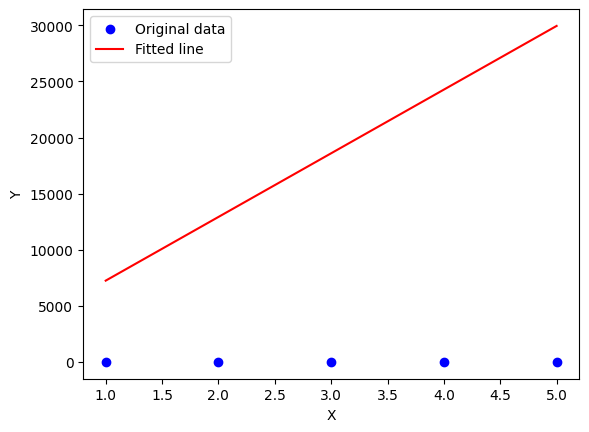

Epoch 25: Loss = 409901824.0
  weight: [[-7747.8076]]
  bias: [-2146.499]


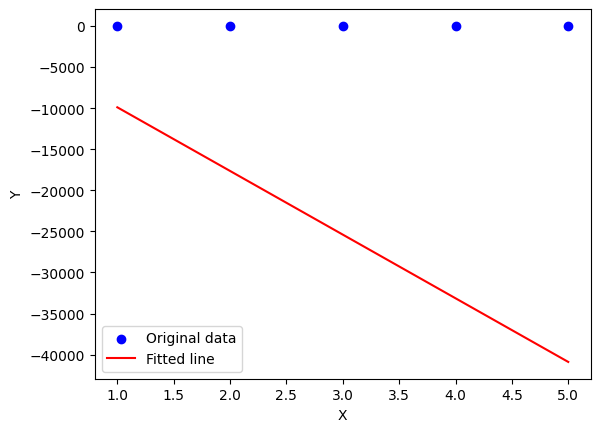

Epoch 26: Loss = 765071872.0
  weight: [[10589.669]]
  bias: [2932.6858]


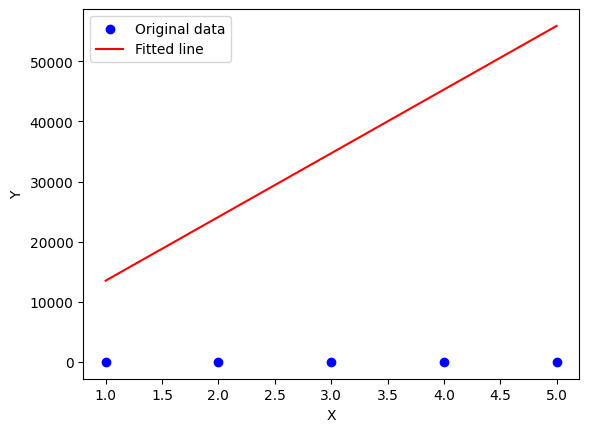

Epoch 27: Loss = 1427988608.0
  weight: [[-14462.815]]
  bias: [-4006.4534]


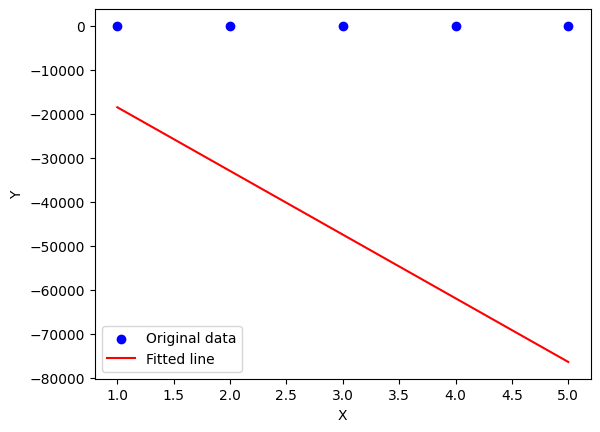

Epoch 28: Loss = 2665307136.0
  weight: [[19763.65]]
  bias: [5473.727]


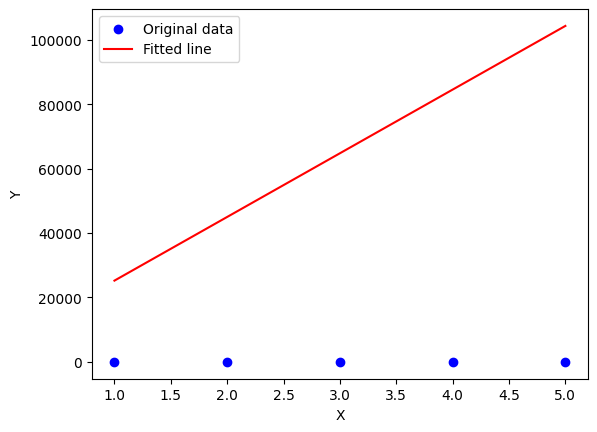

Epoch 29: Loss = 4974732288.0
  weight: [[-26996.219]]
  bias: [-7478.01]


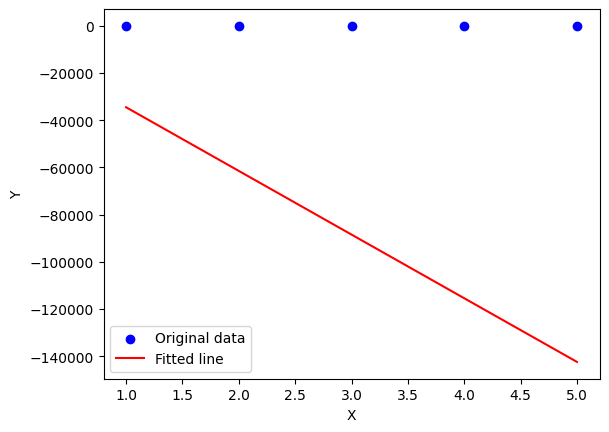

Epoch 30: Loss = 9285220352.0
  weight: [[36886.676]]
  bias: [10216.524]


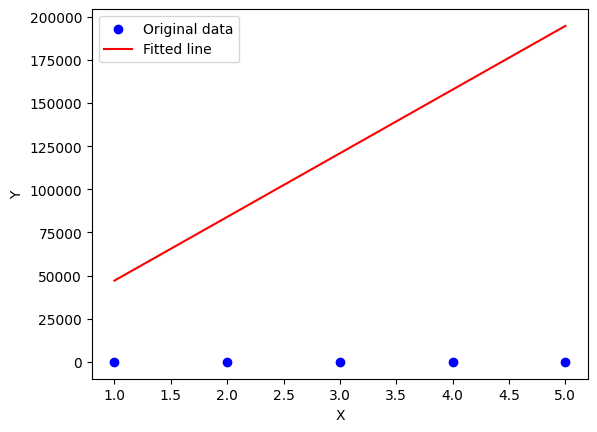

Epoch 31: Loss = 17330651136.0
  weight: [[-50389.53]]
  bias: [-13957.587]


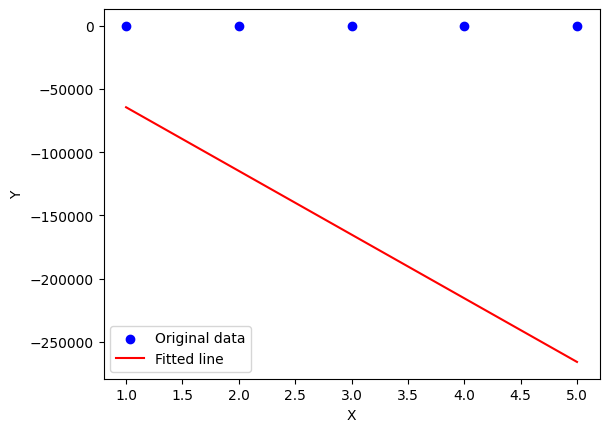

Epoch 32: Loss = 32347252736.0
  weight: [[68846.4]]
  bias: [19068.852]


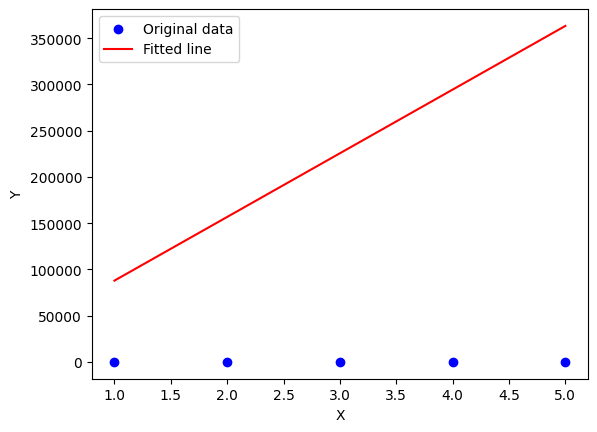

Epoch 33: Loss = 60375379968.0
  weight: [[-94052.59]]
  bias: [-26051.555]


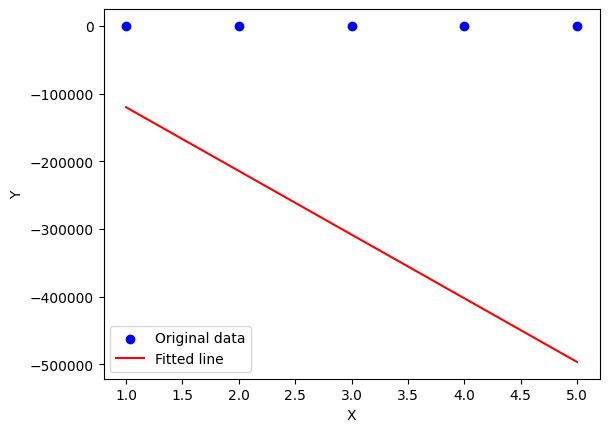

Epoch 34: Loss = 112689233920.0
  weight: [[128498.46]]
  bias: [35591.52]


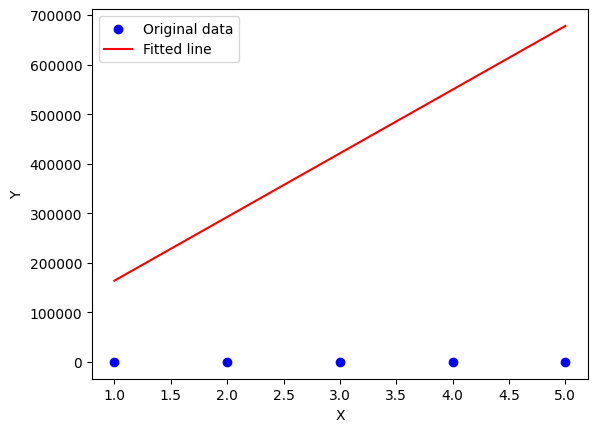

Epoch 35: Loss = 210331795456.0
  weight: [[-175548.67]]
  bias: [-48624.664]


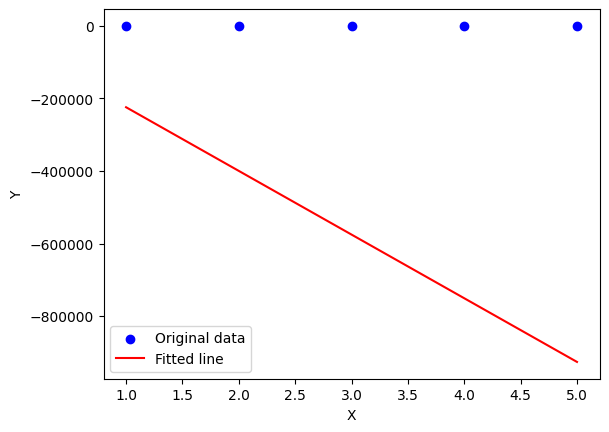

Epoch 36: Loss = 392579350528.0
  weight: [[239837.64]]
  bias: [66430.67]


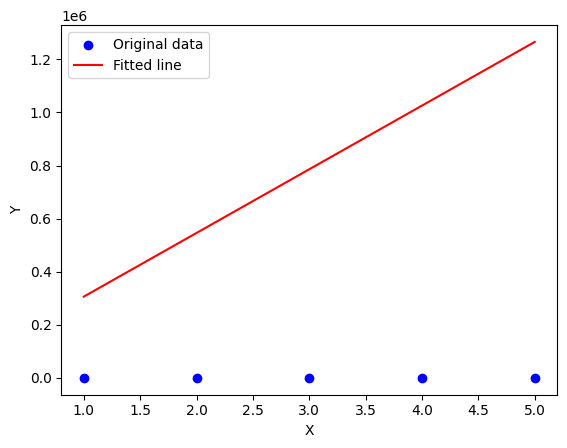

Epoch 37: Loss = 732740190208.0
  weight: [[-327659.22]]
  bias: [-90756.85]


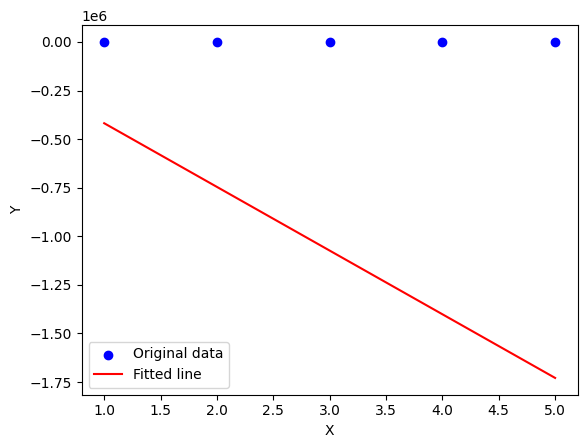

Epoch 38: Loss = 1367642472448.0
  weight: [[447649.6]]
  bias: [123991.25]


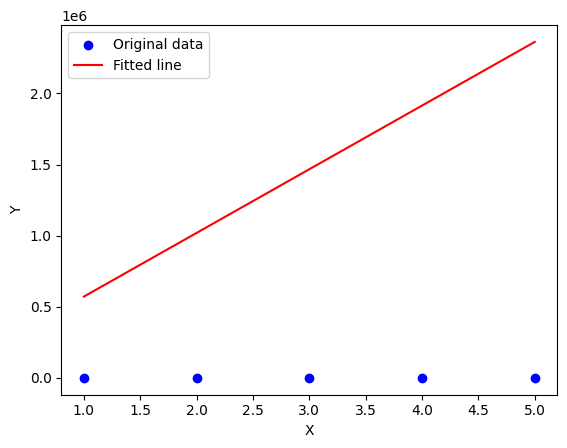

Epoch 39: Loss = 2552672026624.0
  weight: [[-611569.8]]
  bias: [-169395.58]


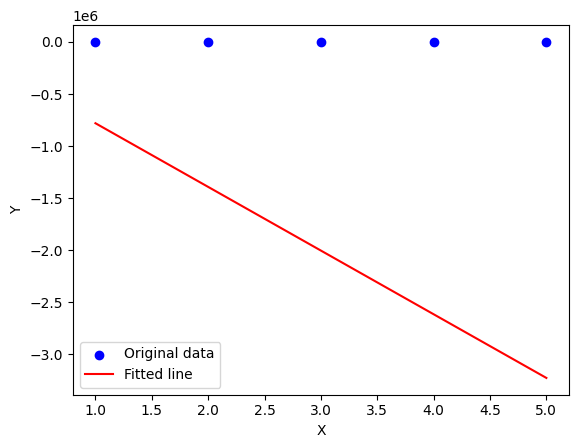

Epoch 40: Loss = 4764501278720.0
  weight: [[835525.5]]
  bias: [231426.62]


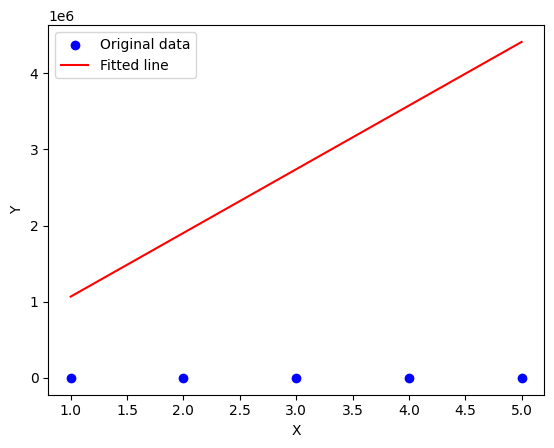

Epoch 41: Loss = 8892827303936.0
  weight: [[-1141482.1]]
  bias: [-316172.78]


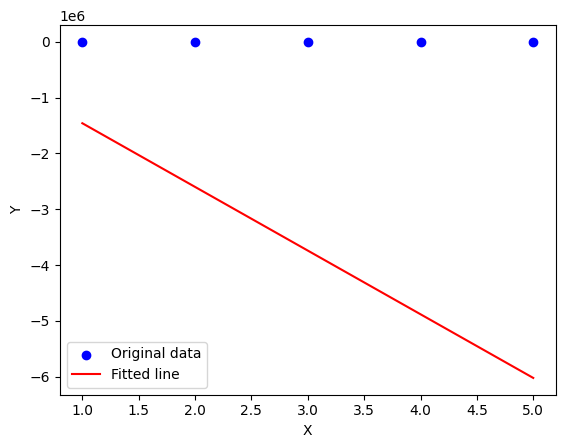

Epoch 42: Loss = 16598250291200.0
  weight: [[1559486.9]]
  bias: [431952.34]


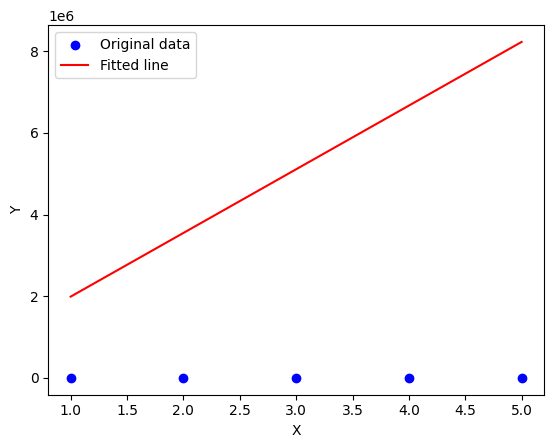

Epoch 43: Loss = 30980247126016.0
  weight: [[-2130551.2]]
  bias: [-590129.06]


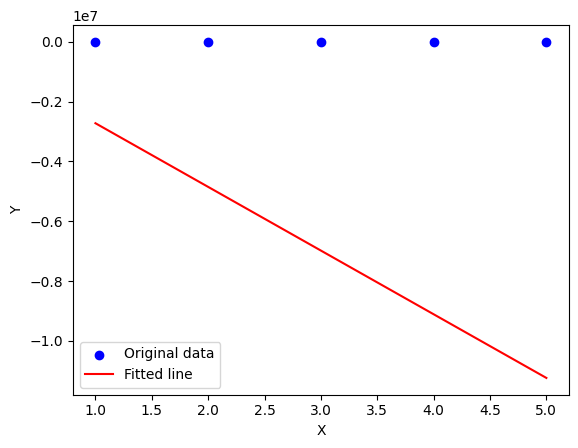

Epoch 44: Loss = 57823891292160.0
  weight: [[2910743.2]]
  bias: [806228.75]


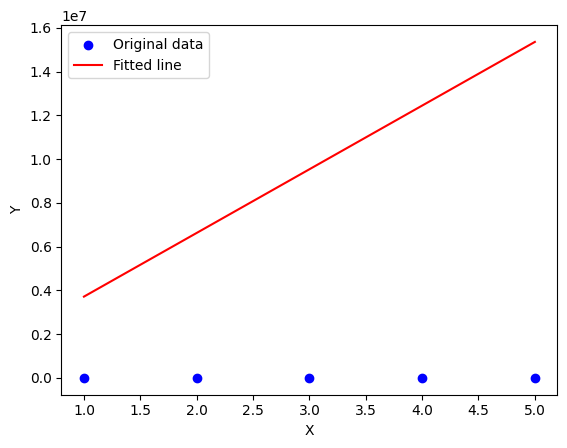

Epoch 45: Loss = 107926907781120.0
  weight: [[-3976624.8]]
  bias: [-1101461.6]


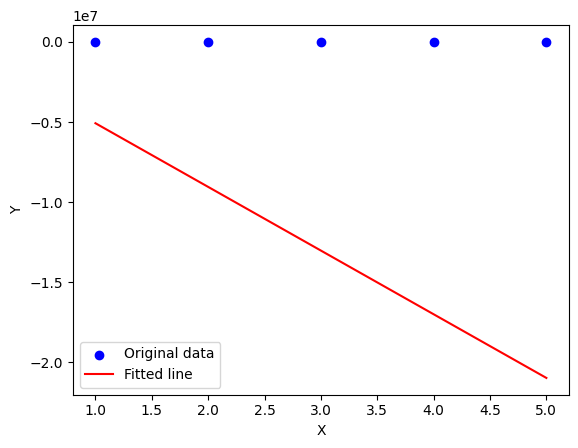

Epoch 46: Loss = 201442992324608.0
  weight: [[5432831.5]]
  bias: [1504806.9]


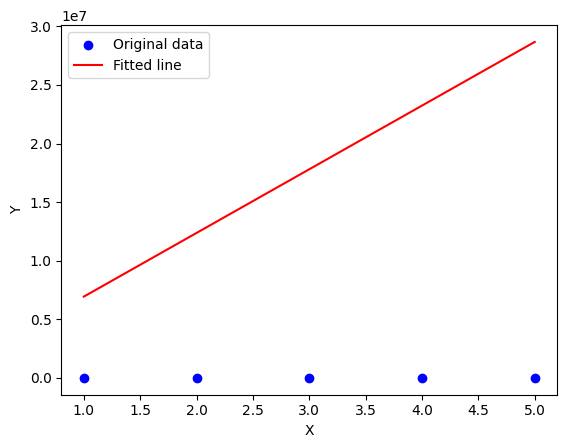

Epoch 47: Loss = 375988584185856.0
  weight: [[-7422278.5]]
  bias: [-2055852.4]


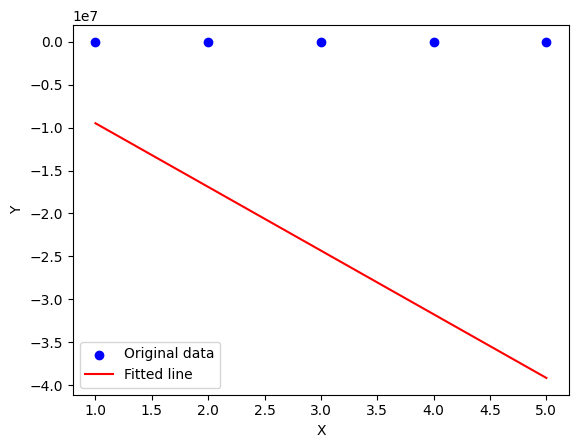

Epoch 48: Loss = 701773899628544.0
  weight: [[10140251.]]
  bias: [2808687.]


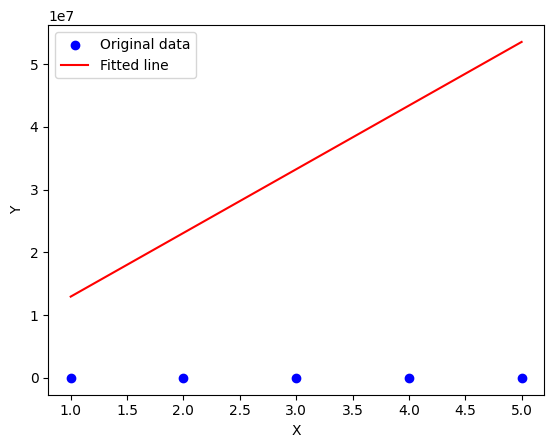

Epoch 49: Loss = 1309844631977984.0
  weight: [[-13853511.]]
  bias: [-3837200.2]


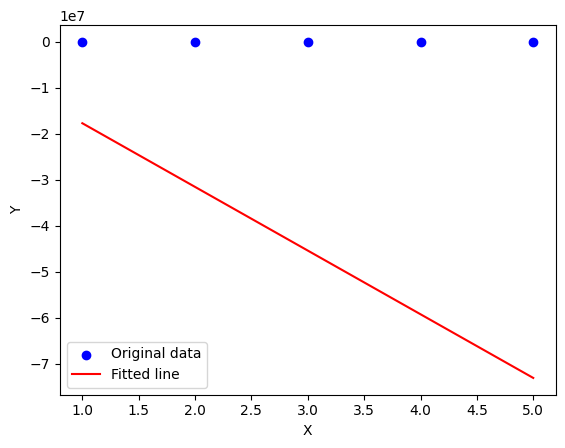

In [5]:
import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4],[5]],dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8],[10]],dtype = torch.float32)

n_samples = X.shape[0]
n_features = X.shape[1]

model = nn.Linear(n_features, n_features)
print("Prediction before training: ", model(X).detach().numpy())

lr = 0.1
n_iters = 50
loss = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_iters):
    # Forward pass
    y_pred = model(X)
    loss = nn.MSELoss()(y_pred, Y)

    # Backward pass
    loss.backward()

    # Update weights
    optimiser.step()
    optimiser.zero_grad()

    # Print the loss and weights
    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")
        for name, param in model.named_parameters():
            print(f"  {name}: {param.data.numpy()}")

    # Plots
    plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Original data')
    plt.plot(X.numpy(), model(X).detach().numpy(), color='red', label='Fitted line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()



Prediction before training:  [[0.6602106]
 [1.0739063]
 [1.487602 ]
 [1.9012977]
 [2.3149934]]
Prediction before training:  [[0.67042387]
 [1.1238701 ]
 [1.5773164 ]
 [2.0307627 ]
 [2.484209  ]]
Epoch 0: Loss = 24.343786239624023
  lin.weight: [[0.78066945]]
  lin.bias: [0.30543128]


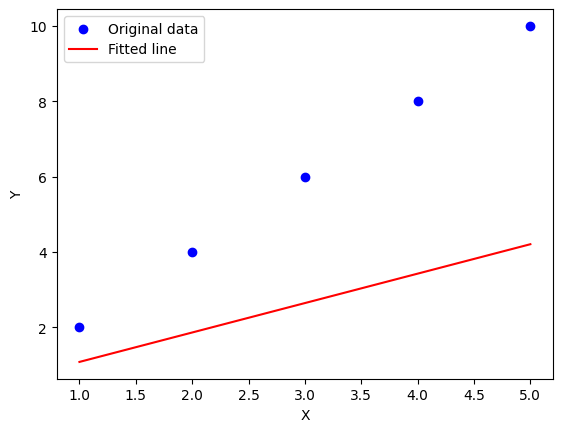

Epoch 1: Loss = 14.213193893432617
  lin.weight: [[1.0305963]]
  lin.bias: [0.37248248]


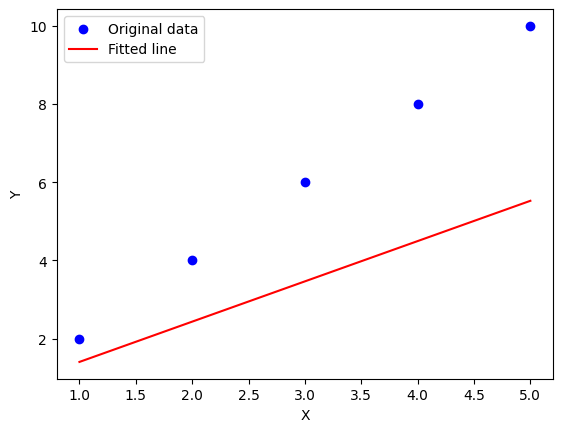

Epoch 2: Loss = 8.309408187866211
  lin.weight: [[1.2215161]]
  lin.bias: [0.42319706]


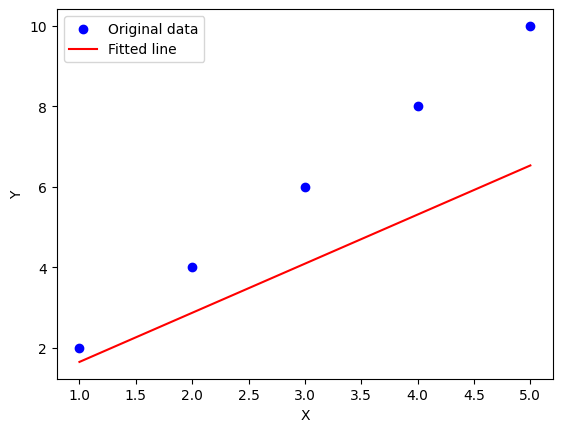

Epoch 3: Loss = 4.868790626525879
  lin.weight: [[1.3673908]]
  lin.bias: [0.46144214]


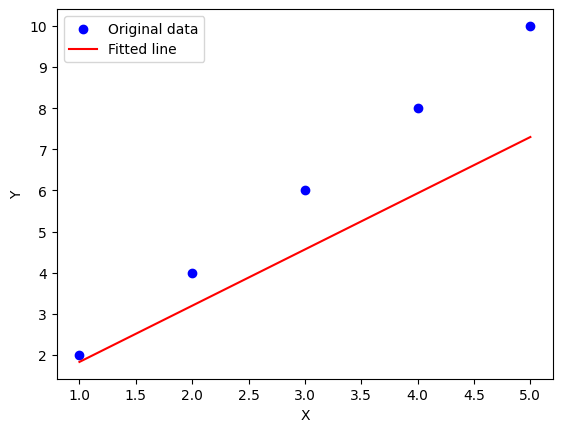

Epoch 4: Loss = 2.8635928630828857
  lin.weight: [[1.4788783]]
  lin.bias: [0.49016985]


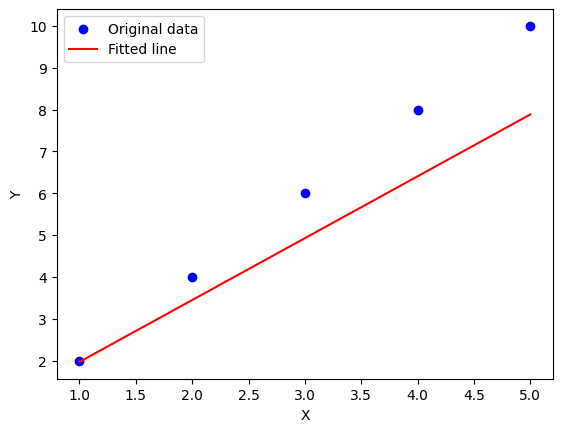

Epoch 5: Loss = 1.6948837041854858
  lin.weight: [[1.5641148]]
  lin.bias: [0.51163375]


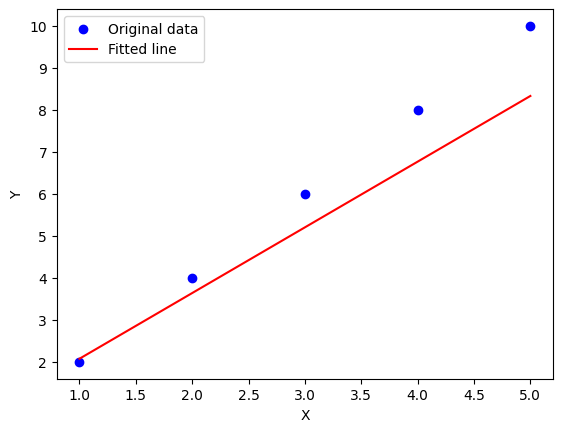

Epoch 6: Loss = 1.0136425495147705
  lin.weight: [[1.6293116]]
  lin.bias: [0.5275542]


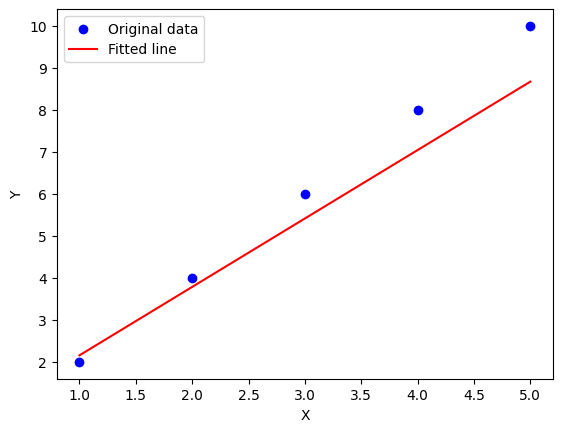

Epoch 7: Loss = 0.6164730191230774
  lin.weight: [[1.6792097]]
  lin.bias: [0.5392444]


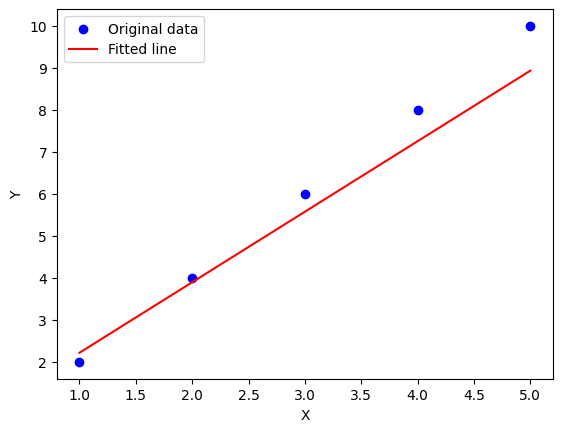

Epoch 8: Loss = 0.38484859466552734
  lin.weight: [[1.7174289]]
  lin.bias: [0.54770696]


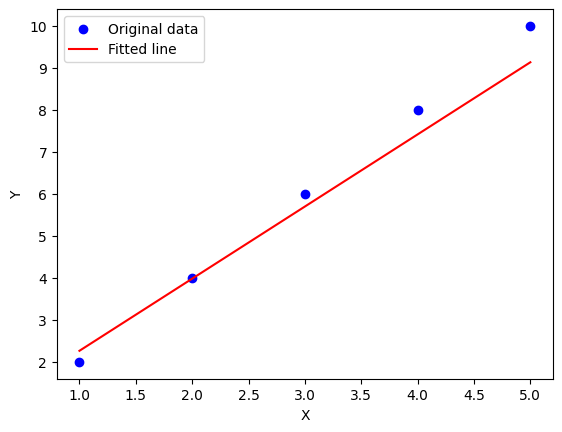

Epoch 9: Loss = 0.24969661235809326
  lin.weight: [[1.7467321]]
  lin.bias: [0.55370706]


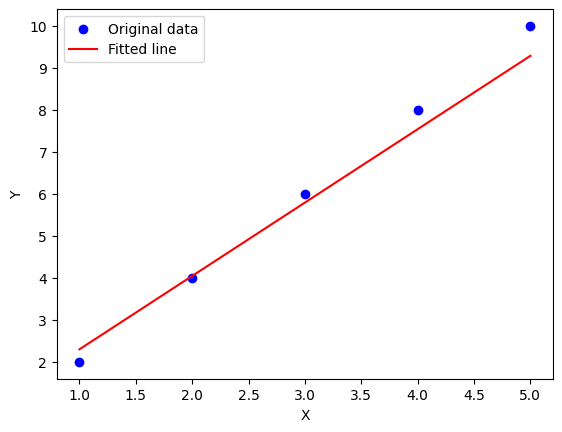

Epoch 10: Loss = 0.1707649677991867
  lin.weight: [[1.7692286]]
  lin.bias: [0.557829]


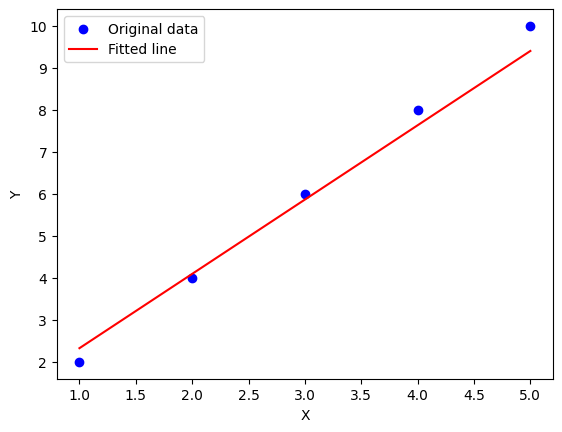

Epoch 11: Loss = 0.12459726631641388
  lin.weight: [[1.7865286]]
  lin.bias: [0.56051874]


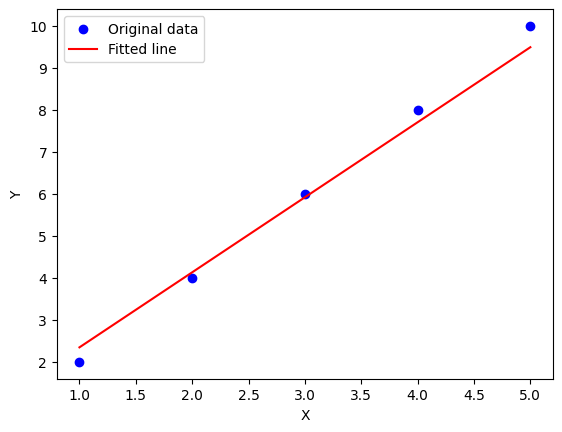

Epoch 12: Loss = 0.0975232869386673
  lin.weight: [[1.7998612]]
  lin.bias: [0.5621166]


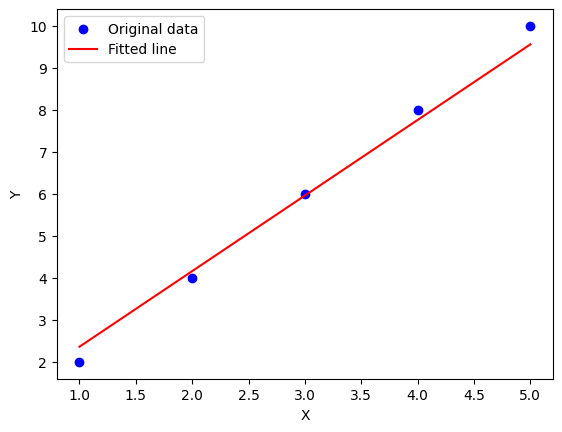

Epoch 13: Loss = 0.08157800137996674
  lin.weight: [[1.8101647]]
  lin.bias: [0.5628826]


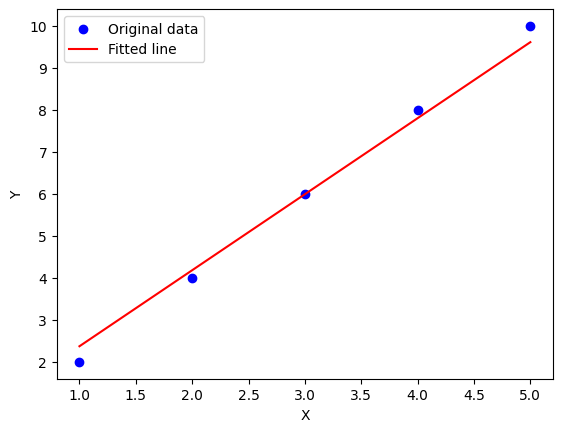

Epoch 14: Loss = 0.0721188336610794
  lin.weight: [[1.8181555]]
  lin.bias: [0.56301504]


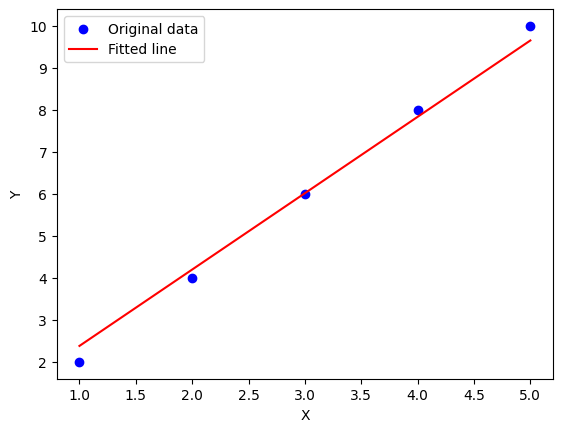

Epoch 15: Loss = 0.06644046306610107
  lin.weight: [[1.8243804]]
  lin.bias: [0.5626654]


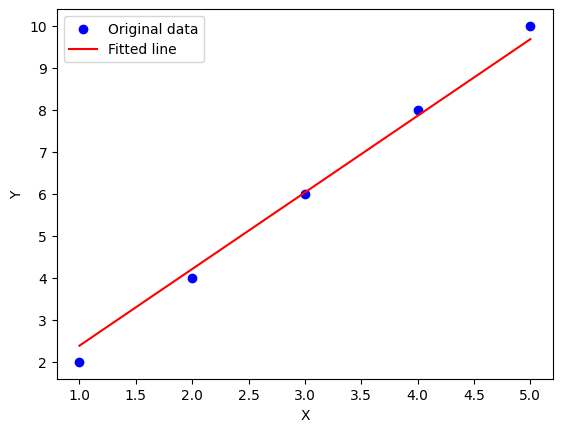

Epoch 16: Loss = 0.06296660751104355
  lin.weight: [[1.8292568]]
  lin.bias: [0.56194925]


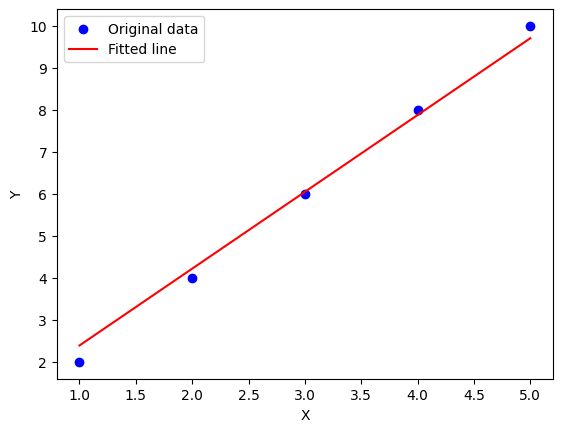

Epoch 17: Loss = 0.06077855825424194
  lin.weight: [[1.8331033]]
  lin.bias: [0.56095487]


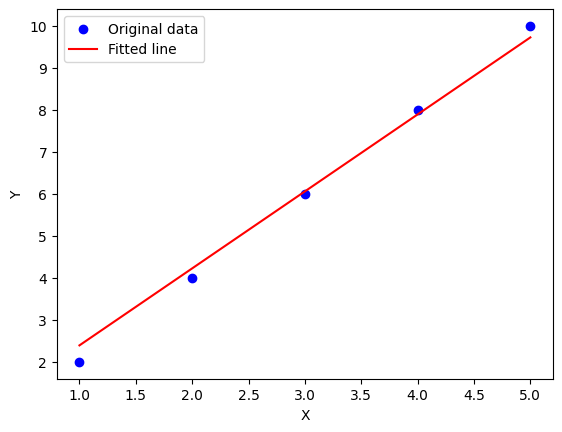

Epoch 18: Loss = 0.05934080481529236
  lin.weight: [[1.8361633]]
  lin.bias: [0.55974954]


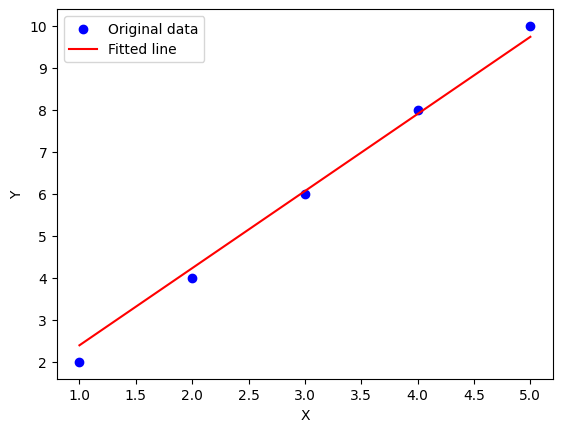

Epoch 19: Loss = 0.05834152549505234
  lin.weight: [[1.8386223]]
  lin.bias: [0.5583848]


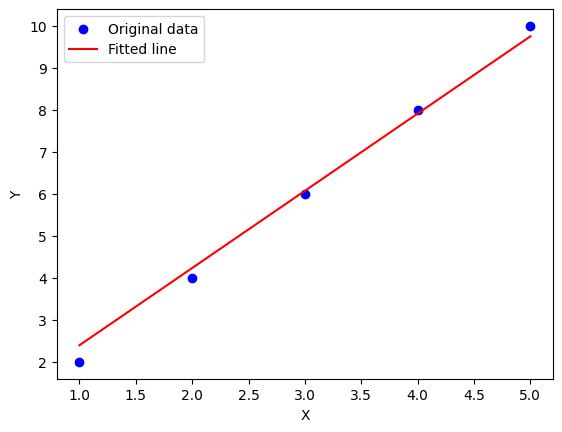

Epoch 20: Loss = 0.05759883671998978
  lin.weight: [[1.8406223]]
  lin.bias: [0.5568997]


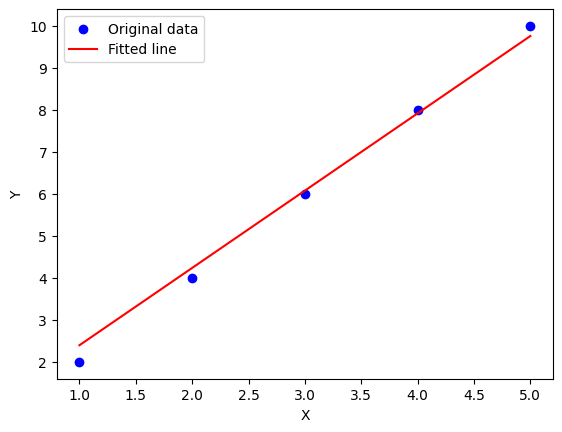

Epoch 21: Loss = 0.057006627321243286
  lin.weight: [[1.8422714]]
  lin.bias: [0.5553244]


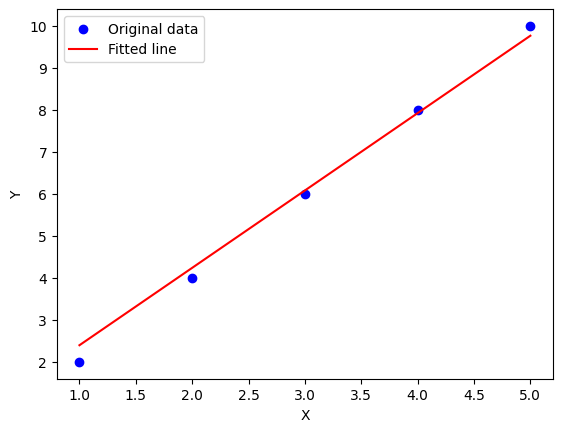

Epoch 22: Loss = 0.05650336667895317
  lin.weight: [[1.8436522]]
  lin.bias: [0.5536816]


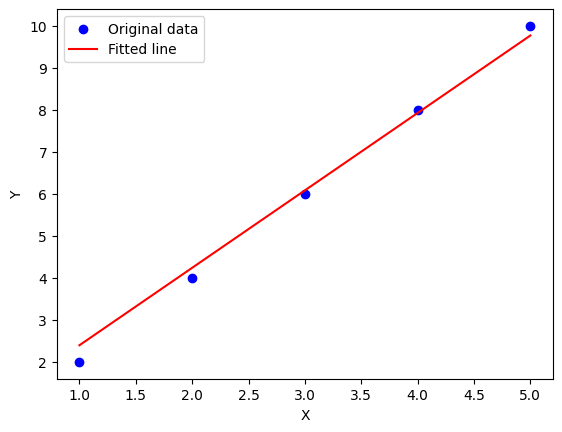

Epoch 23: Loss = 0.05605286359786987
  lin.weight: [[1.8448279]]
  lin.bias: [0.55198884]


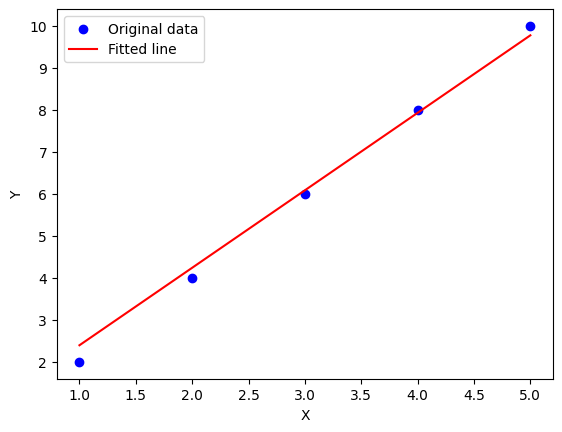

Epoch 24: Loss = 0.05563433840870857
  lin.weight: [[1.8458464]]
  lin.bias: [0.5502594]


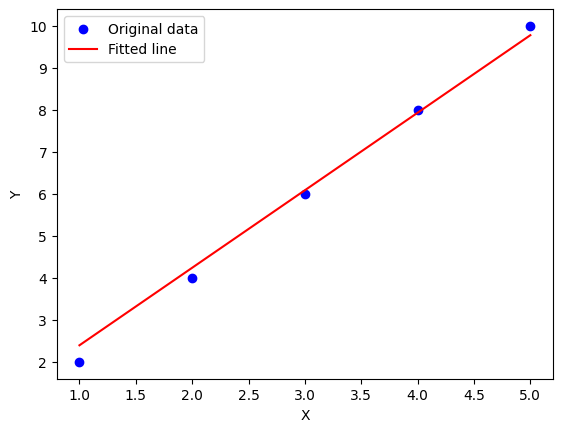

Epoch 25: Loss = 0.05523528531193733
  lin.weight: [[1.8467447]]
  lin.bias: [0.54850346]


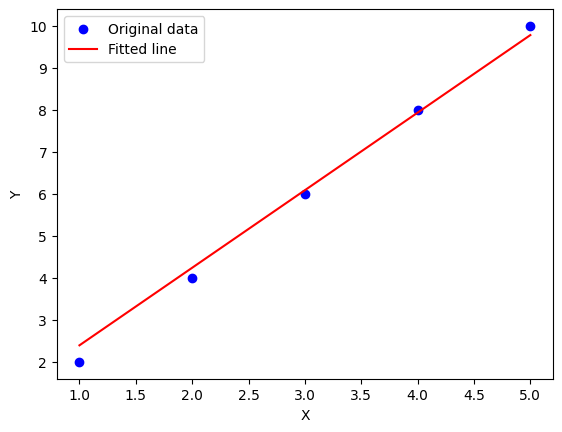

Epoch 26: Loss = 0.05484869331121445
  lin.weight: [[1.8475506]]
  lin.bias: [0.54672873]


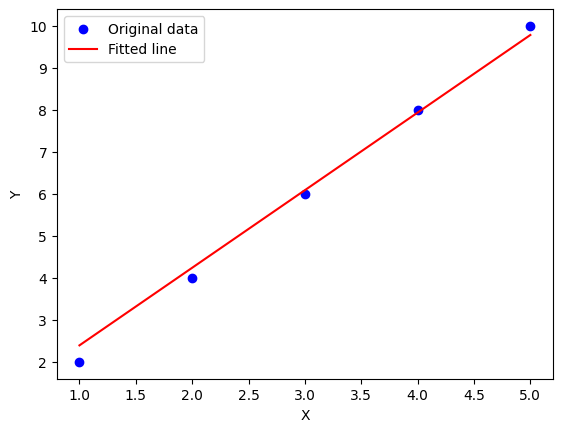

Epoch 27: Loss = 0.054470520466566086
  lin.weight: [[1.8482858]]
  lin.bias: [0.5449411]


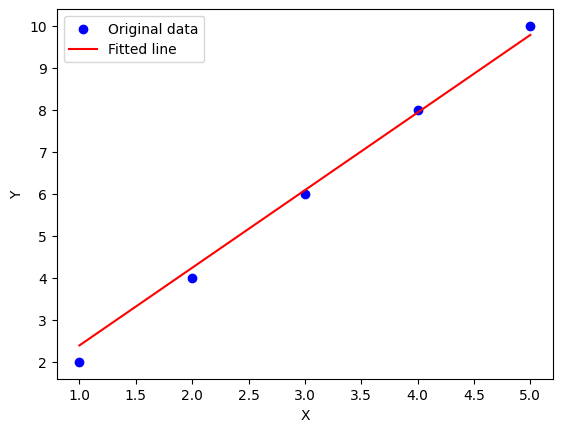

Epoch 28: Loss = 0.05409815162420273
  lin.weight: [[1.8489665]]
  lin.bias: [0.5431452]


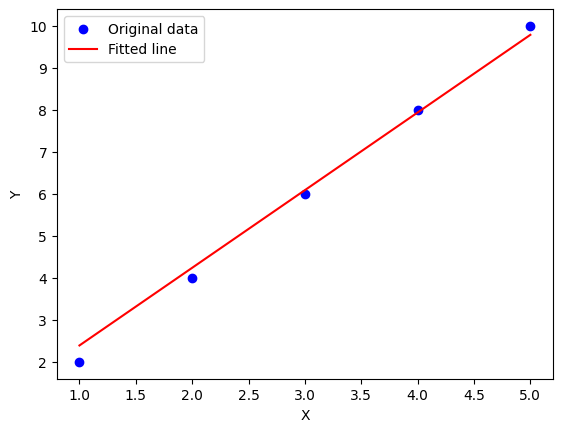

Epoch 29: Loss = 0.053730349987745285
  lin.weight: [[1.8496052]]
  lin.bias: [0.5413443]


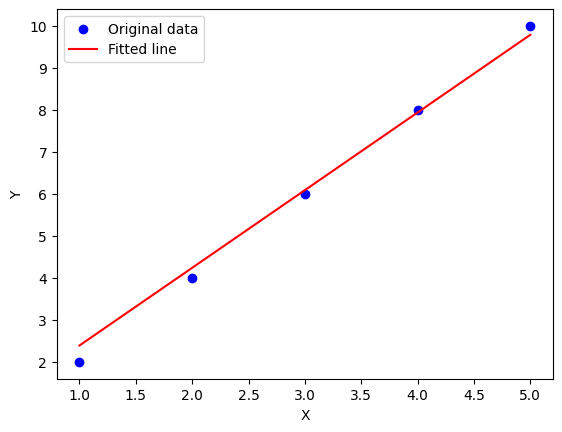

Epoch 30: Loss = 0.05336598679423332
  lin.weight: [[1.8502114]]
  lin.bias: [0.53954107]


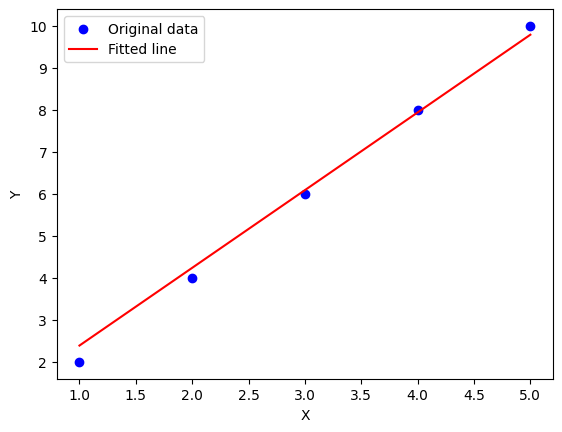

Epoch 31: Loss = 0.053004853427410126
  lin.weight: [[1.8507924]]
  lin.bias: [0.53773755]


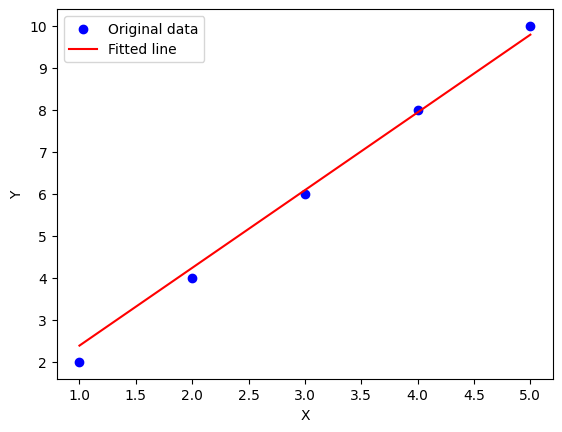

Epoch 32: Loss = 0.05264648050069809
  lin.weight: [[1.8513539]]
  lin.bias: [0.5359353]


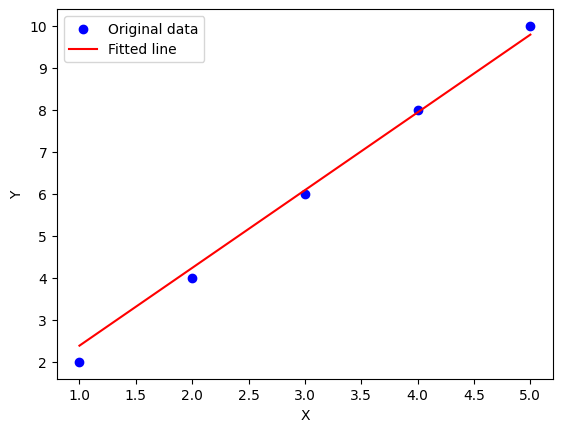

Epoch 33: Loss = 0.05229080468416214
  lin.weight: [[1.8518999]]
  lin.bias: [0.53413534]


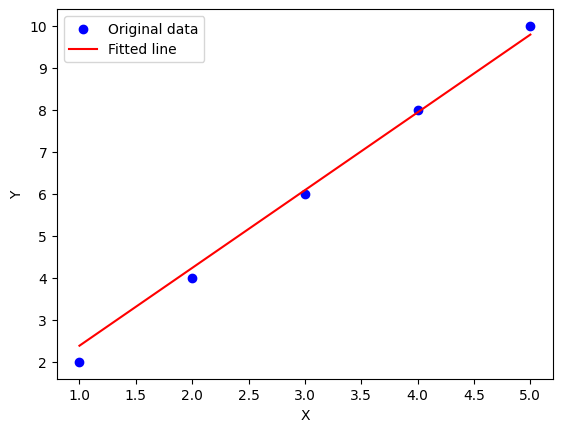

Epoch 34: Loss = 0.05193762853741646
  lin.weight: [[1.8524338]]
  lin.bias: [0.5323386]


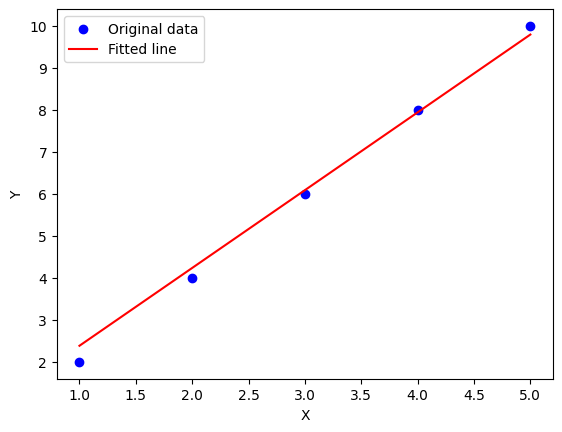

Epoch 35: Loss = 0.051586877554655075
  lin.weight: [[1.8529581]]
  lin.bias: [0.53054583]


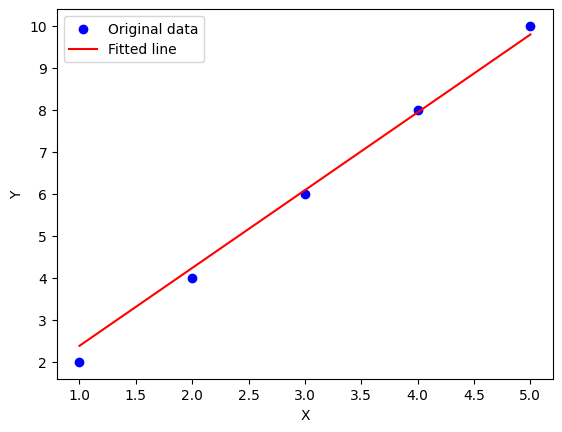

Epoch 36: Loss = 0.051238566637039185
  lin.weight: [[1.8534745]]
  lin.bias: [0.52875745]


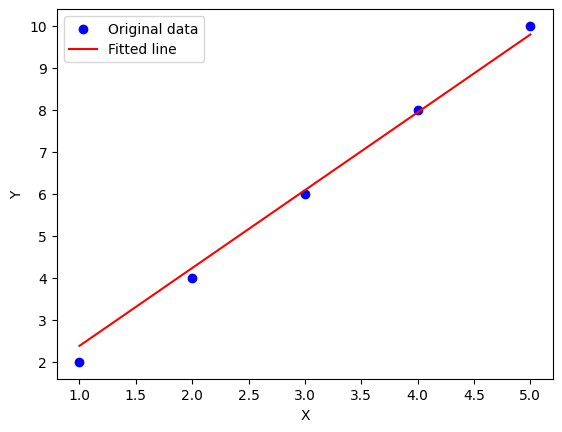

Epoch 37: Loss = 0.05089273303747177
  lin.weight: [[1.8539847]]
  lin.bias: [0.52697384]


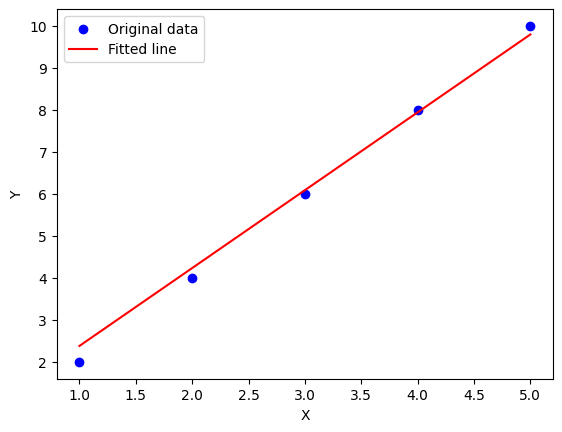

Epoch 38: Loss = 0.050549160689115524
  lin.weight: [[1.8544897]]
  lin.bias: [0.5251953]


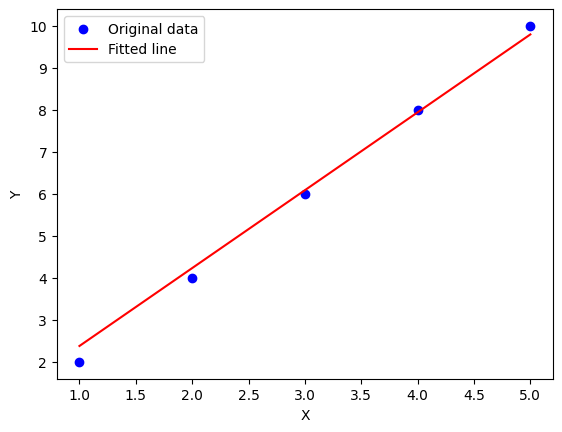

Epoch 39: Loss = 0.050207871943712234
  lin.weight: [[1.8549902]]
  lin.bias: [0.523422]


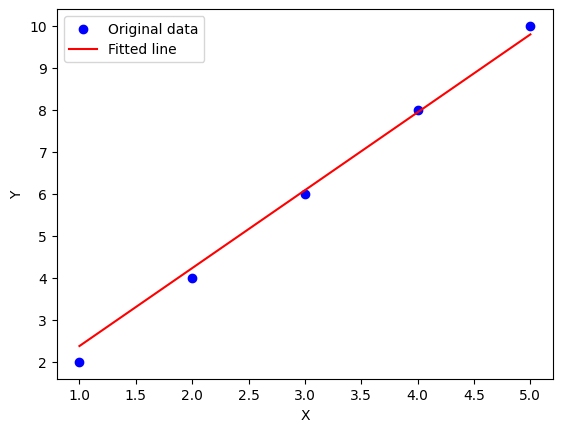

Epoch 40: Loss = 0.04986892640590668
  lin.weight: [[1.8554871]]
  lin.bias: [0.5216541]


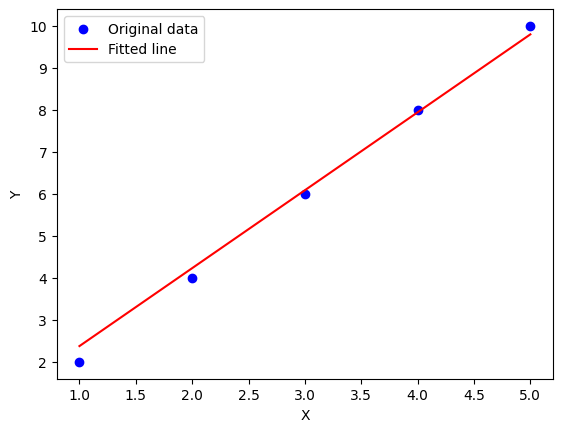

Epoch 41: Loss = 0.04953231289982796
  lin.weight: [[1.8559808]]
  lin.bias: [0.5198918]


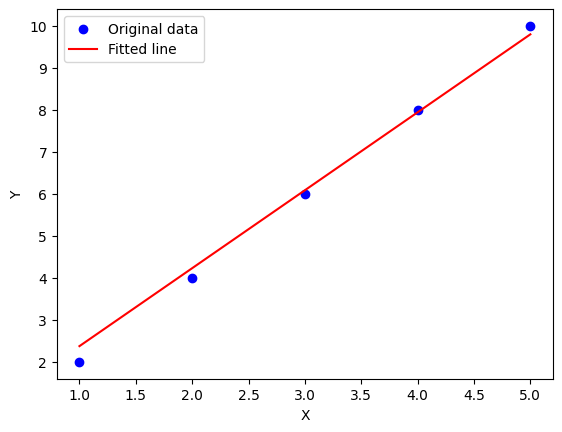

Epoch 42: Loss = 0.0491979643702507
  lin.weight: [[1.8564715]]
  lin.bias: [0.51813513]


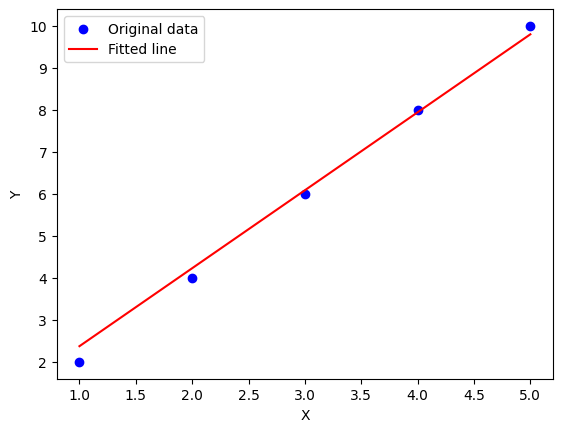

Epoch 43: Loss = 0.04886574670672417
  lin.weight: [[1.8569597]]
  lin.bias: [0.5163841]


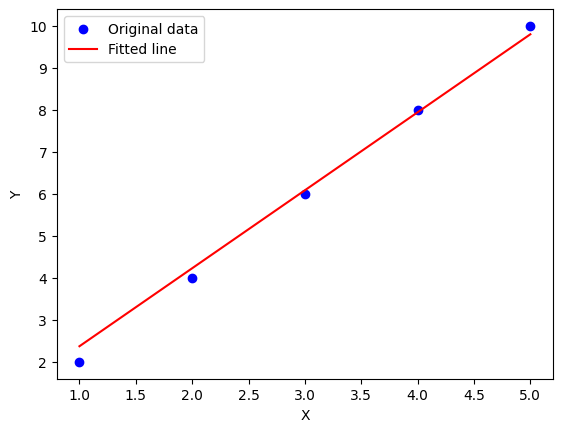

Epoch 44: Loss = 0.04853595048189163
  lin.weight: [[1.8574455]]
  lin.bias: [0.51463884]


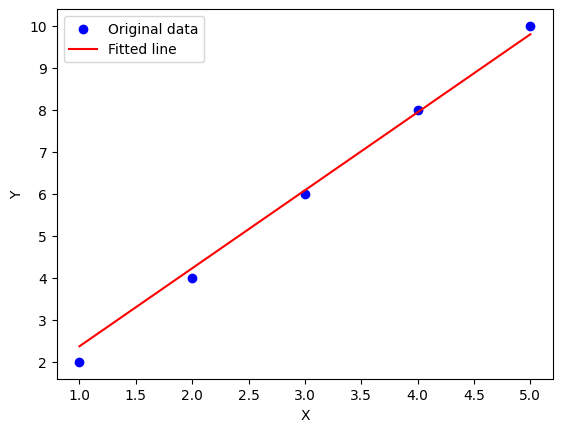

Epoch 45: Loss = 0.04820825904607773
  lin.weight: [[1.8579291]]
  lin.bias: [0.51289934]


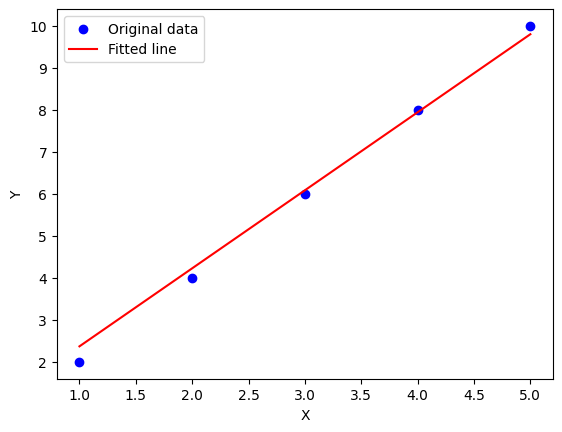

Epoch 46: Loss = 0.04788284748792648
  lin.weight: [[1.8584107]]
  lin.bias: [0.5111656]


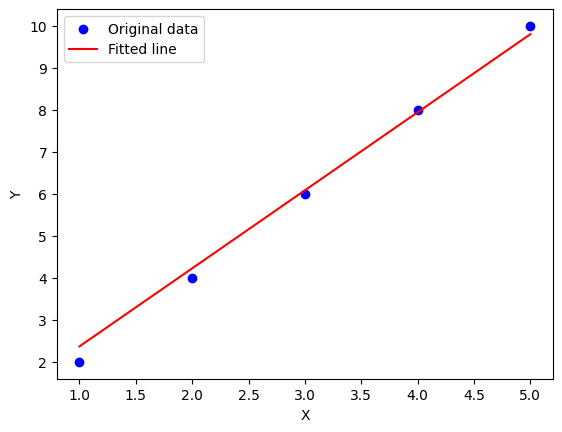

Epoch 47: Loss = 0.04755968973040581
  lin.weight: [[1.8588904]]
  lin.bias: [0.5094377]


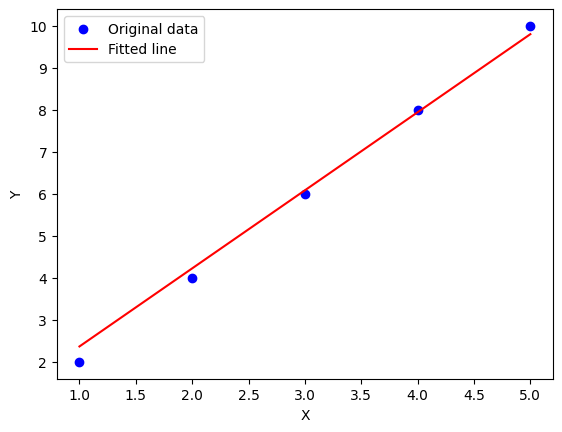

Epoch 48: Loss = 0.04723861813545227
  lin.weight: [[1.8593683]]
  lin.bias: [0.5077155]


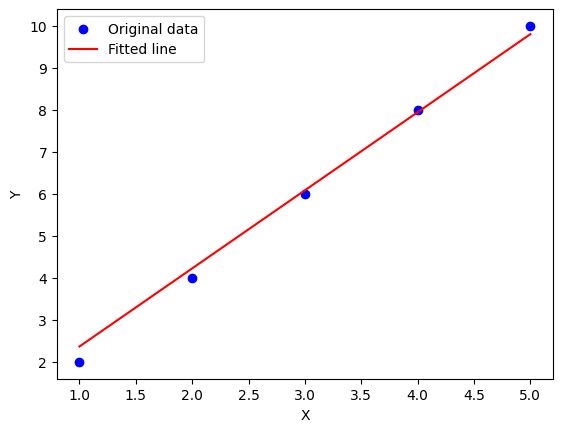

Epoch 49: Loss = 0.046919725835323334
  lin.weight: [[1.8598443]]
  lin.bias: [0.5059991]


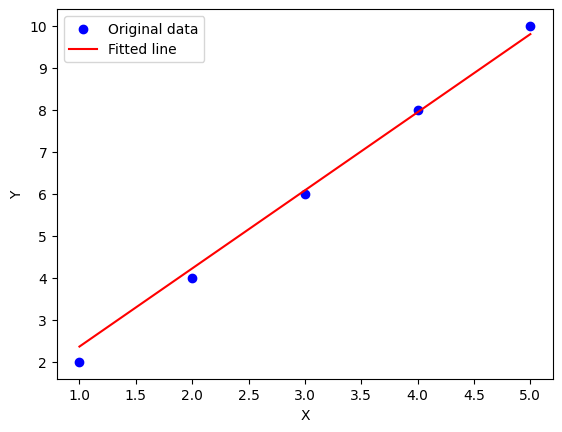

In [6]:
import torch
import torch.nn as nn

# USING CLASS
X = torch.tensor([[1],[2],[3],[4],[5]],dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8],[10]],dtype = torch.float32)

n_samples = X.shape[0]
n_features = X.shape[1]

model = nn.Linear(n_features, n_features)
print("Prediction before training: ", model(X).detach().numpy())

lr = 0.01
n_iters = 50

class LR(nn.Module) :
    def __init__(self,input_dim , output_dim) :
        super(LR,self).__init__()
        self.lin = nn.Linear(input_dim , output_dim)
    def forward(self,x) :
        return self.lin(x)

model = LR(1,1)


print("Prediction before training: ", model(X).detach().numpy())

lr = 0.01
n_iters = 50
loss = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_iters):
    # Forward pass
    y_pred = model(X)
    loss = nn.MSELoss()(y_pred, Y)

    # Backward pass
    loss.backward()

    # Update weights
    optimiser.step()
    optimiser.zero_grad()

    # Print the loss and weights
    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")
        for name, param in model.named_parameters():
            print(f"  {name}: {param.data.numpy()}")

    # Plots
    plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Original data')
    plt.plot(X.numpy(), model(X).detach().numpy(), color='red', label='Fitted line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()



Epoch 100: Loss = 566.9178
Epoch 200: Loss = 342.7278
Epoch 300: Loss = 333.0163
Epoch 400: Loss = 332.5875
Epoch 500: Loss = 332.5685
Epoch 600: Loss = 332.5676
Epoch 700: Loss = 332.5675
Epoch 800: Loss = 332.5675
Epoch 900: Loss = 332.5676
Epoch 1000: Loss = 332.5676
Epoch 1100: Loss = 332.5676
Epoch 1200: Loss = 332.5676
Epoch 1300: Loss = 332.5676
Epoch 1400: Loss = 332.5676
Epoch 1500: Loss = 332.5676
Epoch 1600: Loss = 332.5676
Epoch 1700: Loss = 332.5676
Epoch 1800: Loss = 332.5676
Epoch 1900: Loss = 332.5676
Epoch 2000: Loss = 332.5676


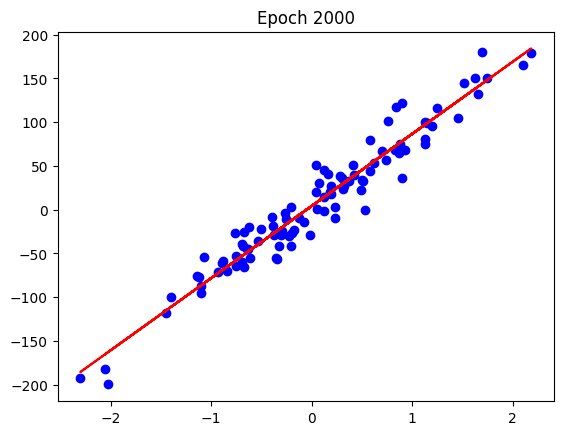

In [7]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Dataset
X, Y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)
Y = Y.view(Y.shape[0], 1)
input_size = X.shape[1]
output_size = 1
model = nn.Linear(input_size, output_size)

# Loss & Optimizer
lr = 0.01
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=lr)

# Training
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    Y_pred = model(X)
    # Loss
    l = criterion(Y_pred, Y)
    # Backward pass
    l.backward()
    # Update
    optimiser.step()
    optimiser.zero_grad()

    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}: Loss = {l.item():.4f}")

# Plot
plt.scatter(X.numpy(), Y.numpy(), color='blue')
plt.plot(X.numpy(), Y_pred.detach().numpy(), color='red')
plt.title(f"Epoch {epoch+1}")
plt.show()


In [8]:
# LOGISTIC REGRESSION

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# DATA
bc = datasets.load_breast_cancer()
X, Y = bc.data , bc.target
n_samples , n_features = X.shape
X_train  , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
Y_train = torch.from_numpy(Y_train).float()
Y_test = torch.from_numpy(Y_test).float()
Y_train = Y_train.view(Y_train.shape[0],1)
Y_test = Y_test.view(Y_test.shape[0],1)

sc = StandardScaler()
X_train = torch.from_numpy(sc.fit_transform(X_train)).float()
X_test = torch.from_numpy(sc.transform(X_test)).float()

# MODEL
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegression(input_dim=n_features)
lr = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

num_epochs = 10000

for epoch in range(num_epochs):
    y_predicted = model(X_train)
    loss = criterion(y_predicted,Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    accuracy = (y_predicted_cls == Y_test).sum() / float(Y_test.shape[0])
    print(f"Test Accuracy: {accuracy.item():.4f}")

Epoch [100/10000], Loss: 0.2741
Epoch [200/10000], Loss: 0.2012
Epoch [300/10000], Loss: 0.1698
Epoch [400/10000], Loss: 0.1515
Epoch [500/10000], Loss: 0.1392
Epoch [600/10000], Loss: 0.1303
Epoch [700/10000], Loss: 0.1234
Epoch [800/10000], Loss: 0.1178
Epoch [900/10000], Loss: 0.1133
Epoch [1000/10000], Loss: 0.1094
Epoch [1100/10000], Loss: 0.1061
Epoch [1200/10000], Loss: 0.1033
Epoch [1300/10000], Loss: 0.1008
Epoch [1400/10000], Loss: 0.0985
Epoch [1500/10000], Loss: 0.0965
Epoch [1600/10000], Loss: 0.0947
Epoch [1700/10000], Loss: 0.0931
Epoch [1800/10000], Loss: 0.0916
Epoch [1900/10000], Loss: 0.0902
Epoch [2000/10000], Loss: 0.0889
Epoch [2100/10000], Loss: 0.0878
Epoch [2200/10000], Loss: 0.0867
Epoch [2300/10000], Loss: 0.0856
Epoch [2400/10000], Loss: 0.0847
Epoch [2500/10000], Loss: 0.0838
Epoch [2600/10000], Loss: 0.0829
Epoch [2700/10000], Loss: 0.0821
Epoch [2800/10000], Loss: 0.0814
Epoch [2900/10000], Loss: 0.0807
Epoch [3000/10000], Loss: 0.0800
Epoch [3100/10000],